# Prediction de la quantité de précipitation (rain_class) pour le jour suivant.

In [1]:
# Lecture des données

raindata <- read.table("rain_project.txt", sep='')
head(raindata)


,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


In [2]:
# Changement du type des variables qualitatives en facteur
raindata[, "rain_class"] <- as.factor(raindata[, "rain_class"])
raindata[, "Id"] <- as.factor(raindata[, "Id"])

rownames(raindata) <- raindata$Id
raindata <- raindata[, -1]


In [3]:
tab <- strsplit(raindata$date[1], "-")
tab
class(tab)
class(raindata$date[1])

[[1]]
[1] "2017" "06"   "11"

[1] "list"

[1] "character"

# Replacing the variable data by a categorial variable month

In [4]:
library(lubridate)
raindata[,"date"] <- as.POSIXct(raindata$date,format="%Y-%m-%d",tz=Sys.timezone())
raindata[,"date"] <- month(raindata[,"date"])

#as.POSIXlt(DateTime2,format="%m/%d/%Y %H:%M:%S",tz=Sys.timezone())


Attachement du package : ‘lubridate’


Les objets suivants sont masqués depuis ‘package:base’:

    date, intersect, setdiff, union




In [5]:
raindata[,"date"] <- as.factor(raindata[,"date"])
head(raindata)

,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
22092001_527,6,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
22092001_65,3,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
22092001_210,7,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
22092001_136,5,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
22092001_33,2,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
22092001_363,12,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


# Data Analysis

## Unidimensional descriptive statistics 

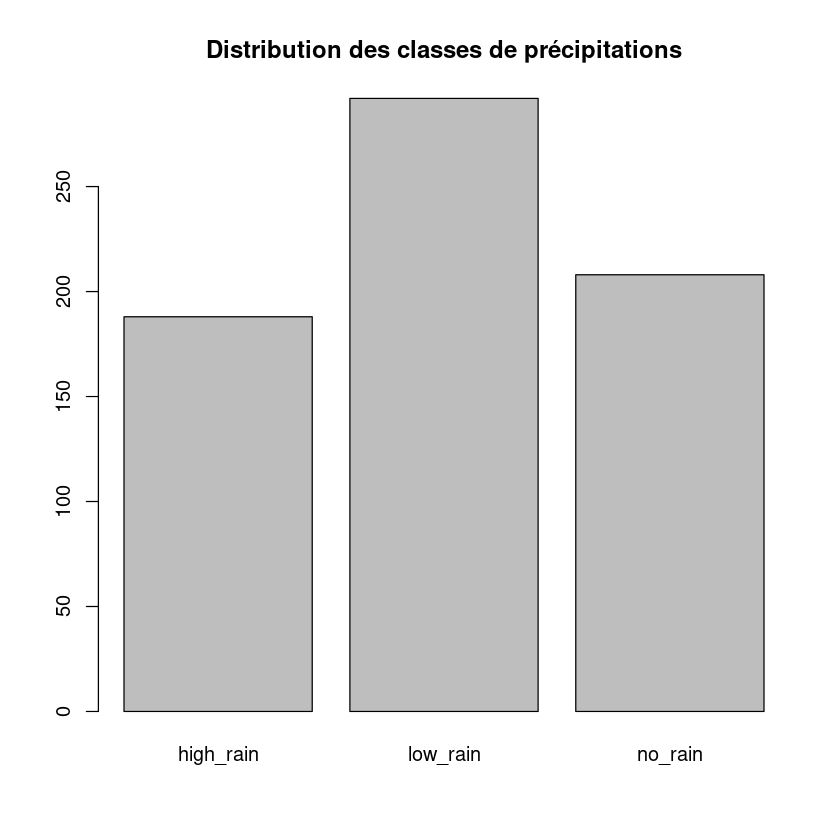

In [6]:
barplot((table(raindata$rain_class)),main="Distribution des classes de précipitations")
abline(h=5000, col="blue")

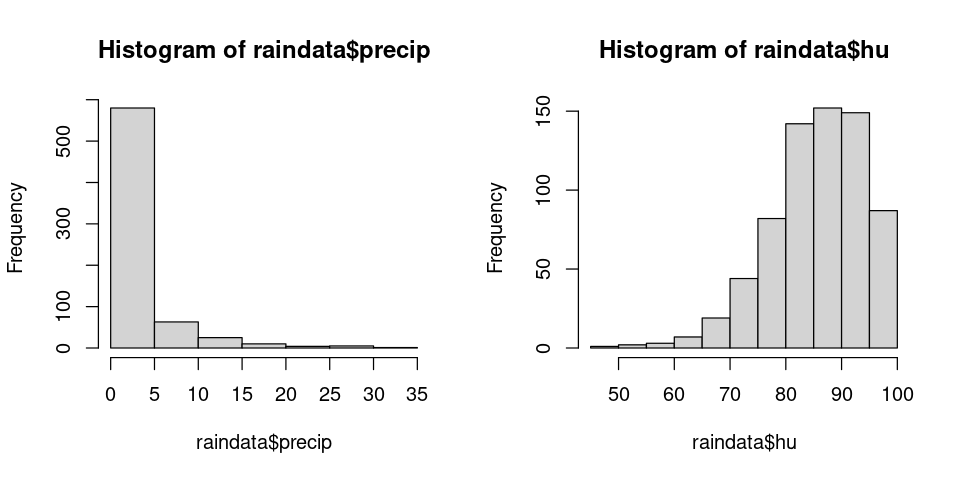

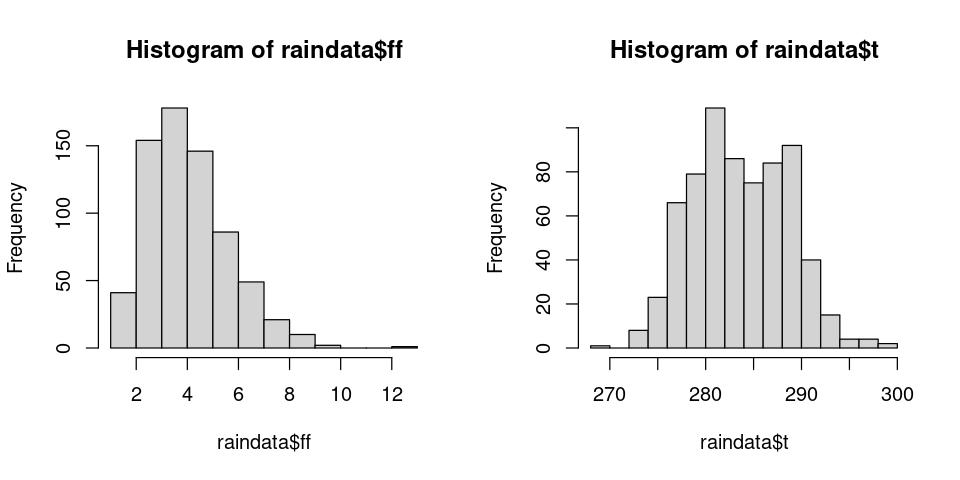

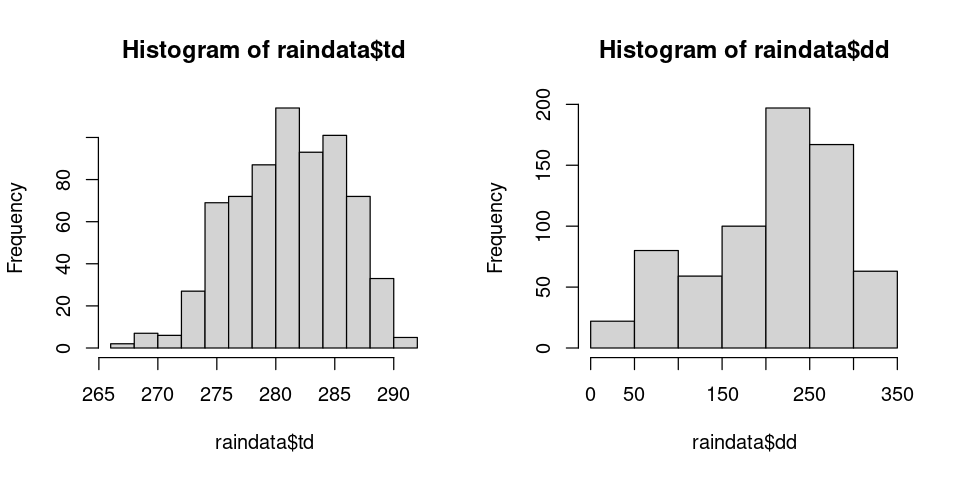

In [7]:
par(mfrow = c(1, 2))
options(repr.plot.width = 8, repr.plot.height = 4)
    hist(raindata$precip)
    hist(raindata$hu)
# Même chose pour les autres variables
     hist(raindata$ff);hist(raindata$t);
#
    hist(raindata$td);hist(raindata$dd);

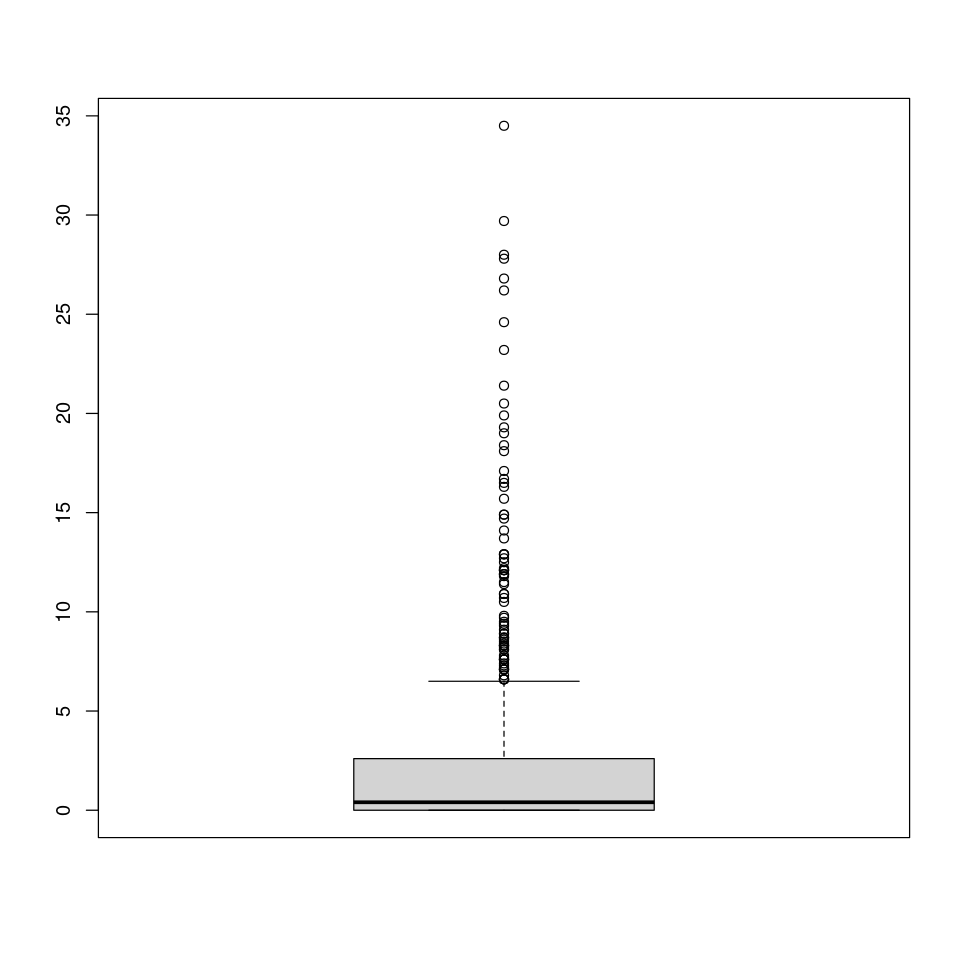

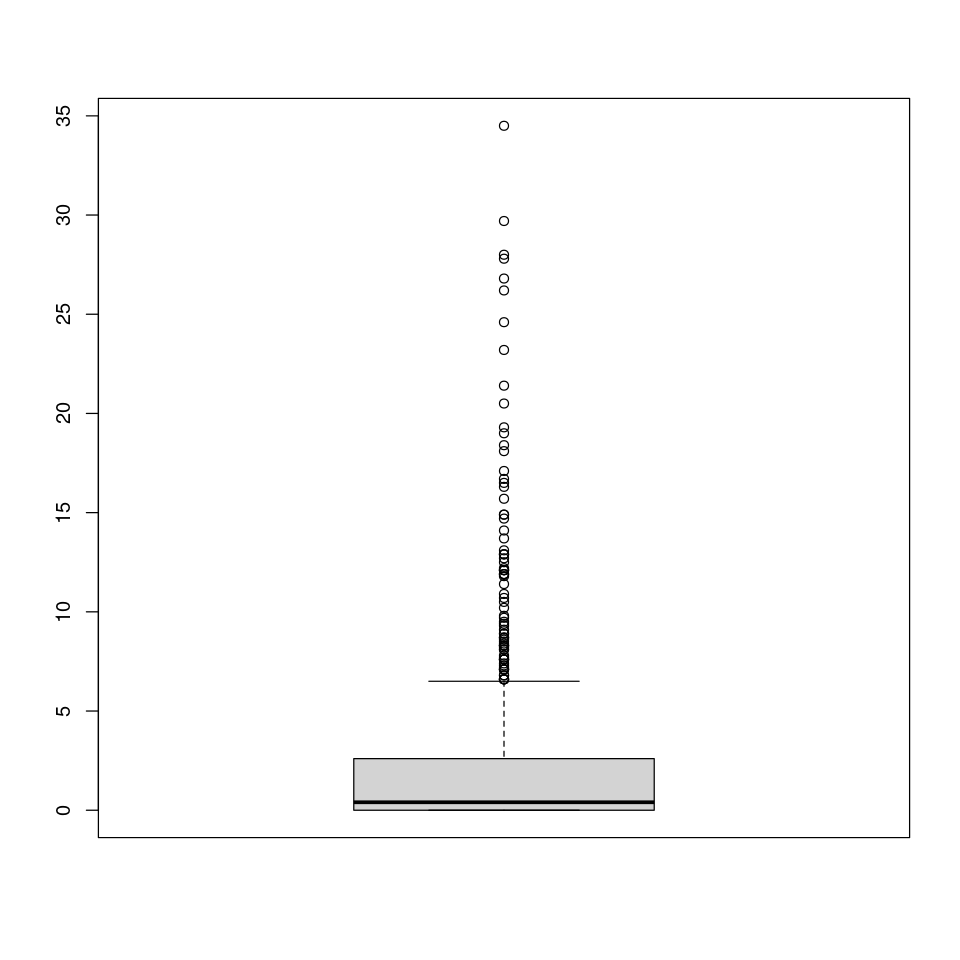

In [178]:
#visualisation sur la variable precip pour se rendre compte des outliers et de l'asymetrie
boxplot(raindata$precip)
boxplot(raindata$rain)


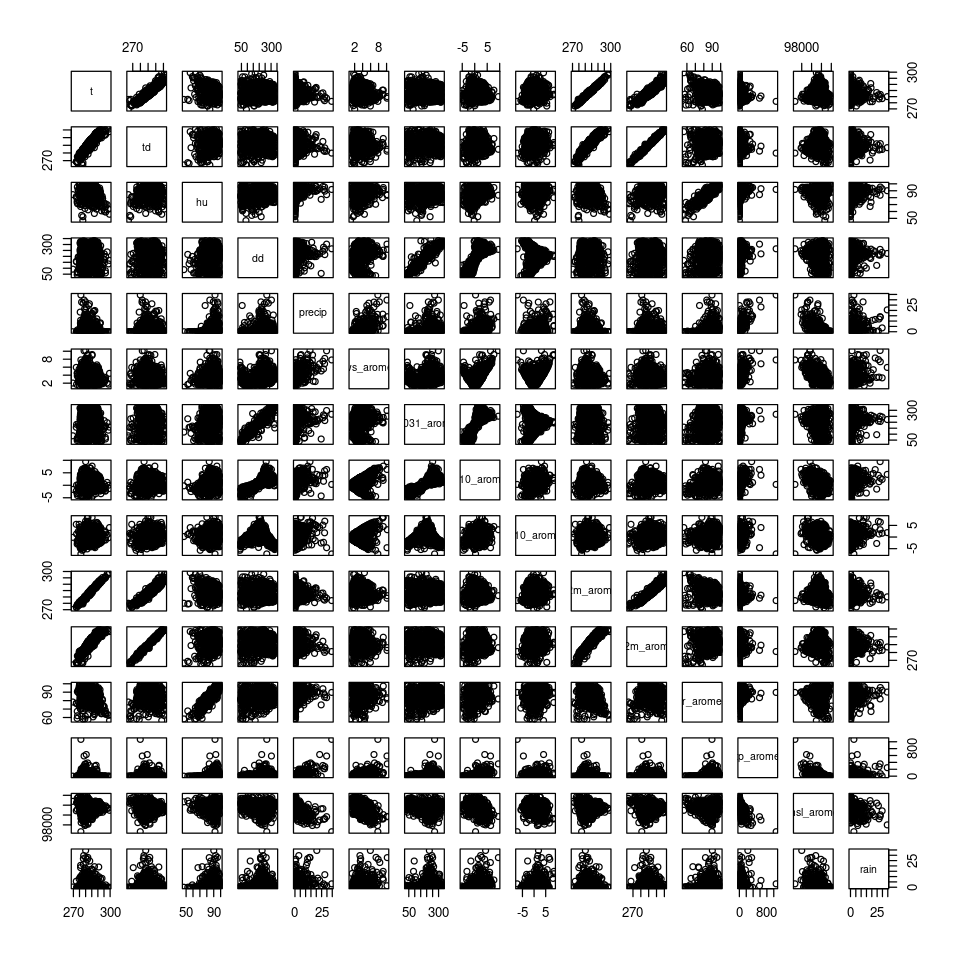

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(raindata[, c(3:17)])

## Etude bidimensionnelle

corrplot 0.92 loaded



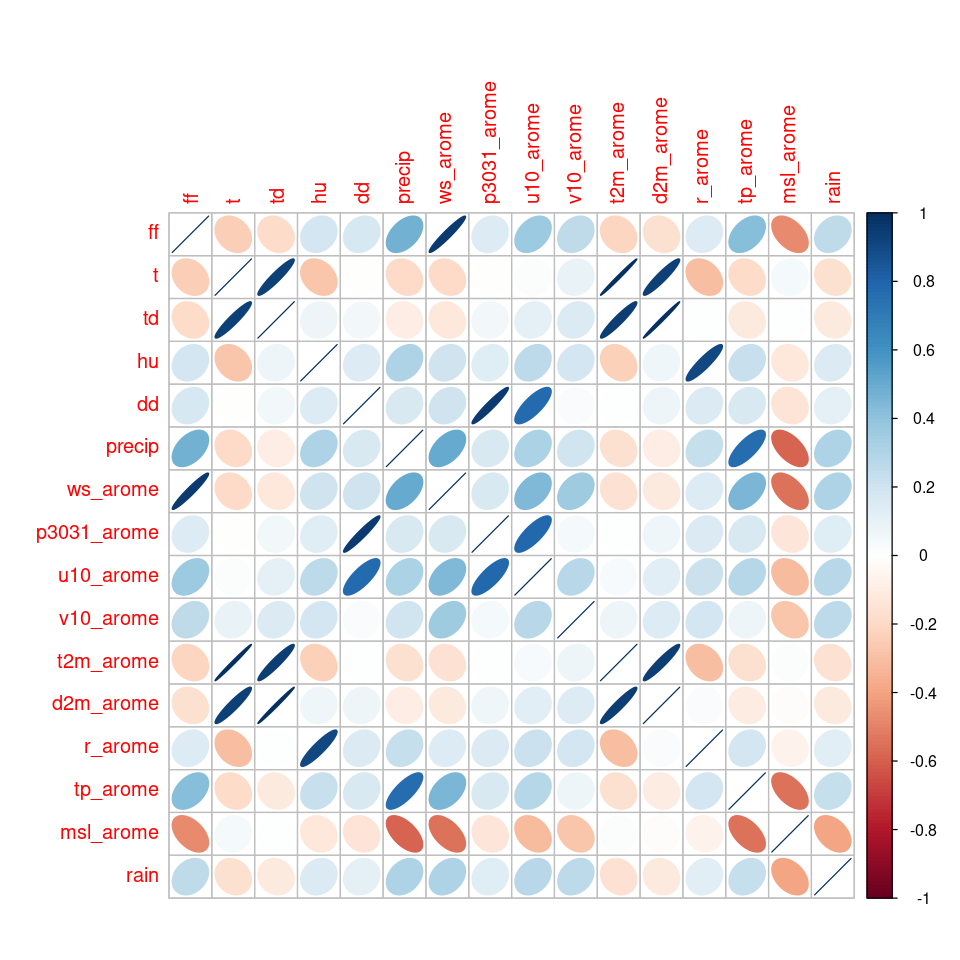

In [10]:
library("corrplot")
rainQuanti <- raindata[, c(2:17)]
M <- cor(rainQuanti)

corrplot(M, method="ellipse")

In [11]:
M

,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain
ff,1.0000000,-0.245198531,-0.183892682,0.18147862,0.178833998,0.47311517,0.9565954,0.140883752,0.36753703,0.25100799,-0.211023527,-0.16671169,0.142910619,0.42882671,-0.475119559,0.2557972
t,-0.2451985,1.000000000,0.937510384,-0.27309000,-0.002630937,-0.19301735,-0.1997867,-0.005524009,0.01680284,0.09429707,0.991619040,0.93424263,-0.304685123,-0.18603168,0.049184302,-0.1684050
td,-0.1838927,0.937510384,1.000000000,0.07615858,0.058782738,-0.09137756,-0.1272558,0.052609024,0.11886162,0.15883769,0.943203509,0.99195680,0.008253412,-0.11303173,0.001687841,-0.1182639
hu,0.1814786,-0.273090004,0.076158583,1.00000000,0.146699303,0.30609205,0.2041330,0.137747873,0.26010537,0.18219234,-0.236887383,0.06155562,0.905829292,0.22291483,-0.129265065,0.1567479
dd,0.1788340,-0.002630937,0.058782738,0.14669930,1.000000000,0.16340112,0.2080992,0.956345826,0.77647152,0.02560726,0.008809218,0.07051785,0.158024470,0.16575772,-0.141637604,0.1198078
precip,0.4731152,-0.193017349,-0.091377560,0.30609205,0.163401119,1.00000000,0.5098766,0.164396176,0.31345232,0.19368592,-0.166934925,-0.09292312,0.234012303,0.76531931,-0.585202743,0.3048392
ws_arome,0.9565954,-0.199786694,-0.127255848,0.20413298,0.208099160,0.50987657,1.0000000,0.168327066,0.44498079,0.35933192,-0.158507792,-0.11043268,0.141098424,0.45679642,-0.542643752,0.3014194
p3031_arome,0.1408838,-0.005524009,0.052609024,0.13774787,0.956345826,0.16439618,0.1683271,1.000000000,0.78422889,0.04156553,0.001867455,0.06139688,0.151969917,0.16704860,-0.135211398,0.1316207
u10_arome,0.3675370,0.016802841,0.118861619,0.26010537,0.776471518,0.31345232,0.4449808,0.784228885,1.00000000,0.27925840,0.036458180,0.12039194,0.215940654,0.28803174,-0.311143918,0.2774749
v10_arome,0.2510080,0.094297065,0.158837691,0.18219234,0.025607260,0.19368592,0.3593319,0.041565533,0.27925840,1.00000000,0.078580958,0.14447236,0.183838608,0.07020758,-0.272034829,0.2682351


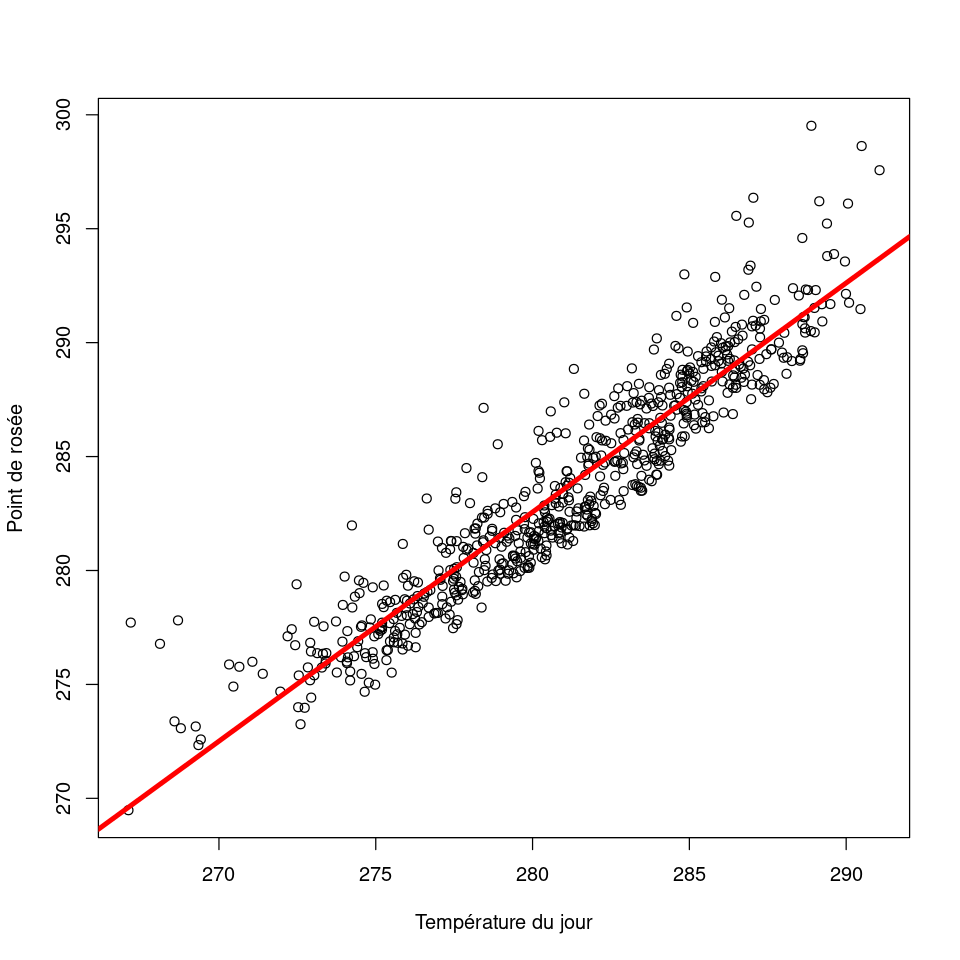

In [12]:
plot(raindata$t~raindata$td,xlab="Température du jour",
ylab="Point de rosée")
abline(lm(raindata$t~raindata$td, data=raindata), lwd = 4,col="red")

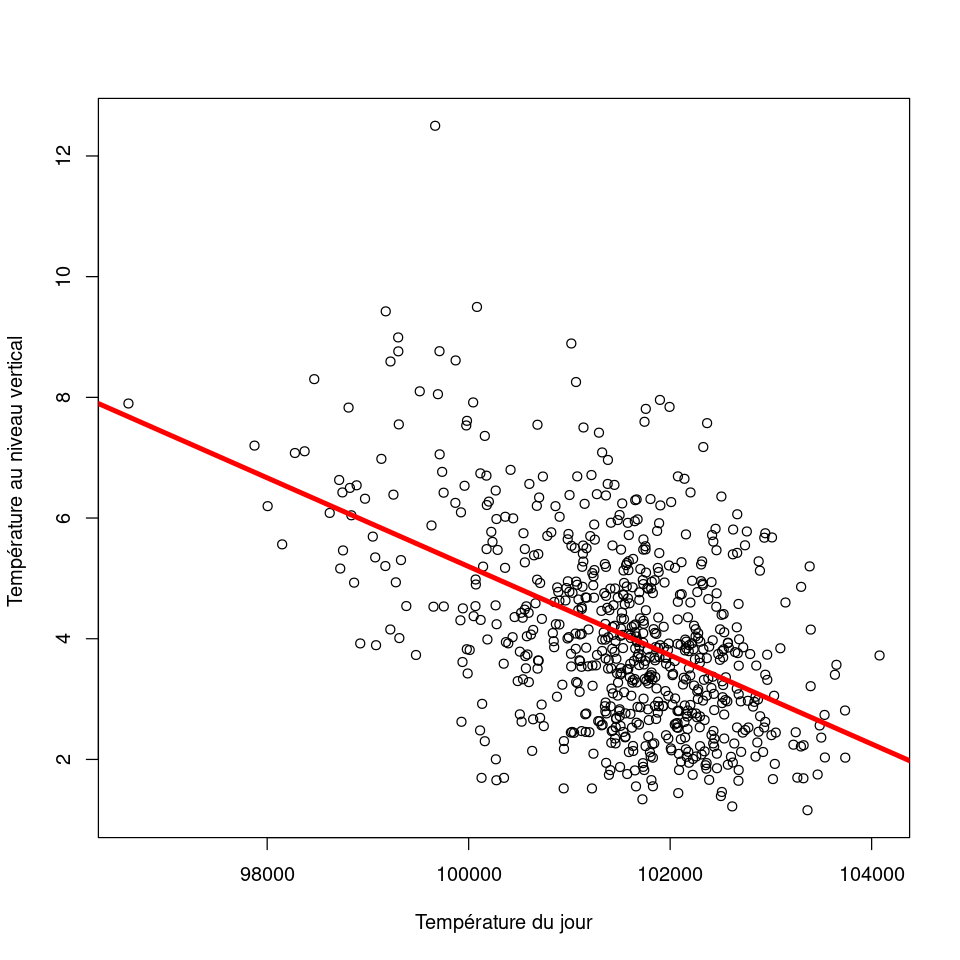

In [13]:
plot(raindata$ff~raindata$msl_arome,xlab="Température du jour",
ylab="Température au niveau vertical ")
abline(lm(raindata$ff~raindata$msl_arome, data=raindata), lwd = 4,col="red")

#### Analyse bidimensionnelle entre une variable qualitative et une variable quantitative


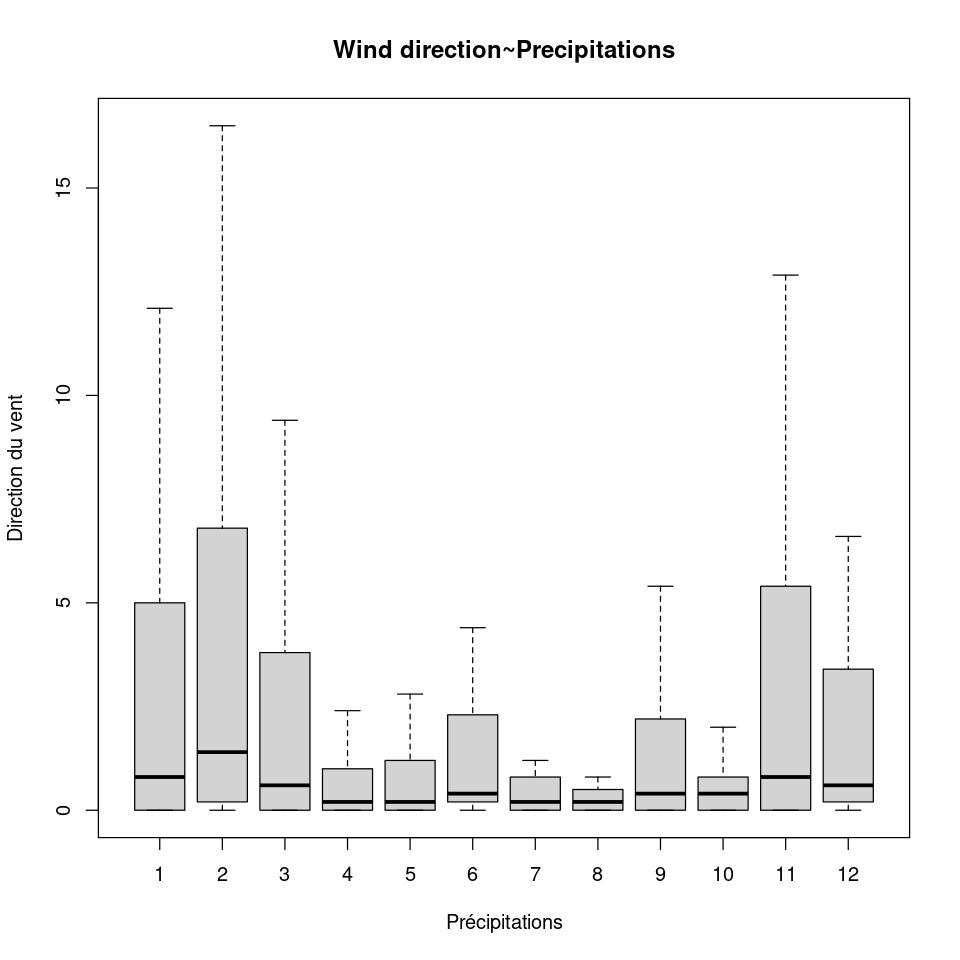

In [14]:
boxplot(raindata$precip~raindata$date, outline=FALSE, main="Wind direction~Precipitations",
xlab="Précipitations", ylab="Direction du vent")


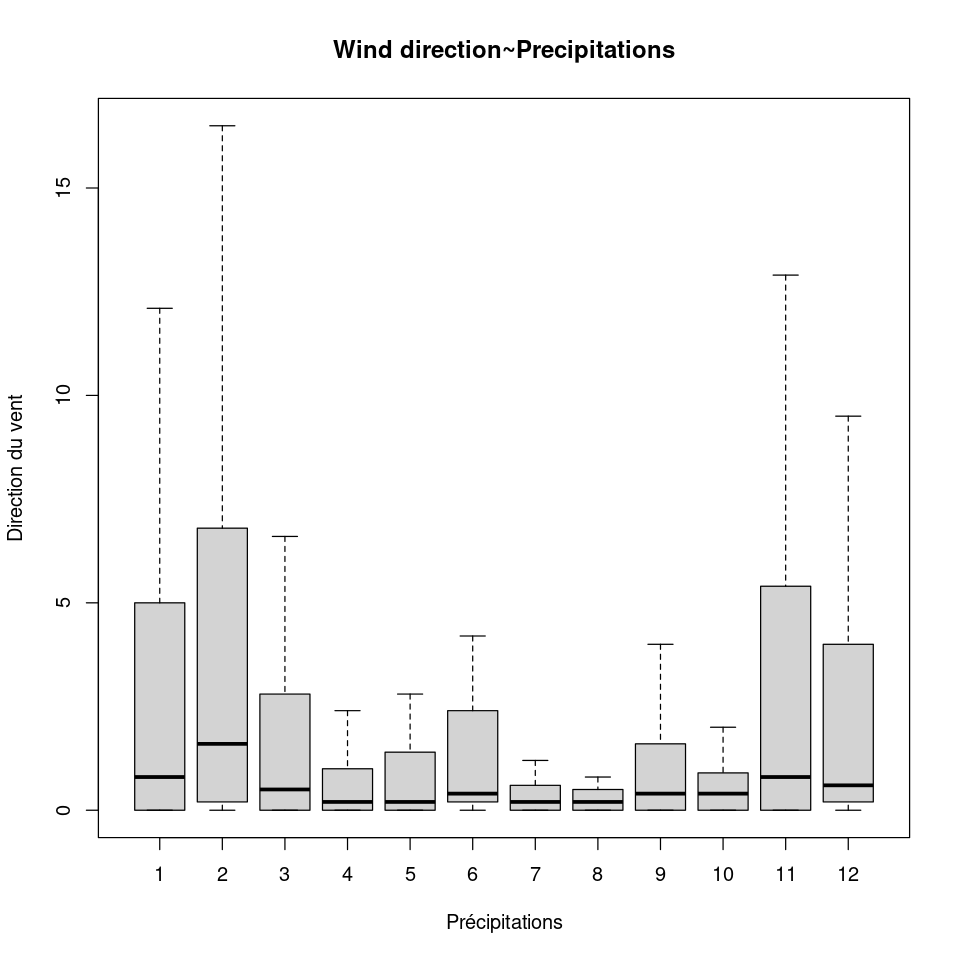

In [15]:
boxplot(raindata$rain~raindata$date, outline=FALSE, main="Wind direction~Precipitations",
xlab="Précipitations", ylab="Direction du vent")

## Analyse en Composantes Principales

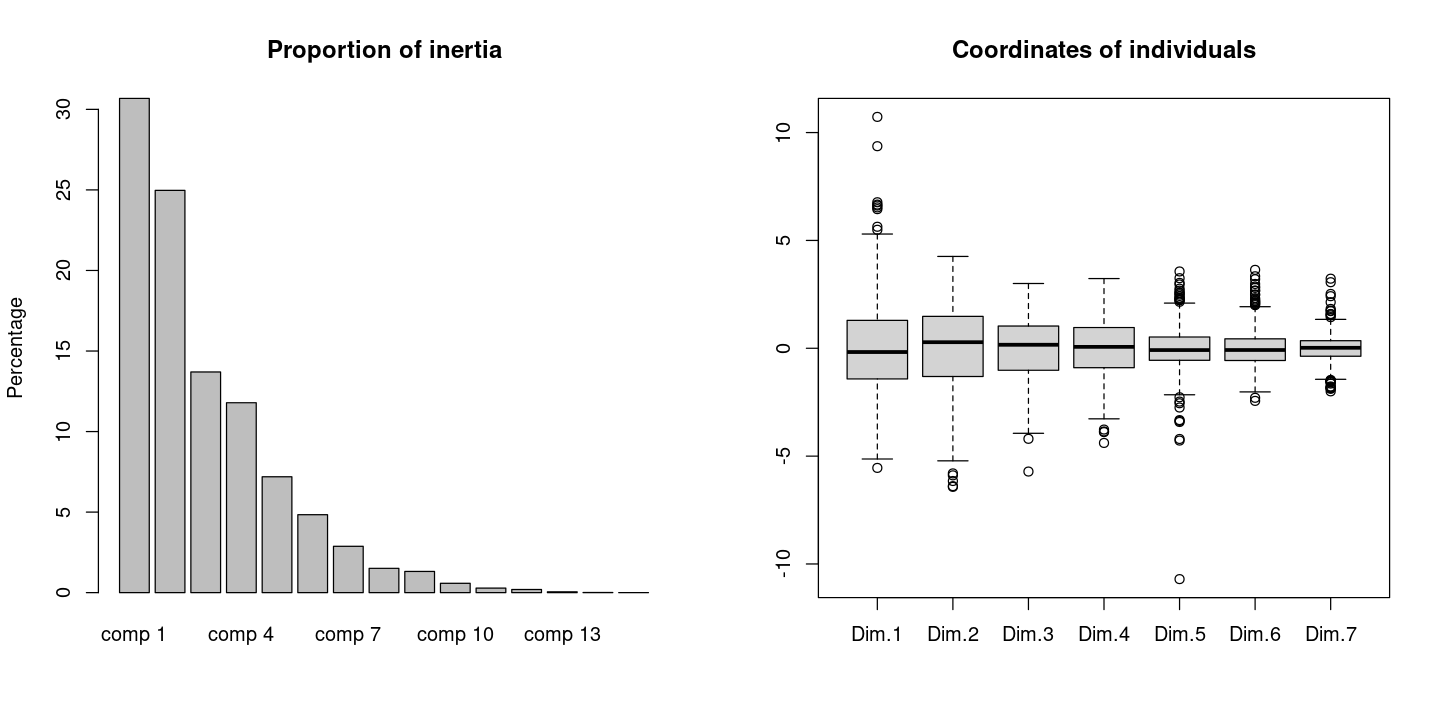

In [16]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)
acp <- PCA(raindata[, c(2:16)], scale.unit = TRUE,
           graph = FALSE,  ncp = 7)
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")

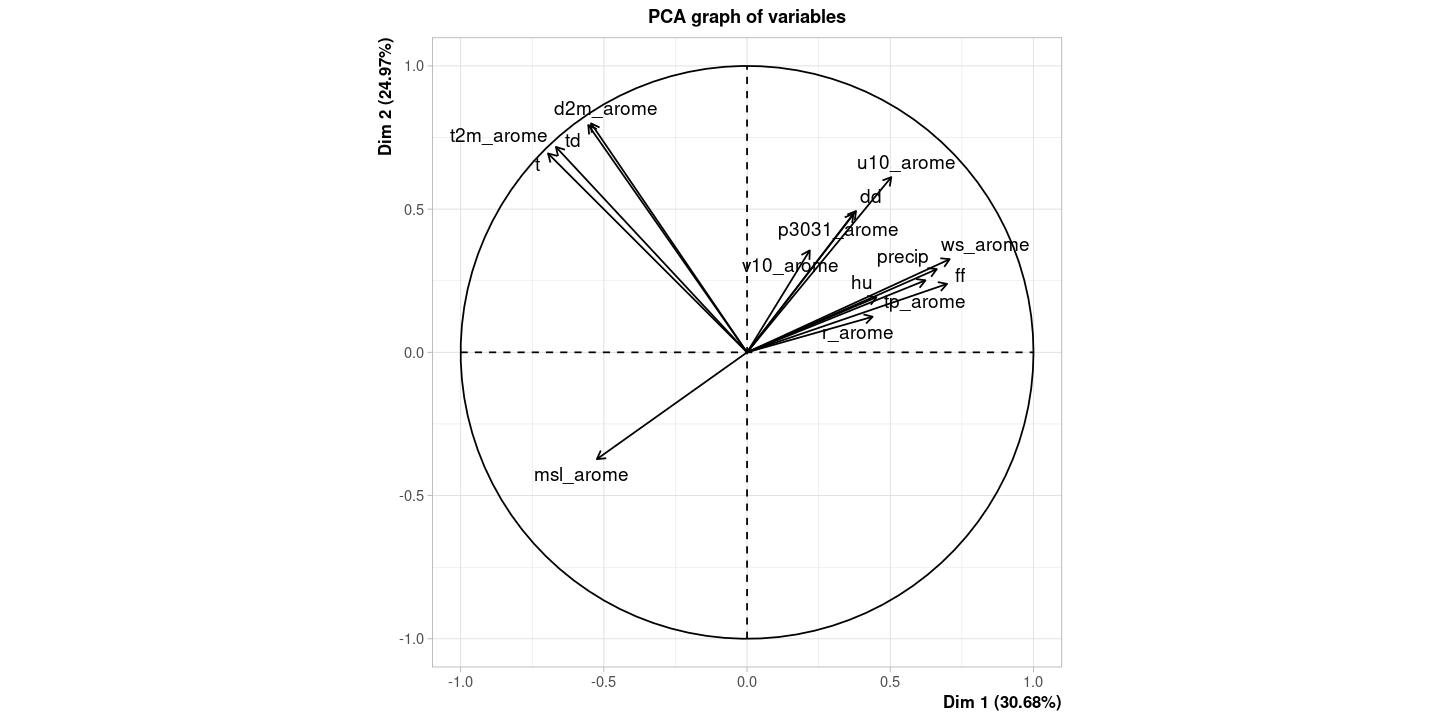

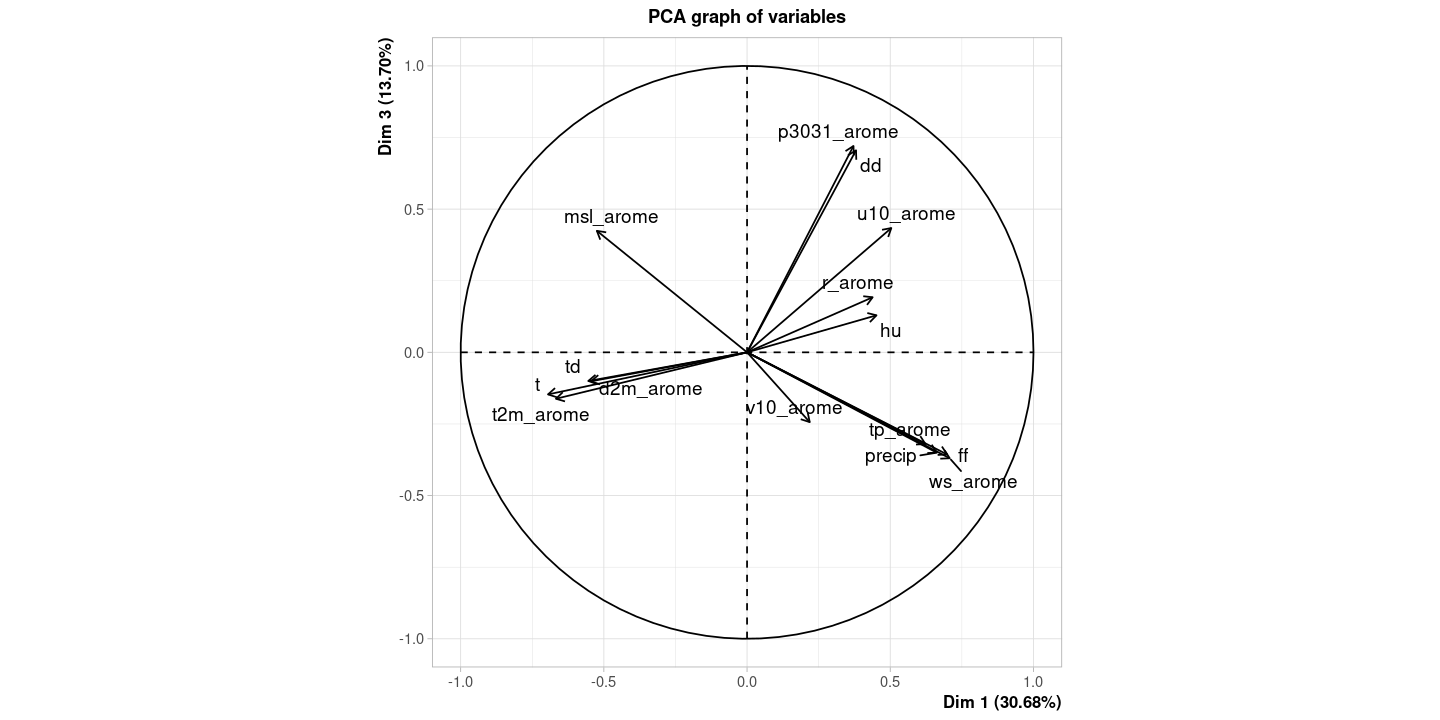

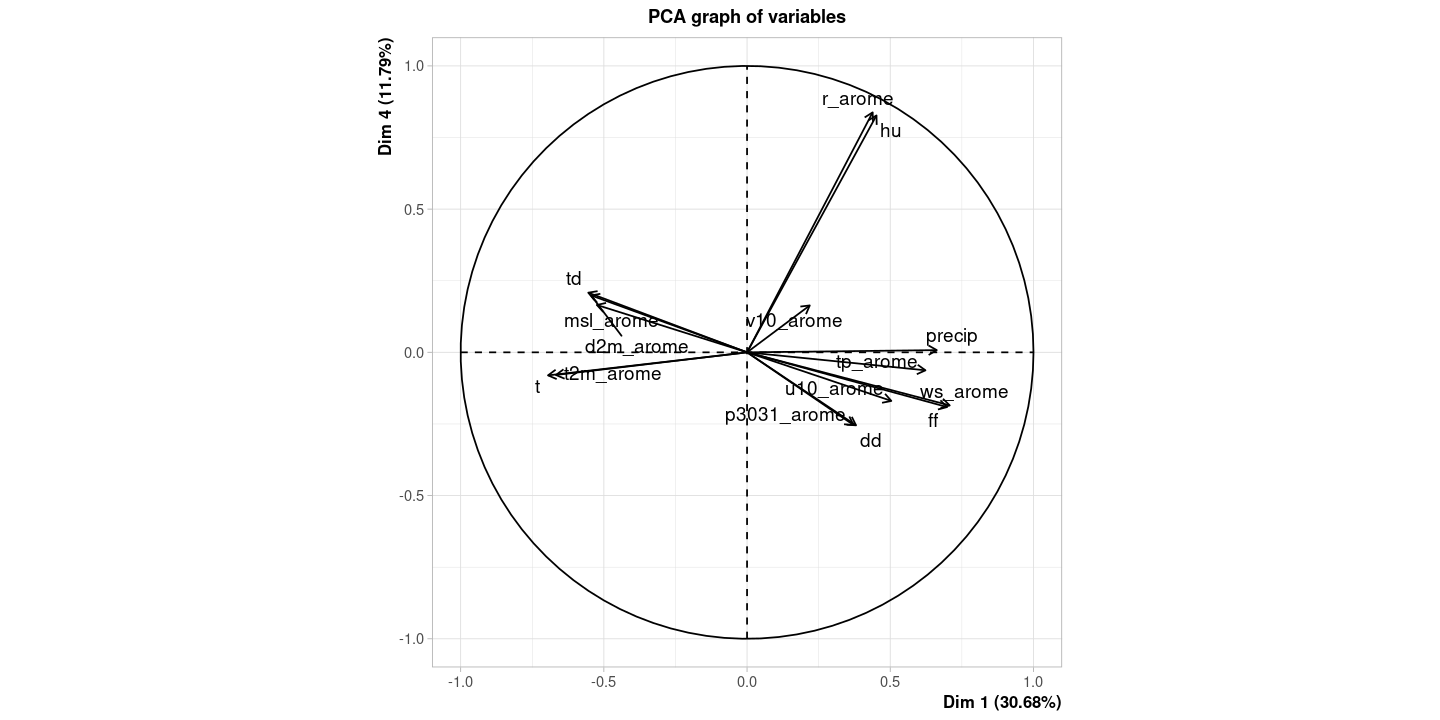

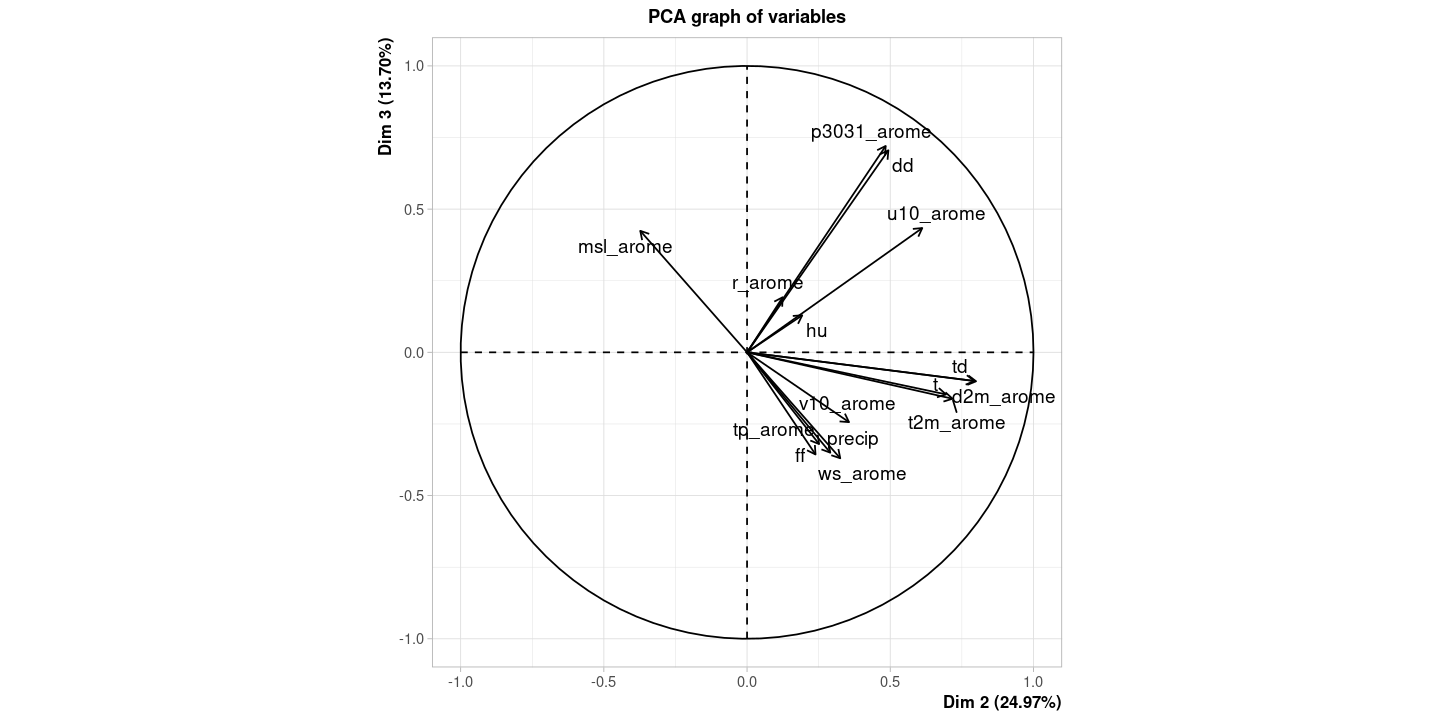

In [17]:
par(mfrow = c(2, 2))
plot(acp, choix = "varcor")
plot(acp, choix = "varcor", c(1,3))
plot(acp, choix = "varcor", c(1,4))
plot(acp, choix = "varcor", c(2,3))

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


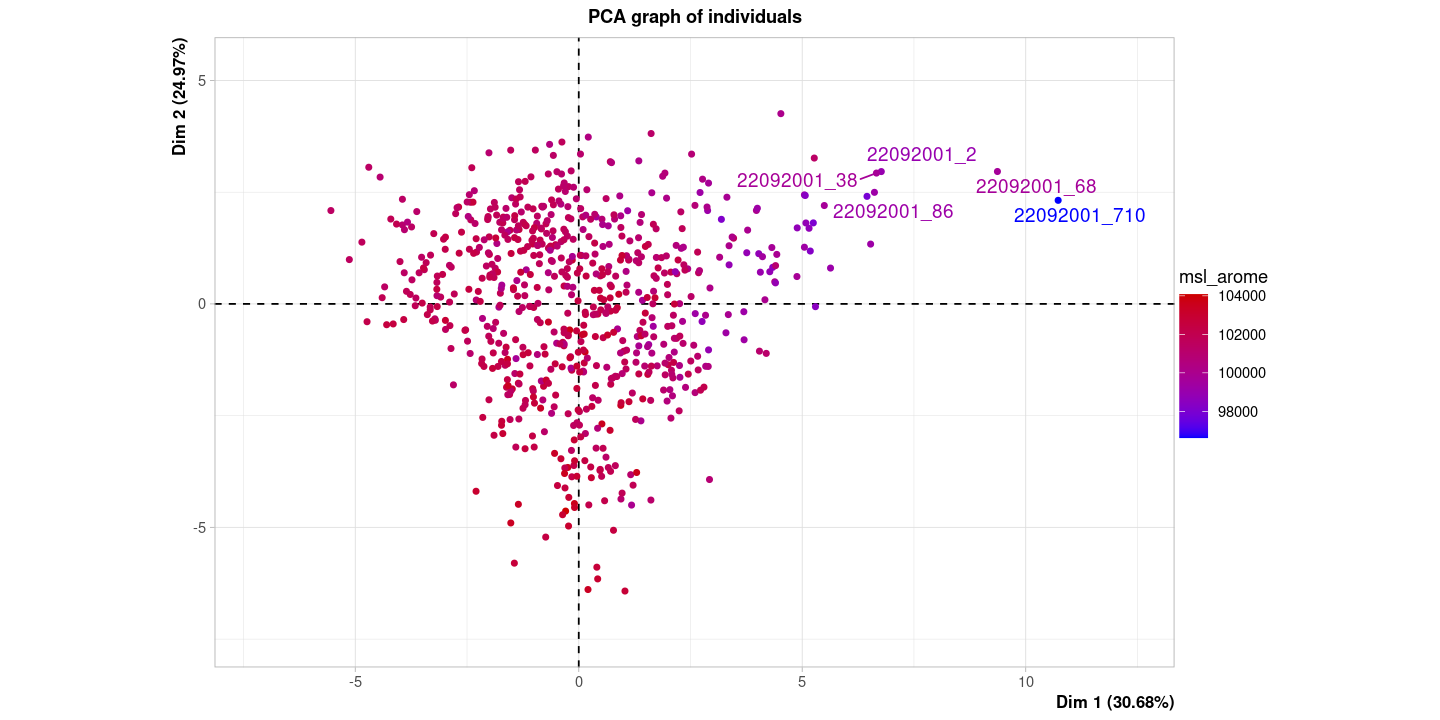

In [18]:
plot(acp, choix = "ind", habillage = 15,
     select = "contrib 5", unselect = 0)

In [19]:
library("factoextra")

Le chargement a nécessité le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



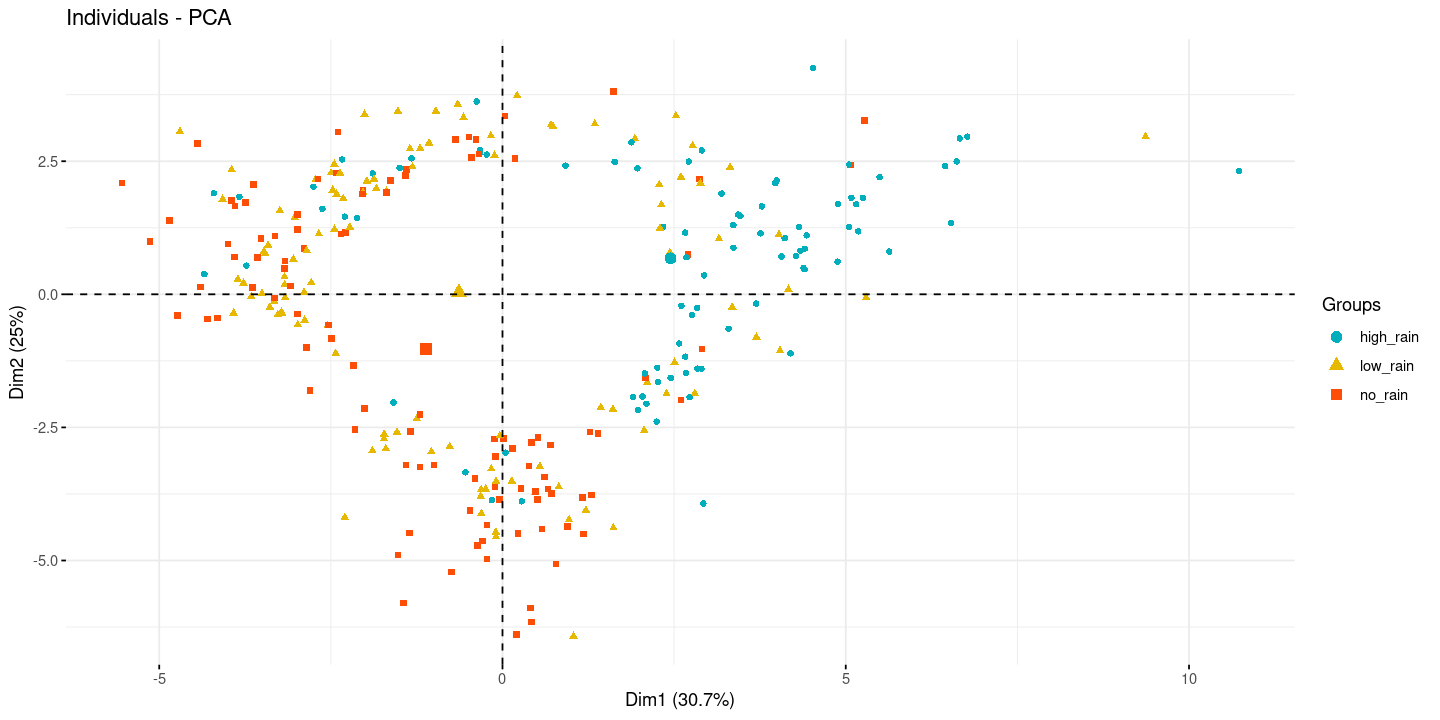

In [20]:
library("factoextra")
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups",
             select.ind= list(contrib = 300) 
             )

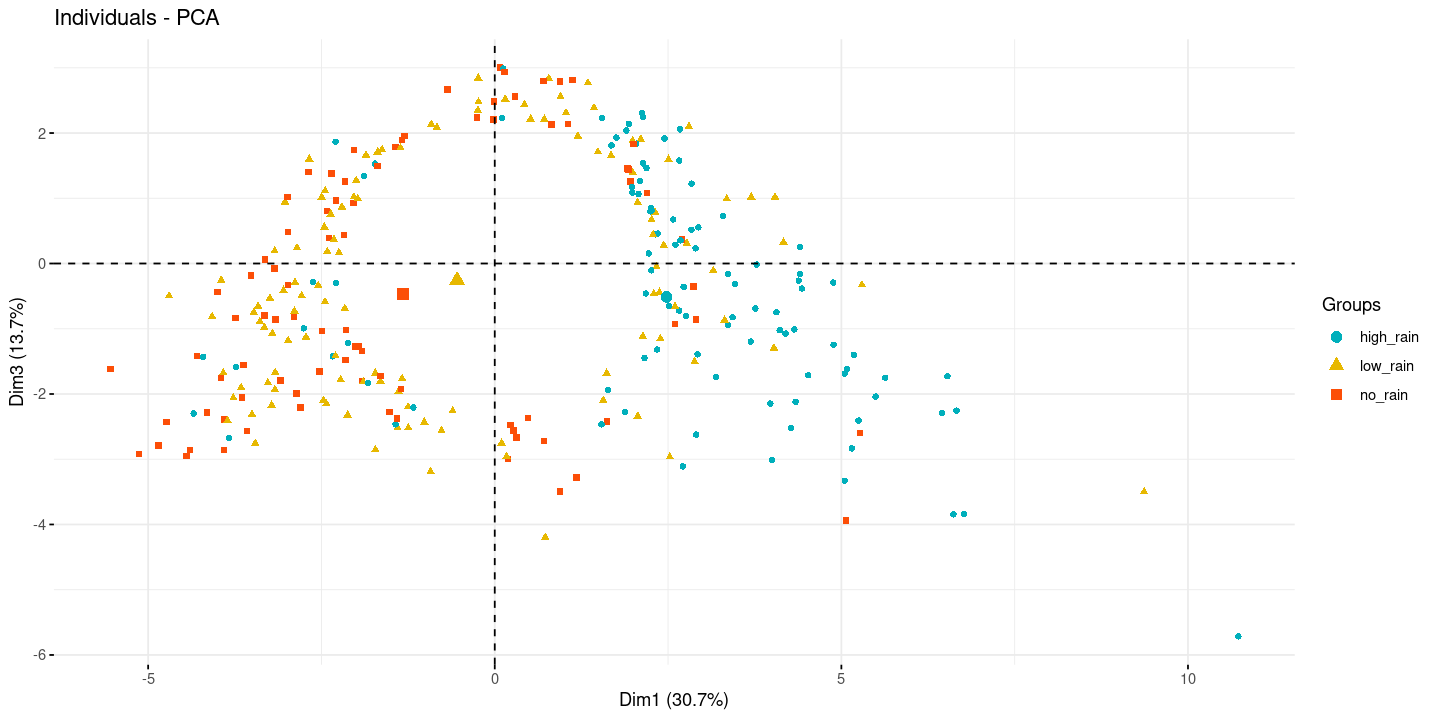

In [21]:
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             axes = c(1,3),
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups",
             select.ind= list(contrib = 300)
             )

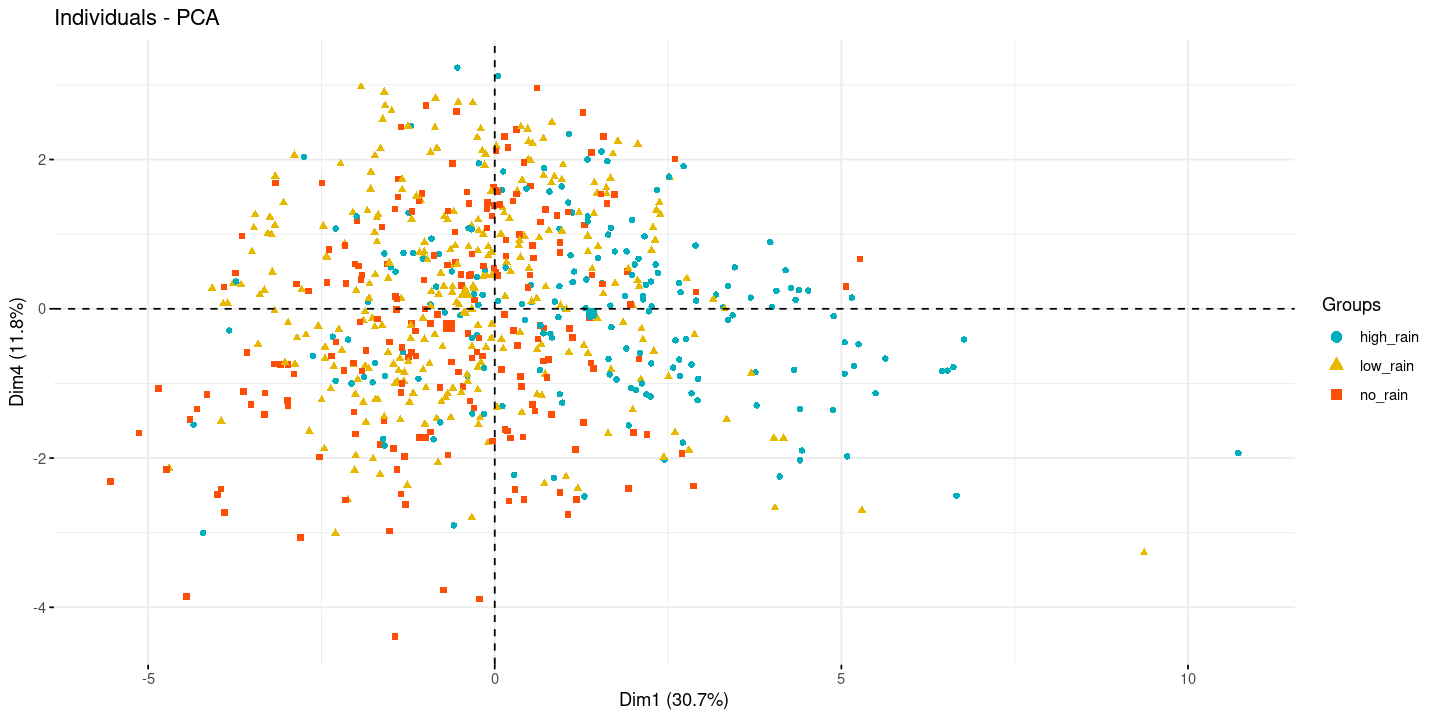

In [22]:
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             axes = c(1,4),
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

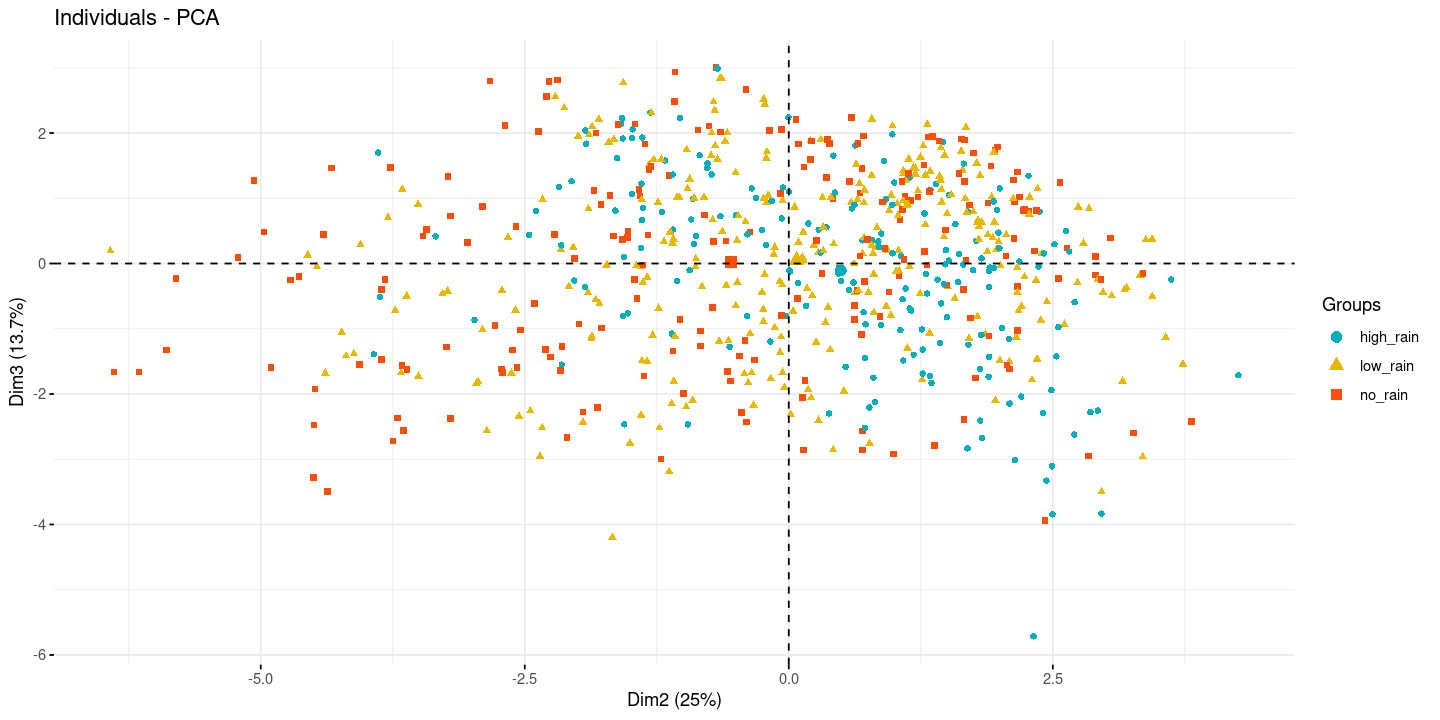

In [23]:
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             axes = c(2,3),
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

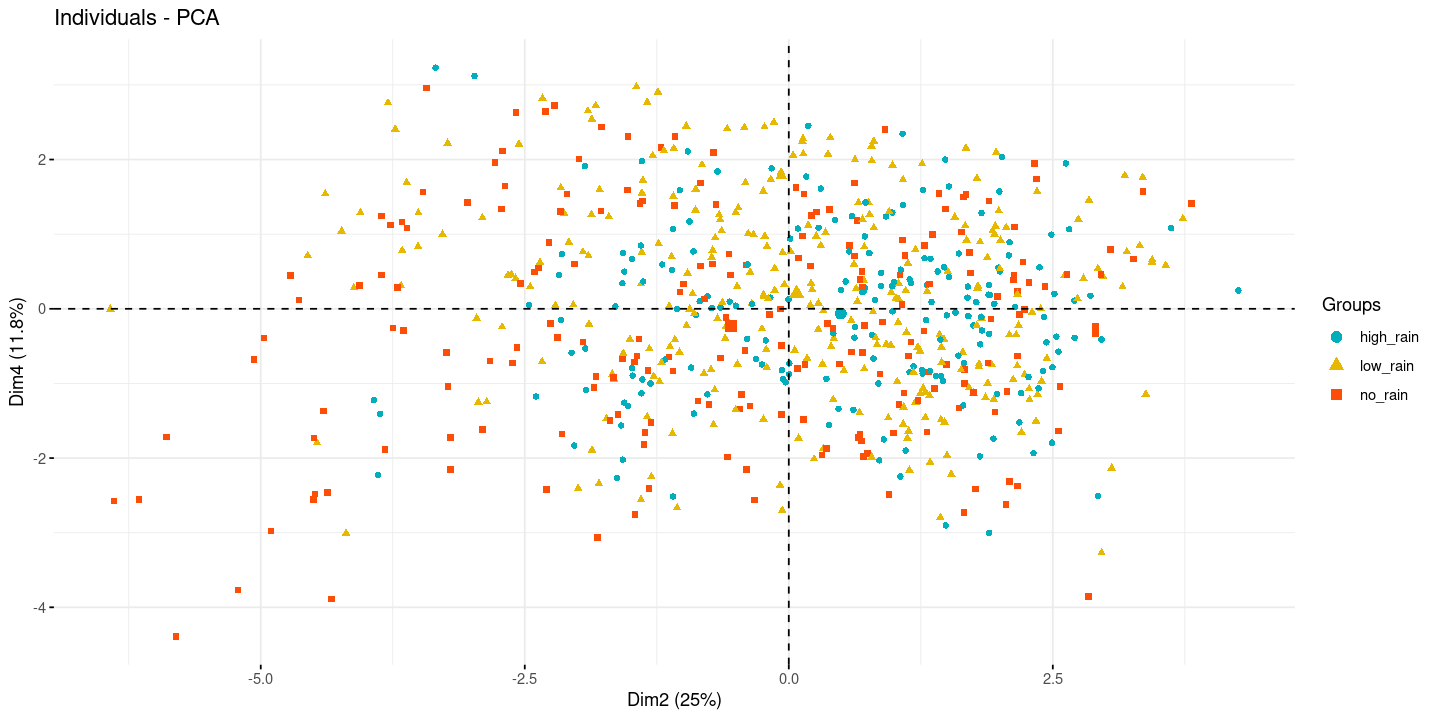

In [24]:
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             axes = c(2,4),
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

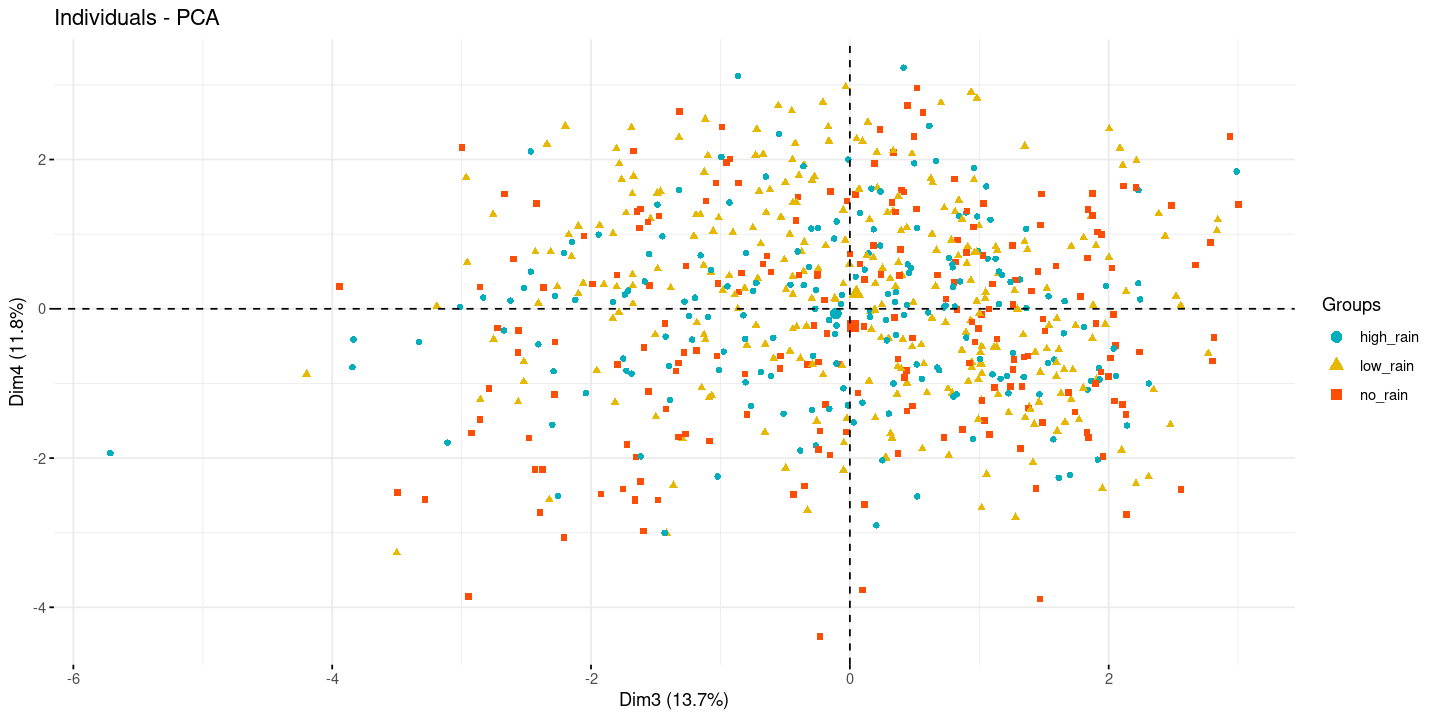

In [25]:
fviz_pca_ind(acp,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             axes = c(3,4),
             col.ind = raindata$rain_class, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             #addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

# Extraction des échantillons apprentissage et test

In [26]:
set.seed(234) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(raindata) # nombre de lignes dans les données
nvar <- ncol(raindata) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

Construction des échantillons pour la régression: prévision de rain.

In [27]:
# construction de l'échantillon d'apprentissage
datappr_temp <- raindata[appri, -18] 
# construction de l'échantillon test
datestr_temp <- raindata[testi, -18] 

Construction des échantillons pour la classification: prévision de rain_class.

In [28]:
# construction de l'échantillon d'apprentissage
datappq_temp <- raindata[appri,-17]
# construction de l'échantillon test 
datestq_temp <- raindata[testi,-17] 

In [29]:
library(caret)


Le chargement a nécessité le package : lattice



In [30]:
#Regression
# centrage et réduction des variables
xTransr=preProcess(datappr_temp[,-17])
datappr=predict(xTransr,datappr_temp)
datestr=predict(xTransr,datestr_temp)


#classification
xTransq=preProcess(datappq_temp)
datappq=predict(xTransq,datappq_temp)
datestq=predict(xTransq,datestq_temp)

* Fonction traçant le graphe des résidus avec des couleurs et des échelles fixes sur les axes.

In [31]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Définition d'une fonction pour un graphe coloré et des échelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(0, 15), ylim = c(-15, 30), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

## Fonctions de perte

### Risque empirique associé à la 0-1 loss

## 1) Modèles linéaires : Régression logistique

- Régression logistique binomiale (one vs rest)

##### Modèle sans intéractions

In [32]:
# estimations du modèle complet
log.lm <- glm(rain_class~., data= datappq,family = binomial)
# nous renseigne sur la signification des paramètres
anova(log.lm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,549,646.5004,NA
date,11,33.662896141,538,612.8375,4.105615e-04
ff,1,19.131110579,537,593.7064,1.220393e-05
t,1,0.018059543,536,593.6883,8.930975e-01
td,1,6.192927925,535,587.4954,1.282618e-02
hu,1,0.004545785,534,587.4908,9.462454e-01
dd,1,8.889842157,533,578.6010,2.867615e-03
precip,1,10.357120512,532,568.2439,1.289762e-03
ws_arome,1,7.575085847,531,560.6688,5.918056e-03


In [33]:
# méthode AIC d'obtention d'un modèle optimal
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=530.54
rain_class ~ date + ff + t + td + hu + dd + precip + ws_arome + 
    p3031_arome + u10_arome + v10_arome + t2m_arome + d2m_arome + 
    r_arome + tp_arome + msl_arome

              Df Deviance    AIC
- date        11   492.63 524.63
- d2m_arome    1   476.54 528.54
- td           1   476.54 528.54
- r_arome      1   476.60 528.60
- t2m_arome    1   476.62 528.62
- hu           1   476.63 528.63
- t            1   476.69 528.69
- ff           1   477.37 529.37
<none>             476.54 530.54
- dd           1   478.62 530.62
- p3031_arome  1   479.00 531.00
- ws_arome     1   479.07 531.07
- precip       1   481.00 533.00
- u10_arome    1   483.51 535.51
- v10_arome    1   484.21 536.21
- tp_arome     1   487.96 539.96
- msl_arome    1   528.16 580.16

Step:  AIC=524.63
rain_class ~ ff + t + td + hu + dd + precip + ws_arome + p3031_arome + 
    u10_arome + v10_arome + t2m_arome + d2m_arome + r_arome + 
    tp_arome + msl_arome

              Df Deviance    AIC
- hu  

In [34]:
#modèle final retenu
anova(log.lm.step, test = "Chisq")


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,549,646.5004,NA
precip,1,40.410214,548,606.0902,2.058621e-10
ws_arome,1,14.214182,547,591.8760,1.631364e-04
u10_arome,1,19.507762,546,572.3682,1.001917e-05
v10_arome,1,14.045792,545,558.3224,1.784126e-04
d2m_arome,1,9.946392,544,548.3760,1.611649e-03
r_arome,1,2.108653,543,546.2674,1.464682e-01
tp_arome,1,2.590374,542,543.6770,1.075150e-01
msl_arome,1,47.696526,541,495.9805,4.975724e-12


##### Modèle avec intéractions

In [35]:
# régression avec le modèle min
log.qm2 <- glm(rain_class ~ 1, data = datappq,family = binomial)
anova(log.qm2, test = "Chisq")


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,549,646.5004,NA


In [36]:
# algorithme stepwise en précisant le plus grand modèle possible
log.qm.step2<- step(log.qm2, direction = "both",
    scope = list(lower = ~1, upper = ~(precip+ date + ff + t + td + hu + 
            dd + ws_arome + p3031_arome + u10_arome + v10_arome + t2m_arome +d2m_arome +r_arome + tp_arome
                                       + msl_arome)^2), 
    family=binomial)

Start:  AIC=648.5
rain_class ~ 1

              Df Deviance    AIC
+ msl_arome    1   553.29 557.29
+ u10_arome    1   592.84 596.84
+ ws_arome     1   605.73 609.73
+ precip       1   606.09 610.09
+ v10_arome    1   610.75 614.75
+ ff           1   615.51 619.51
+ tp_arome     1   625.69 629.69
+ hu           1   626.36 630.36
+ p3031_arome  1   628.36 632.36
+ dd           1   631.19 635.19
+ r_arome      1   631.82 635.82
+ date        11   612.84 636.84
+ t            1   634.26 638.26
+ t2m_arome    1   636.36 640.36
+ td           1   642.35 646.35
+ d2m_arome    1   642.53 646.53
<none>             646.50 648.50

Step:  AIC=557.29
rain_class ~ msl_arome

              Df Deviance    AIC
+ u10_arome    1   532.78 538.78
+ r_arome      1   540.14 546.14
+ p3031_arome  1   540.15 546.15
+ hu           1   540.80 546.80
+ date        11   521.89 547.89
+ v10_arome    1   542.18 548.18
+ dd           1   543.16 549.16
+ t2m_arome    1   545.11 551.11
+ t            1   545.32 551.32

In [37]:
anova(log.qm.step2, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,549,646.5004,NA
msl_arome,1,93.212082,548,553.2883,4.698044e-22
u10_arome,1,20.511170,547,532.7771,5.928427e-06
r_arome,1,9.216133,546,523.5610,2.398917e-03
tp_arome,1,8.078961,545,515.4820,4.478211e-03
d2m_arome,1,6.656577,544,508.8255,9.879052e-03
v10_arome,1,5.930682,543,502.8948,1.487948e-02
precip,1,3.321558,542,499.5732,6.837700e-02
ws_arome,1,3.592732,541,495.9805,5.803276e-02


In [38]:
# Prédiction sur l'échantillon test du modèle avec intéractions
pred.log <- predict(log.qm.step2, newdata = datestq, type = "response")

In [39]:
# Table de contingence
table(pred.log,datestq[,"rain_class"])

                     
pred.log              high_rain low_rain no_rain
  0.00809090091631558         1        0       0
  0.0259088086791811          1        0       0
  0.0320128188142174          1        0       0
  0.0548189675848943          1        0       0
  0.0583242580439466          1        0       0
  0.088455962272145           1        0       0
  0.132158598526179           0        1       0
  0.145070461966302           1        0       0
  0.183807516800507           0        1       0
  0.231385870864098           1        0       0
  0.252435424549951           1        0       0
  0.366476776762084           0        1       0
  0.370143130849956           1        0       0
  0.424285786971515           1        0       0
  0.425520581792712           1        0       0
  0.444009643065782           0        1       0
  0.457799988399307           1        0       0
  0.458886688345048           0        1       0
  0.460424832607392           1        0       

- Régression logistique Multinomiale

In [40]:
library(nnet)

In [41]:
rglm <- multinom(rain_class ~., data = datappq)

# weights:  84 (54 variable)
initial  value 604.236759 
iter  10 value 522.579818
iter  20 value 487.897915
iter  30 value 480.033520
iter  40 value 479.412228
iter  50 value 479.118394
iter  60 value 479.113690
iter  70 value 479.113043
iter  70 value 479.113043
iter  70 value 479.113043
final  value 479.113043 
converged


- Prévision sur l'échantillon test

In [42]:
# Prévision du modèle binom avec interraction et sélection de variables
pred.log <- predict(log.qm.step2, newdata = datestq, type = "response")
# Matrice de confusion
table1<-table(pred.log > 0.5, datestq[, "rain_class"]) 
table1


       
        high_rain low_rain no_rain
  FALSE        17        6       0
  TRUE         20       50      45

In [43]:
# Prévision du modèle multinomiale
predi.cl <- predict(rglm, newdata=datestq)

In [44]:
table(predi.cl,datestq[,"rain_class"])

           
predi.cl    high_rain low_rain no_rain
  high_rain        24        7       1
  low_rain         12       36      23
  no_rain           1       13      21

In [45]:
#pourcentage d'erreur du modèle multinomiale
errmulti<- 1-mean(predi.cl == datestq[,"rain_class"]) 
errmulti

[1] 0.4130435

# 2) SVM: support vector machines

In [46]:
library(e1071)

## SVM à noyau linéaire

In [47]:
# à l'aide de tune.svm, on determine les meilleurs paramètres
#svm.li.tune = tune.svm(rain_class ~ ., data = datappq, kernel="linear", cost = c(1.5,2,3,4,5))

In [48]:
#svm.li.tune$best.parameters$cost
#le meilleur cost est 1.5. 


In [49]:
# données d'apprentissage
svm.li=svm(rain_class~.,data=datappq,cost =1.5,kernel="linear")

In [50]:
# Prédiction réalisée sur l'échantillon test
pred.svm.lin=predict(svm.li,newdata=datestq)

In [51]:
#Erreur sur cette prédiction
errSvmLi<-1-sum((pred.svm.lin==datestq[,"rain_class"]))/nrow(datestq) # risque empirique associée à la 0-1 loss
errSvmLi

[1] 0.3985507

In [52]:
# Matrice de confusion 
table(pred.svm.lin,datestq[,"rain_class"])

            
pred.svm.lin high_rain low_rain no_rain
   high_rain        23        6       1
   low_rain         13       42      26
   no_rain           1        8      18

## SVM à noyau polynomial

In [53]:
# à l'aide de tune.svm, on determine les meilleurs paramètres
#svm.poly.tune = tune.svm(rain_class ~ ., data = datappq,kernel="polynomial", degree = c(1,2,3), coef0=c(2,3,4),
 # gamma = c(0.05, 0.1,0.15), cost = c(1,2,3,4,5))

In [54]:
#svm.poly.tune$best.parameters
#les meilleurs paramètres obtenus sont: degree=2, gamma=0.05, coef0=3, cost=2

In [55]:
# données d'apprentissage
svm.poly=svm(rain_class~.,data=datappq,degree = 2, 
    gamma = 0.05,cost=3,coeff0=4,kernel="polynomial")

In [56]:
# Prédiction réalisée sur l'échantillon test
pred.svm.poly=predict(svm.poly,newdata=datestq)

In [57]:
#Erreur sur cette prédiction
errSvmPoly<-1-sum((pred.svm.poly==datestq[,"rain_class"]))/nrow(datestq) # risque empirique associée à la 0-1 loss
errSvmPoly

[1] 0.4855072

In [58]:
# Matrice de confusion 
table(pred.svm.poly,datestq[,"rain_class"])

             
pred.svm.poly high_rain low_rain no_rain
    high_rain        14        2       0
    low_rain         22       49      37
    no_rain           1        5       8

# SVM à noyau gaussien

In [59]:
# à l'aide de tune.svm, on determine les meilleurs paramètres
svm.g.tune= tune.svm(rain_class ~ ., data = datappq,kernel="radial", cost = c(1,1.5,2,3),gamma = c(0.005,0.01,0.015))

In [60]:
#svm.g.tune$best.parameters
#gamma=0,01 et cost=1.5

In [61]:
# données d'apprentissage
svm.g=svm(rain_class~.,data=datappq,kernel="radial",cost = 1.5, gamma=0.01)

In [62]:
# Prédiction réalisée sur l'échantillon test
pred.svm.g=predict(svm.g,newdata=datestq)

In [63]:
#Erreur sur cette prédiction
errSvmG<-1-sum((pred.svm.g==datestq[,"rain_class"]))/nrow(datestq) # risque empirique associée à la 0-1 loss
errSvmG

[1] 0.4710145

In [64]:
# Matrice de confusion 
table(pred.svm.g,datestq[,"rain_class"])

           
pred.svm.g  high_rain low_rain no_rain
  high_rain        18        6       1
  low_rain         18       50      39
  no_rain           1        0       5

# SVM à noyau sigmoïde

In [65]:
# à l'aide de tune.svm, on determine les meilleurs paramètres
svm.sig.tune= tune.svm(rain_class ~ ., data = datappq,kernel="sigmoid", cost = c(1,2,3), 
                       gamma = c(0.01,0.015,0.02))

In [66]:
svm.sig.tune$best.parameters
#les meilleurs paramètres obtenus sont: gamma=0.01, cost=2


,gamma,cost
,<dbl>,<dbl>
7,0.01,3


In [67]:
# données d'apprentissage
svm.sig=svm(rain_class~.,data=datappq,cost = 3, gamma=0.015, kernel="sigmoid")

In [68]:
# Prédiction réalisée sur l'échantillon test
pred.svm.sig=predict(svm.sig,newdata=datestq)

In [69]:
#Erreur sur cette prédiction
errSvmSig<-1-sum((pred.svm.sig==datestq[,"rain_class"]))/nrow(datestq) # risque empirique associée à la 0-1 loss
errSvmSig

[1] 0.442029

In [70]:
# Matrice de confusion 
table(pred.svm.sig,datestq[,"rain_class"])

            
pred.svm.sig high_rain low_rain no_rain
   high_rain        20        5       1
   low_rain         16       50      37
   no_rain           1        1       7

# 3)Arbre Optimal (CART)

In [71]:
library(rpart) 
library(e1071)

In [72]:
set.seed(123)
# à l'aide de tune.rpart, on determine les meilleurs paramètres
tree.dis = tune.rpart(rain_class~.,data = datappq, parms = list(split="information"), cp = seq(0.001, 0.05,by = 0.001))

In [73]:
tree.dis$best.parameters

,cp
,<dbl>
16,0.016


In [74]:
options(repr.plot.width = 20, repr.plot.height = 20)
tree.dis <- rpart(rain_class ~ ., parms = list(split = "information"),data = datappq, control=list(cp=0.016))

In [75]:
install.packages('rpart.plot')
library(rpart.plot)


Installation du package dans ‘/home/samih/R/libs’
(car ‘lib’ n'est pas spécifié)



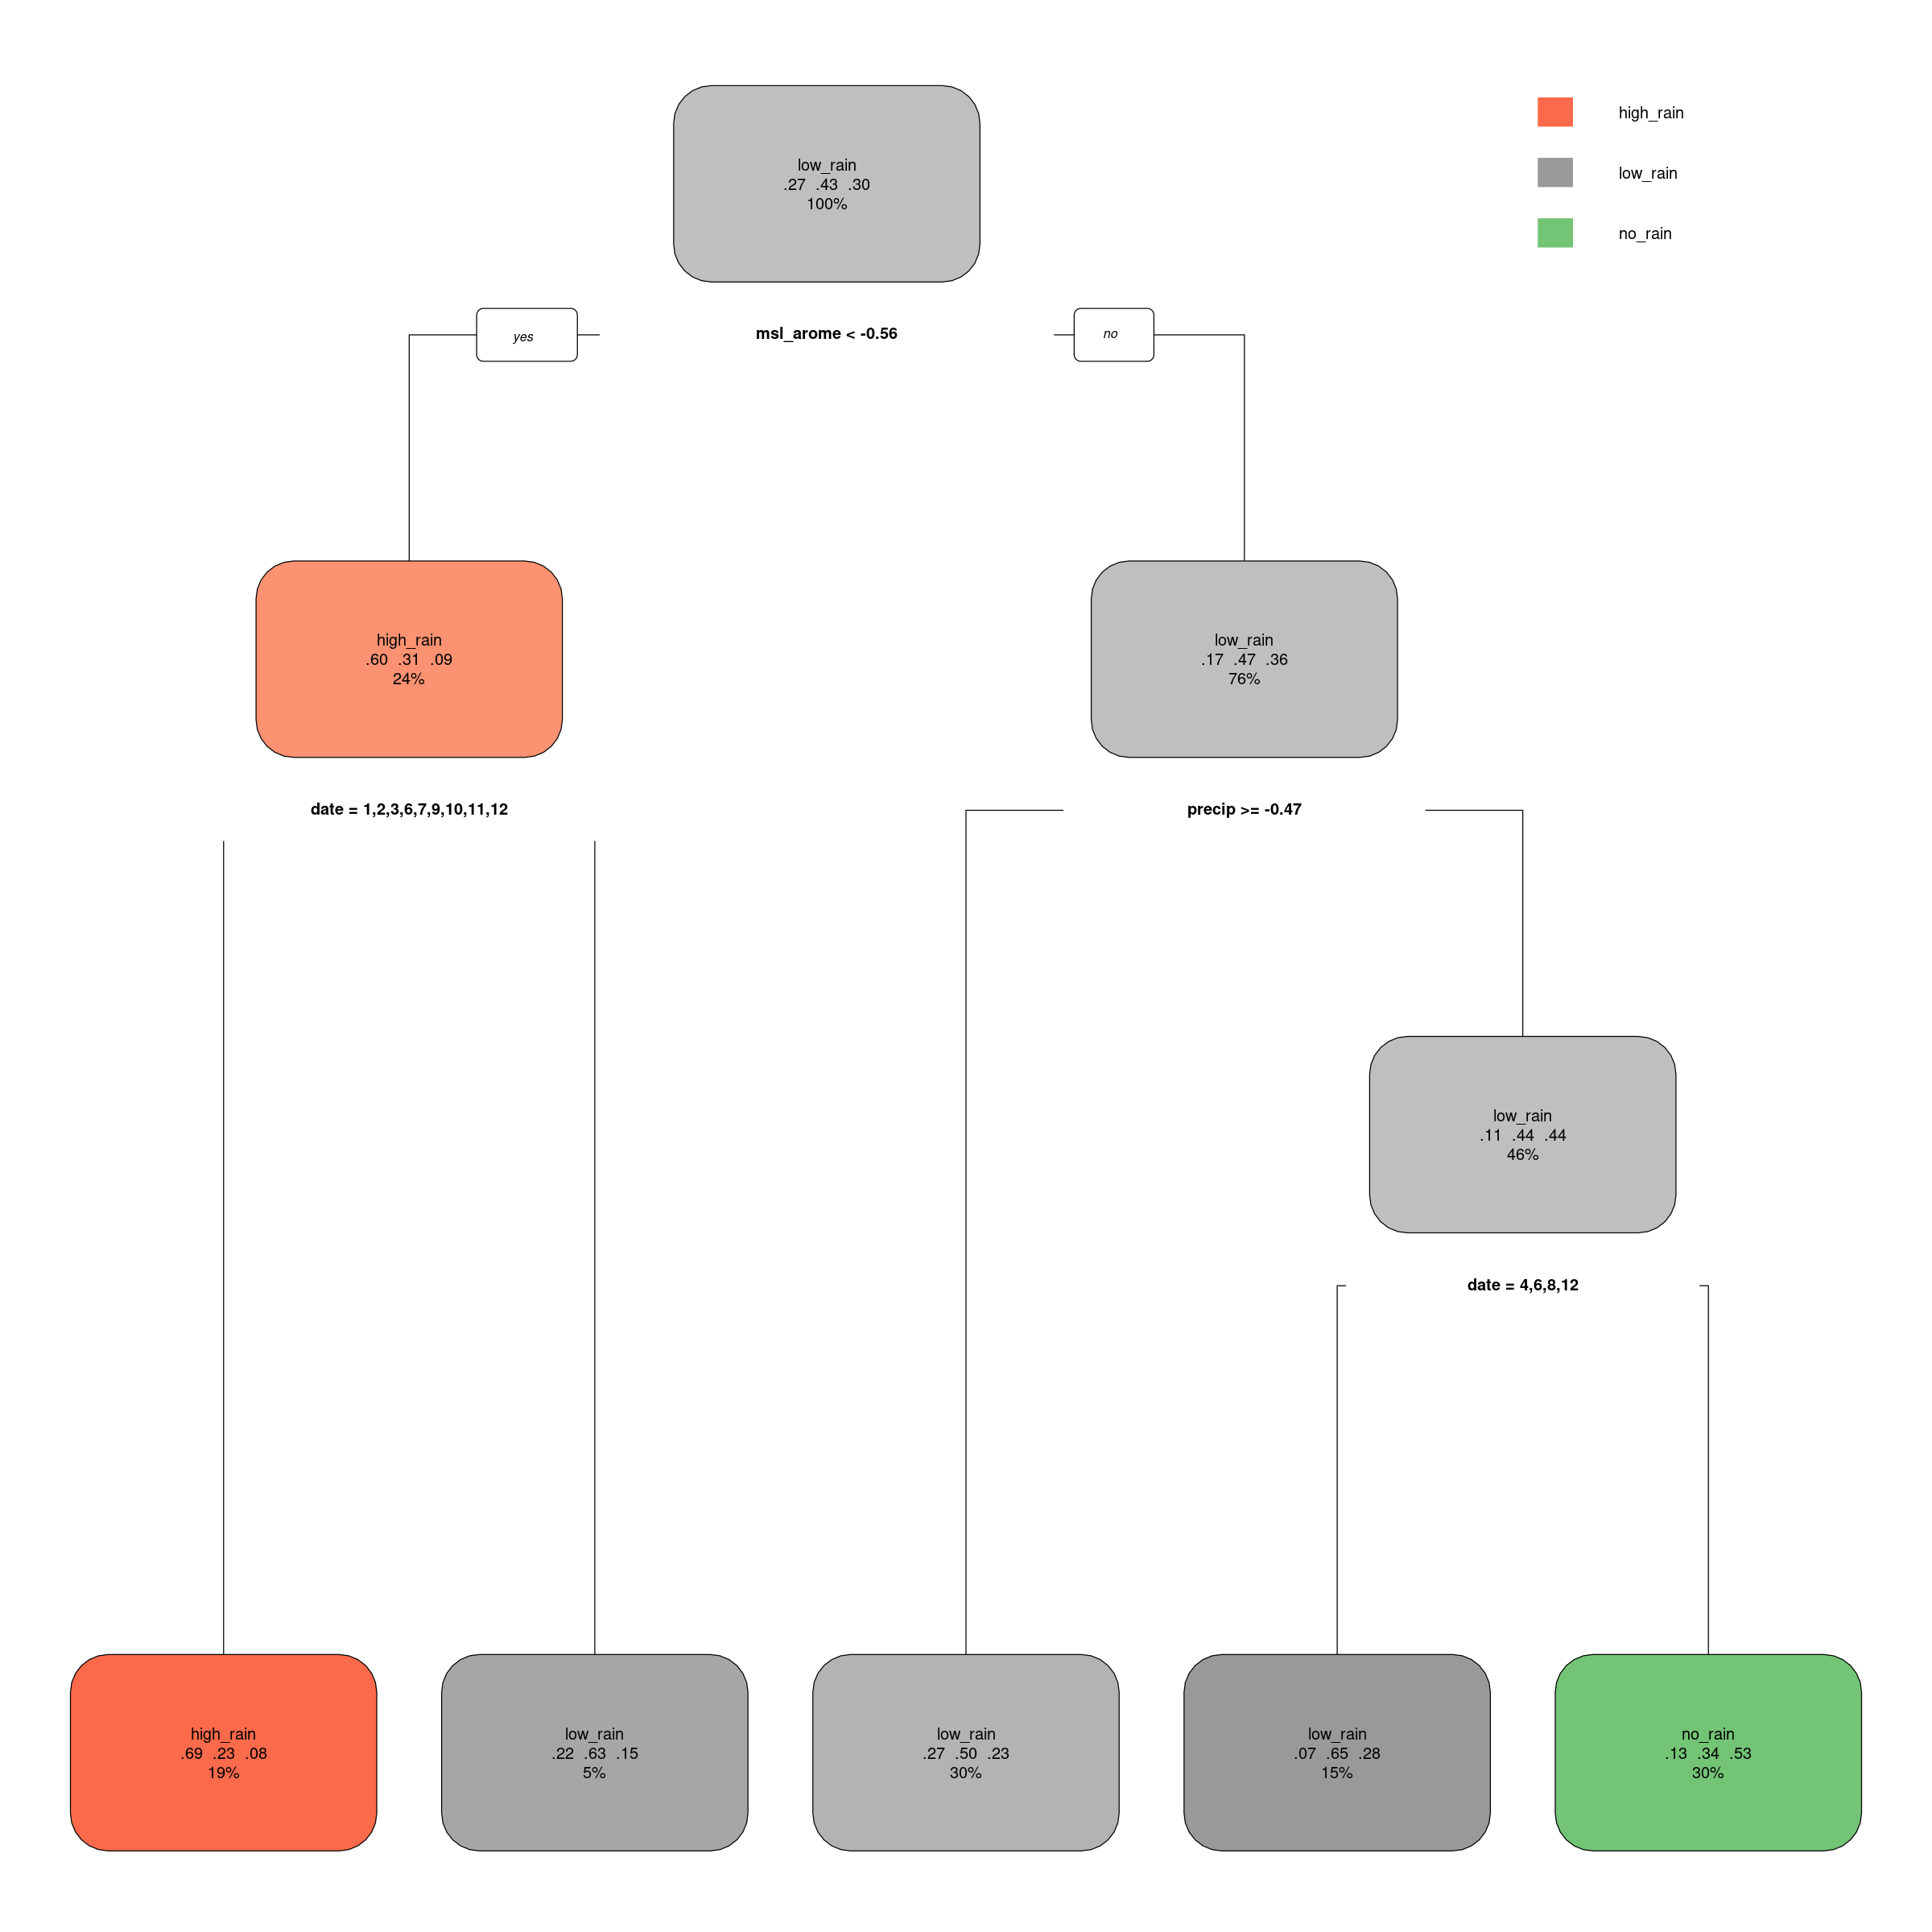

In [76]:
rpart.plot(tree.dis)

In [77]:
# Prédiction réalisée sur l'échantillon test
pred.tr=predict(tree.dis,newdata=datestq,type="class") 

In [78]:
#Erreur sur cette prédiction
errtree<-1-sum(pred.tr==datestq[,"rain_class"])/nrow(datestq)
errtree

[1] 0.4710145

In [79]:
# Table de contingence
table(pred.tr,datestq[,"rain_class"])

           
pred.tr     high_rain low_rain no_rain
  high_rain        16        2       1
  low_rain         17       34      21
  no_rain           4       20      23

# 4)  Forêt aléatoire

In [80]:
library(randomForest)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




mtry = 4  OOB error = 49.27% 
Searching left ...
mtry = 3 	OOB error = 49.09% 
0.003690037 0.002 
mtry = 2 	OOB error = 49.09% 
0 0.002 
Searching right ...
mtry = 6 	OOB error = 48.55% 
0.01111111 0.002 
mtry = 9 	OOB error = 48.18% 
0.007490637 0.002 
mtry = 13 	OOB error = 50.55% 
-0.0490566 0.002 


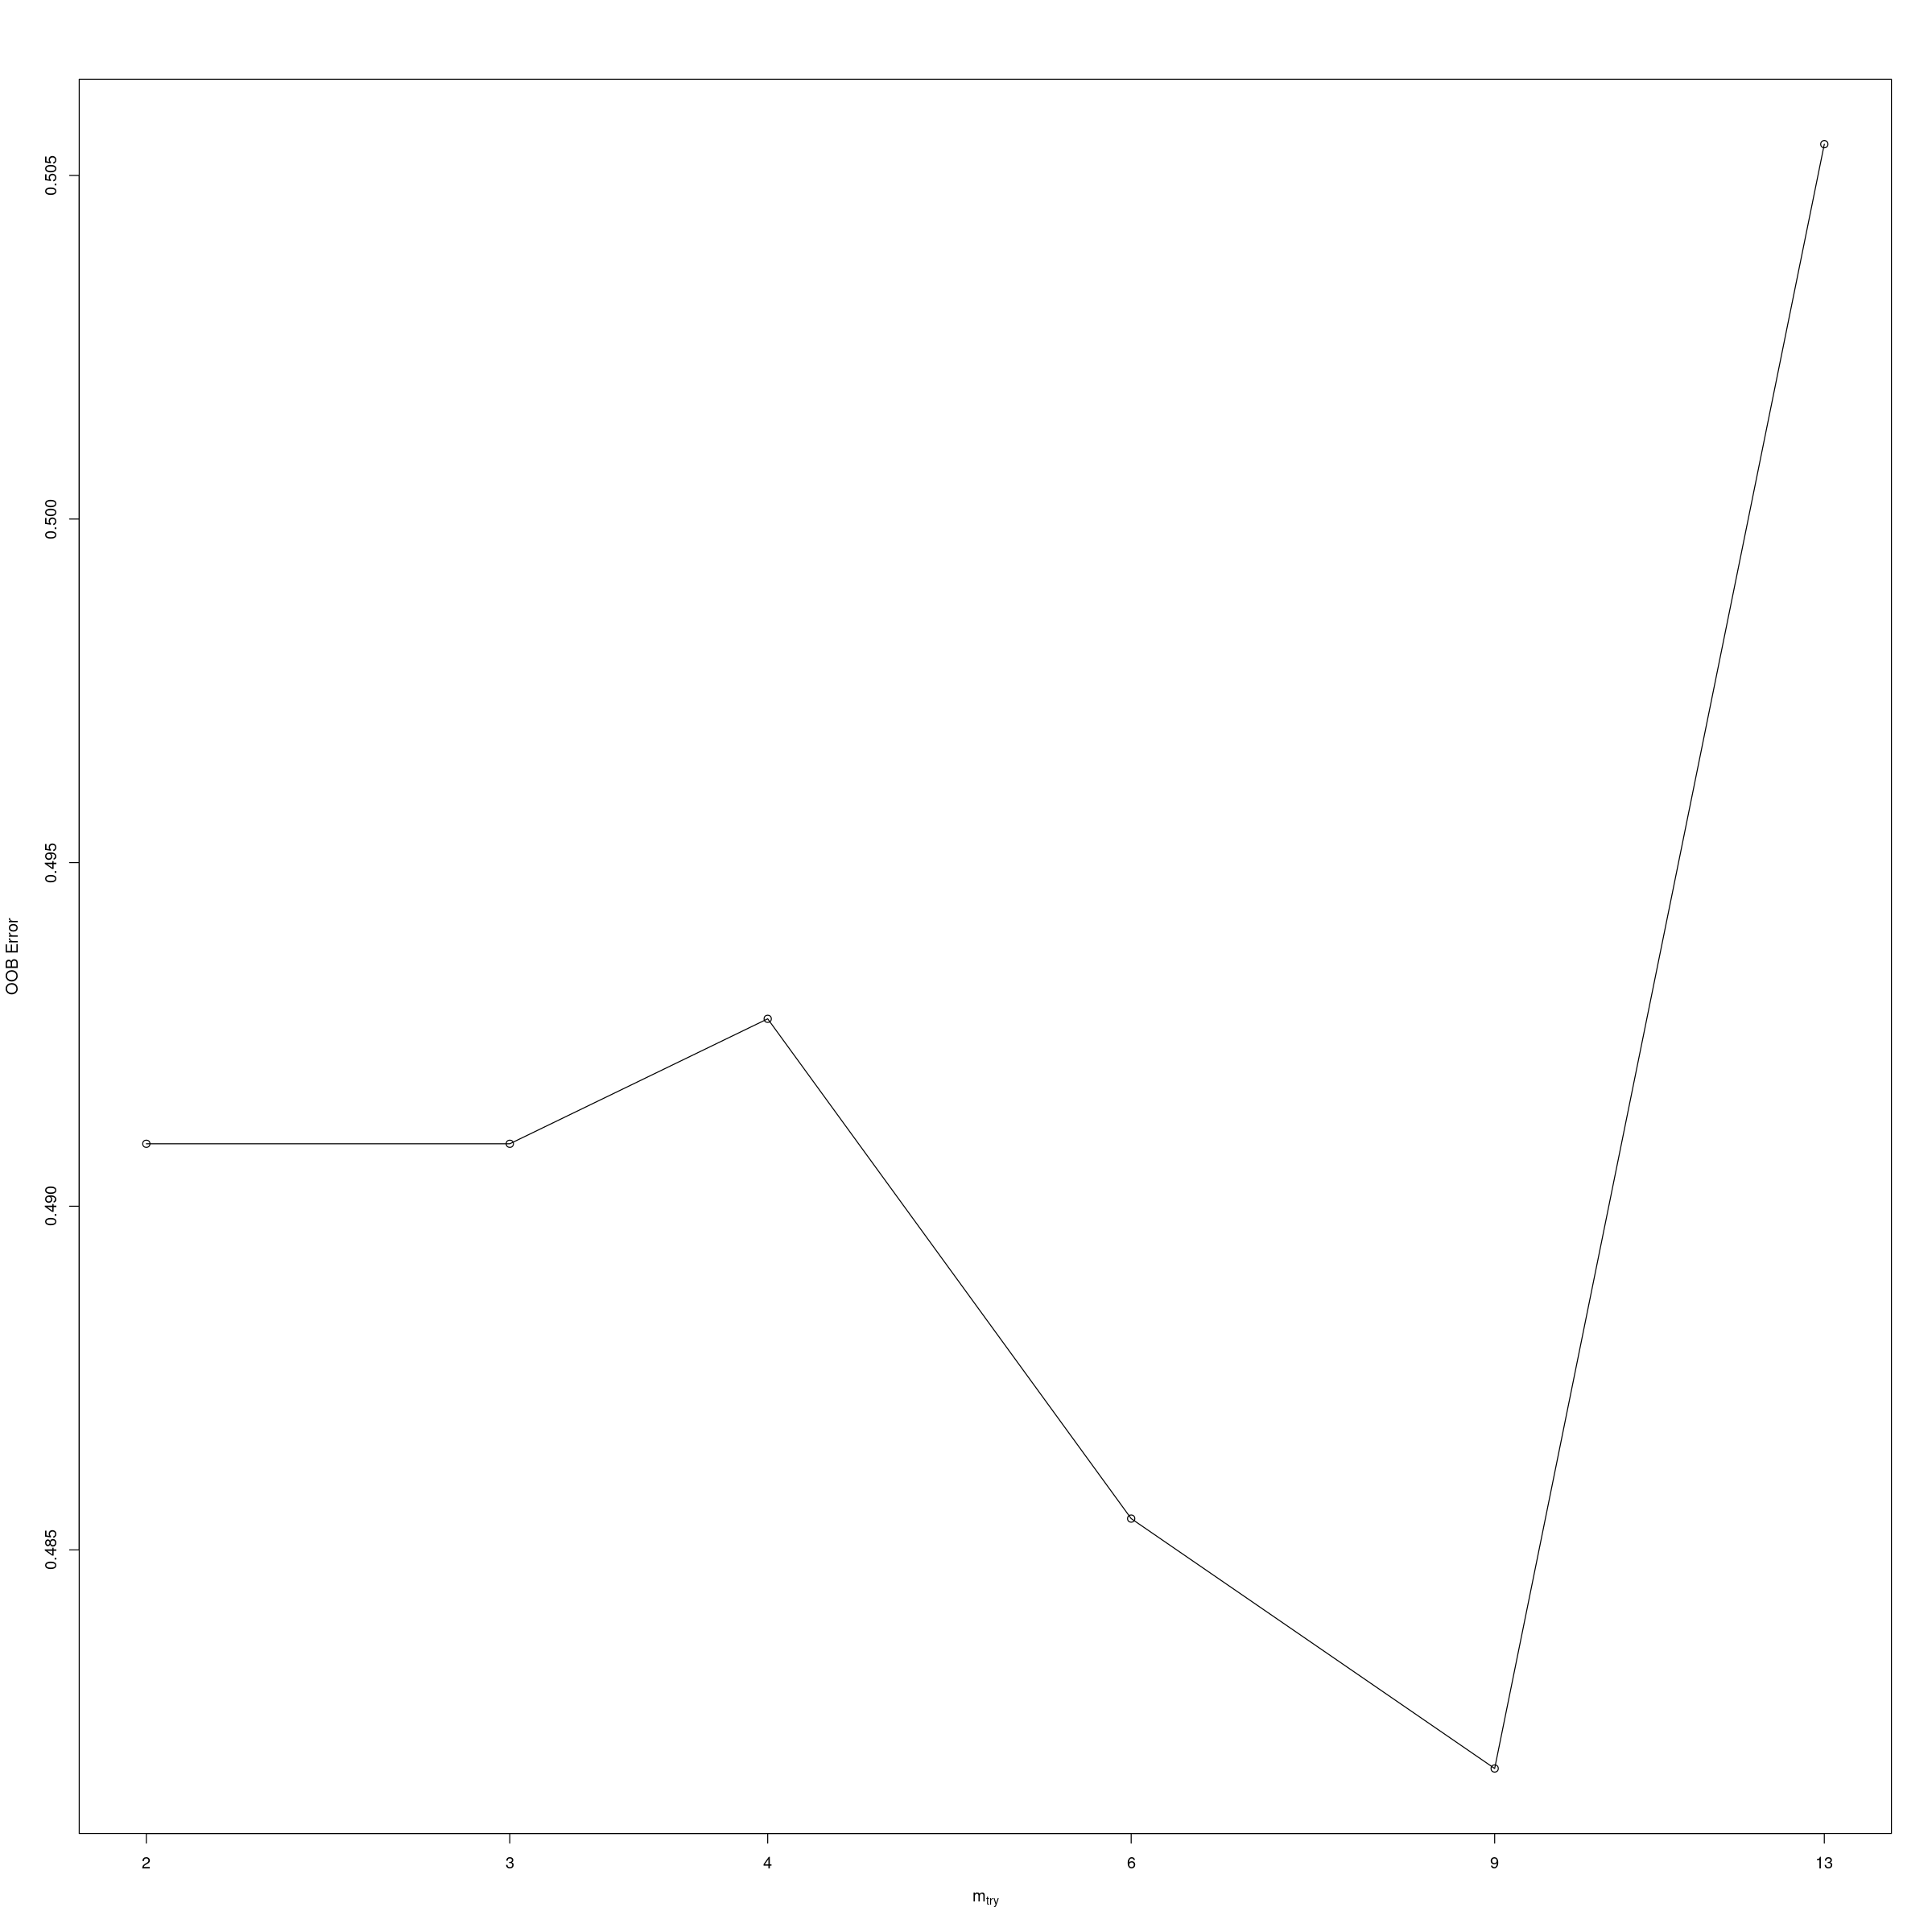

In [81]:
# Optimisation
set.seed(134)
foresti <- tuneRF(datappq[,-17], datappq$rain_class, stepFactor = 1.5, improve=0.002, ntree=500, trace = TRUE, plot = TRUE)


In [82]:
rf.dis=randomForest(rain_class~., data=datappq ,xtest=datestq[,-17],ytest=datestq[,"rain_class"],mtry=9,
   ntree=500,do.trace=50,importance=TRUE)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  51.82% 53.64% 38.98% 68.71%|  36.96% 37.84% 23.21% 53.33%
  100:  49.82% 53.64% 36.86% 65.03%|  41.30% 37.84% 28.57% 60.00%
  150:  48.73% 51.66% 35.17% 65.64%|  39.86% 37.84% 26.79% 57.78%
  200:  49.27% 54.30% 35.59% 64.42%|  39.86% 37.84% 25.00% 60.00%
  250:  49.64% 53.64% 36.02% 65.64%|  41.30% 40.54% 26.79% 60.00%
  300:  48.55% 53.64% 34.32% 64.42%|  40.58% 40.54% 25.00% 60.00%
  350:  48.91% 52.98% 35.59% 64.42%|  42.03% 40.54% 28.57% 60.00%
  400:  48.55% 54.30% 34.32% 63.80%|  41.30% 40.54% 26.79% 60.00%
  450:  48.36% 52.98% 35.17% 63.19%|  42.03% 40.54% 28.57% 60.00%
  500:  48.55% 52.98% 35.17% 63.80%|  41.30% 40.54% 26.79% 60.00%


In [83]:
# Prédiction réalisée sur l'échantillon test
pred <-rf.dis$test$predicted

In [84]:
#Erreur sur cette prédiction
errRf<-1-sum((pred==datestq[,"rain_class"]))/nrow(datestq) # risque empirique associée à la 0-1 los
errRf

[1] 0.4130435

In [85]:
# Table de contingence
table(pred, datestq[,"rain_class"])

           
pred        high_rain low_rain no_rain
  high_rain        22        5       1
  low_rain         12       41      26
  no_rain           3       10      18

# 5)Réseau de neuronnes: 

In [86]:
library(MASS)
library(nnet)


In [87]:
# à l'aide de tune.nnet, on determine les meilleurs paramètres
#tuned<-tune.nnet(rain_class~.,data=datappq,size=c(4,5,6,7,8),decay=c(0.01,0.015,0.02),maxit=200,linout=FALSE)

In [88]:
#tuned$best.parameters
#size=4, decay = 0.02

In [89]:
# apprentissage
nnet.dis=nnet(rain_class~.,data=datappq,size=4,decay=0.02) 
summary(nnet.dis)

# weights:  123
initial  value 806.411083 
iter  10 value 506.465794
iter  20 value 468.867792
iter  30 value 443.967147
iter  40 value 434.857008
iter  50 value 429.037674
iter  60 value 426.326973
iter  70 value 425.230901
iter  80 value 424.627234
iter  90 value 424.153761
iter 100 value 424.021022
final  value 424.021022 
stopped after 100 iterations


a 26-4-3 network with 123 weights
options were - softmax modelling  decay=0.02
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.81    0.35   -1.60    1.27    3.52    3.13    2.17    3.06    0.91    1.21 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.35    2.65    1.54    3.92    1.16    1.24    2.93   -0.65    0.20   -7.00 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
  -0.75    0.06   -0.10   -4.02    0.48    0.00    1.40 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -1.31    1.01   -4.34   -3.52   -0.05    4.35    0.51    3.94    0.42    0.70 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -1.61    5.94    2.28    1.04    0.99    0.62    1.46   -0.51   -2.62   -6.39 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
  -0.35    2.91   -1.77   -0.02    1.57   -1.81   -1.15 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->

In [90]:
# Prédiction réalisée sur l'échantillon test
pred.nnetq=predict(nnet.dis,newdata=datestq) 


In [91]:
length(pred.nnetq)
length(datestq[,"rain_class"])

[1] 414

[1] 138

In [92]:
pred.nnetq <- as.data.frame(pred.nnetq)
pred.nnetq[,4] <- c(0)
pred.nnetq

,high_rain,low_rain,no_rain,V4
,<dbl>,<dbl>,<dbl>,<dbl>
22092001_700,3.082047e-05,0.57234017,0.427629009,0
22092001_479,7.308726e-05,0.15049141,0.849435504,0
22092001_507,6.748821e-05,0.29862972,0.701302793,0
22092001_160,6.743347e-02,0.68456479,0.248001743,0
22092001_204,1.198696e-01,0.20492010,0.675210284,0
22092001_349,2.691477e-01,0.62171699,0.109135286,0
22092001_273,8.702836e-01,0.10366292,0.026053442,0
22092001_433,1.544610e-01,0.60631727,0.239221733,0
22092001_541,5.424511e-01,0.33851479,0.119034146,0


In [93]:
# Matrice de confusion 
#fonction qui reclasse les prédictions: 
for (i in 1:nrow(pred.nnetq)) {
    max <- pred.nnetq[i,1]
    indmax <- 1
    for (j in 2:3) {
       if(pred.nnetq[i,j] >= max){
           max <- pred.nnetq[i,j]
           indmax <- j
       } 
    }
    
    if (indmax==1) {
        pred.nnetq[i,4]<-"high_rain"
    }
    else if (indmax==2) {
        pred.nnetq[i,4]<-"low_rain"
    }
    else {
        pred.nnetq[i,4]<-"no_rain"
    }
}

pred.nnetq

,high_rain,low_rain,no_rain,V4
,<dbl>,<dbl>,<dbl>,<chr>
22092001_700,3.082047e-05,0.57234017,0.427629009,low_rain
22092001_479,7.308726e-05,0.15049141,0.849435504,no_rain
22092001_507,6.748821e-05,0.29862972,0.701302793,no_rain
22092001_160,6.743347e-02,0.68456479,0.248001743,low_rain
22092001_204,1.198696e-01,0.20492010,0.675210284,no_rain
22092001_349,2.691477e-01,0.62171699,0.109135286,low_rain
22092001_273,8.702836e-01,0.10366292,0.026053442,high_rain
22092001_433,1.544610e-01,0.60631727,0.239221733,low_rain
22092001_541,5.424511e-01,0.33851479,0.119034146,high_rain


In [94]:
table( pred.nnetq[,4], datestq[,"rain_class"])

           
            high_rain low_rain no_rain
  high_rain        23        8       7
  low_rain          8       34      19
  no_rain           6       14      19

In [95]:
paste("taux d erreur en classification : ", 1-mean(pred.nnetq[,4]==datestq[,"rain_class"]))

[1] "taux d erreur en classification :  0.449275362318841"

In [96]:
errNET <-  1-mean(pred.nnetq[,4]==datestq[,"rain_class"])

# Comparaisn des méthodes de classification.

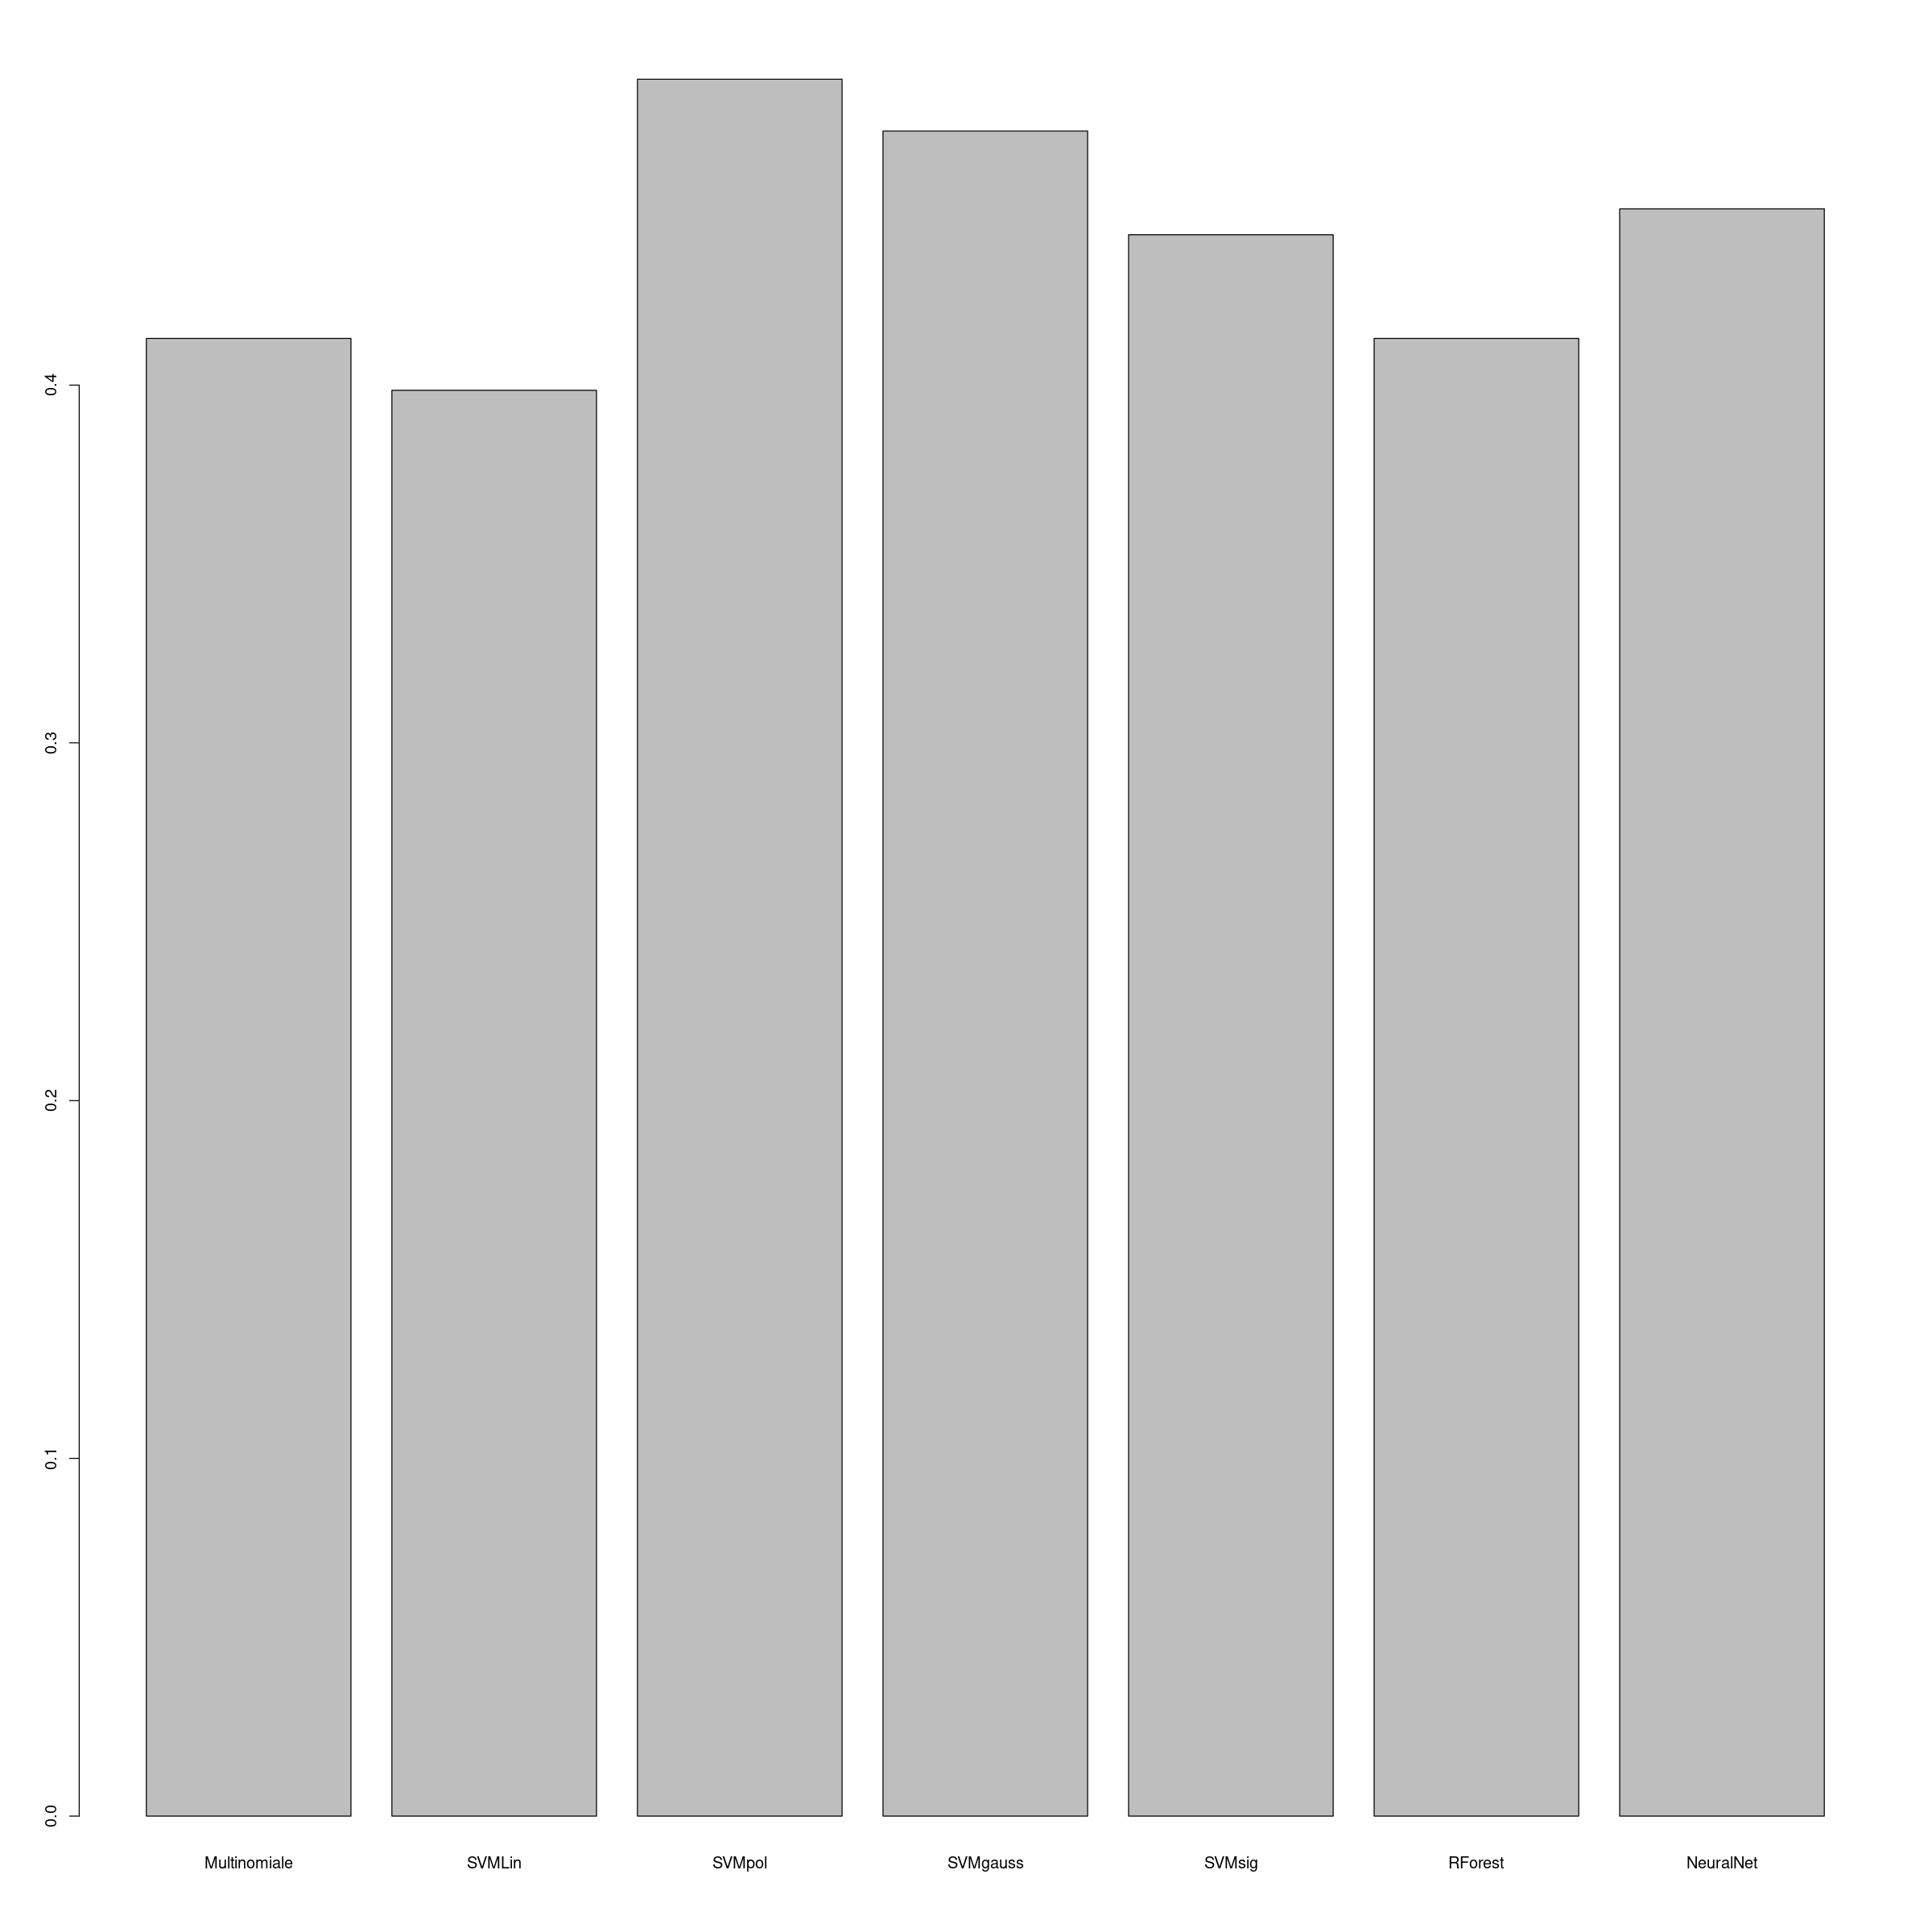

In [97]:
errors<-c(errmulti,errSvmLi,errSvmPoly,errSvmG,errSvmSig,errRf,errNET)
index<-c("Multinomiale","SVMLin","SVMpol","SVMgauss","SVMsig","RForest","NeuralNet")


barplot(errors,names.arg=index) 

# II - Régression sur la variable $rain$

# 1) Regression linéaire

### *sans pénalisation*

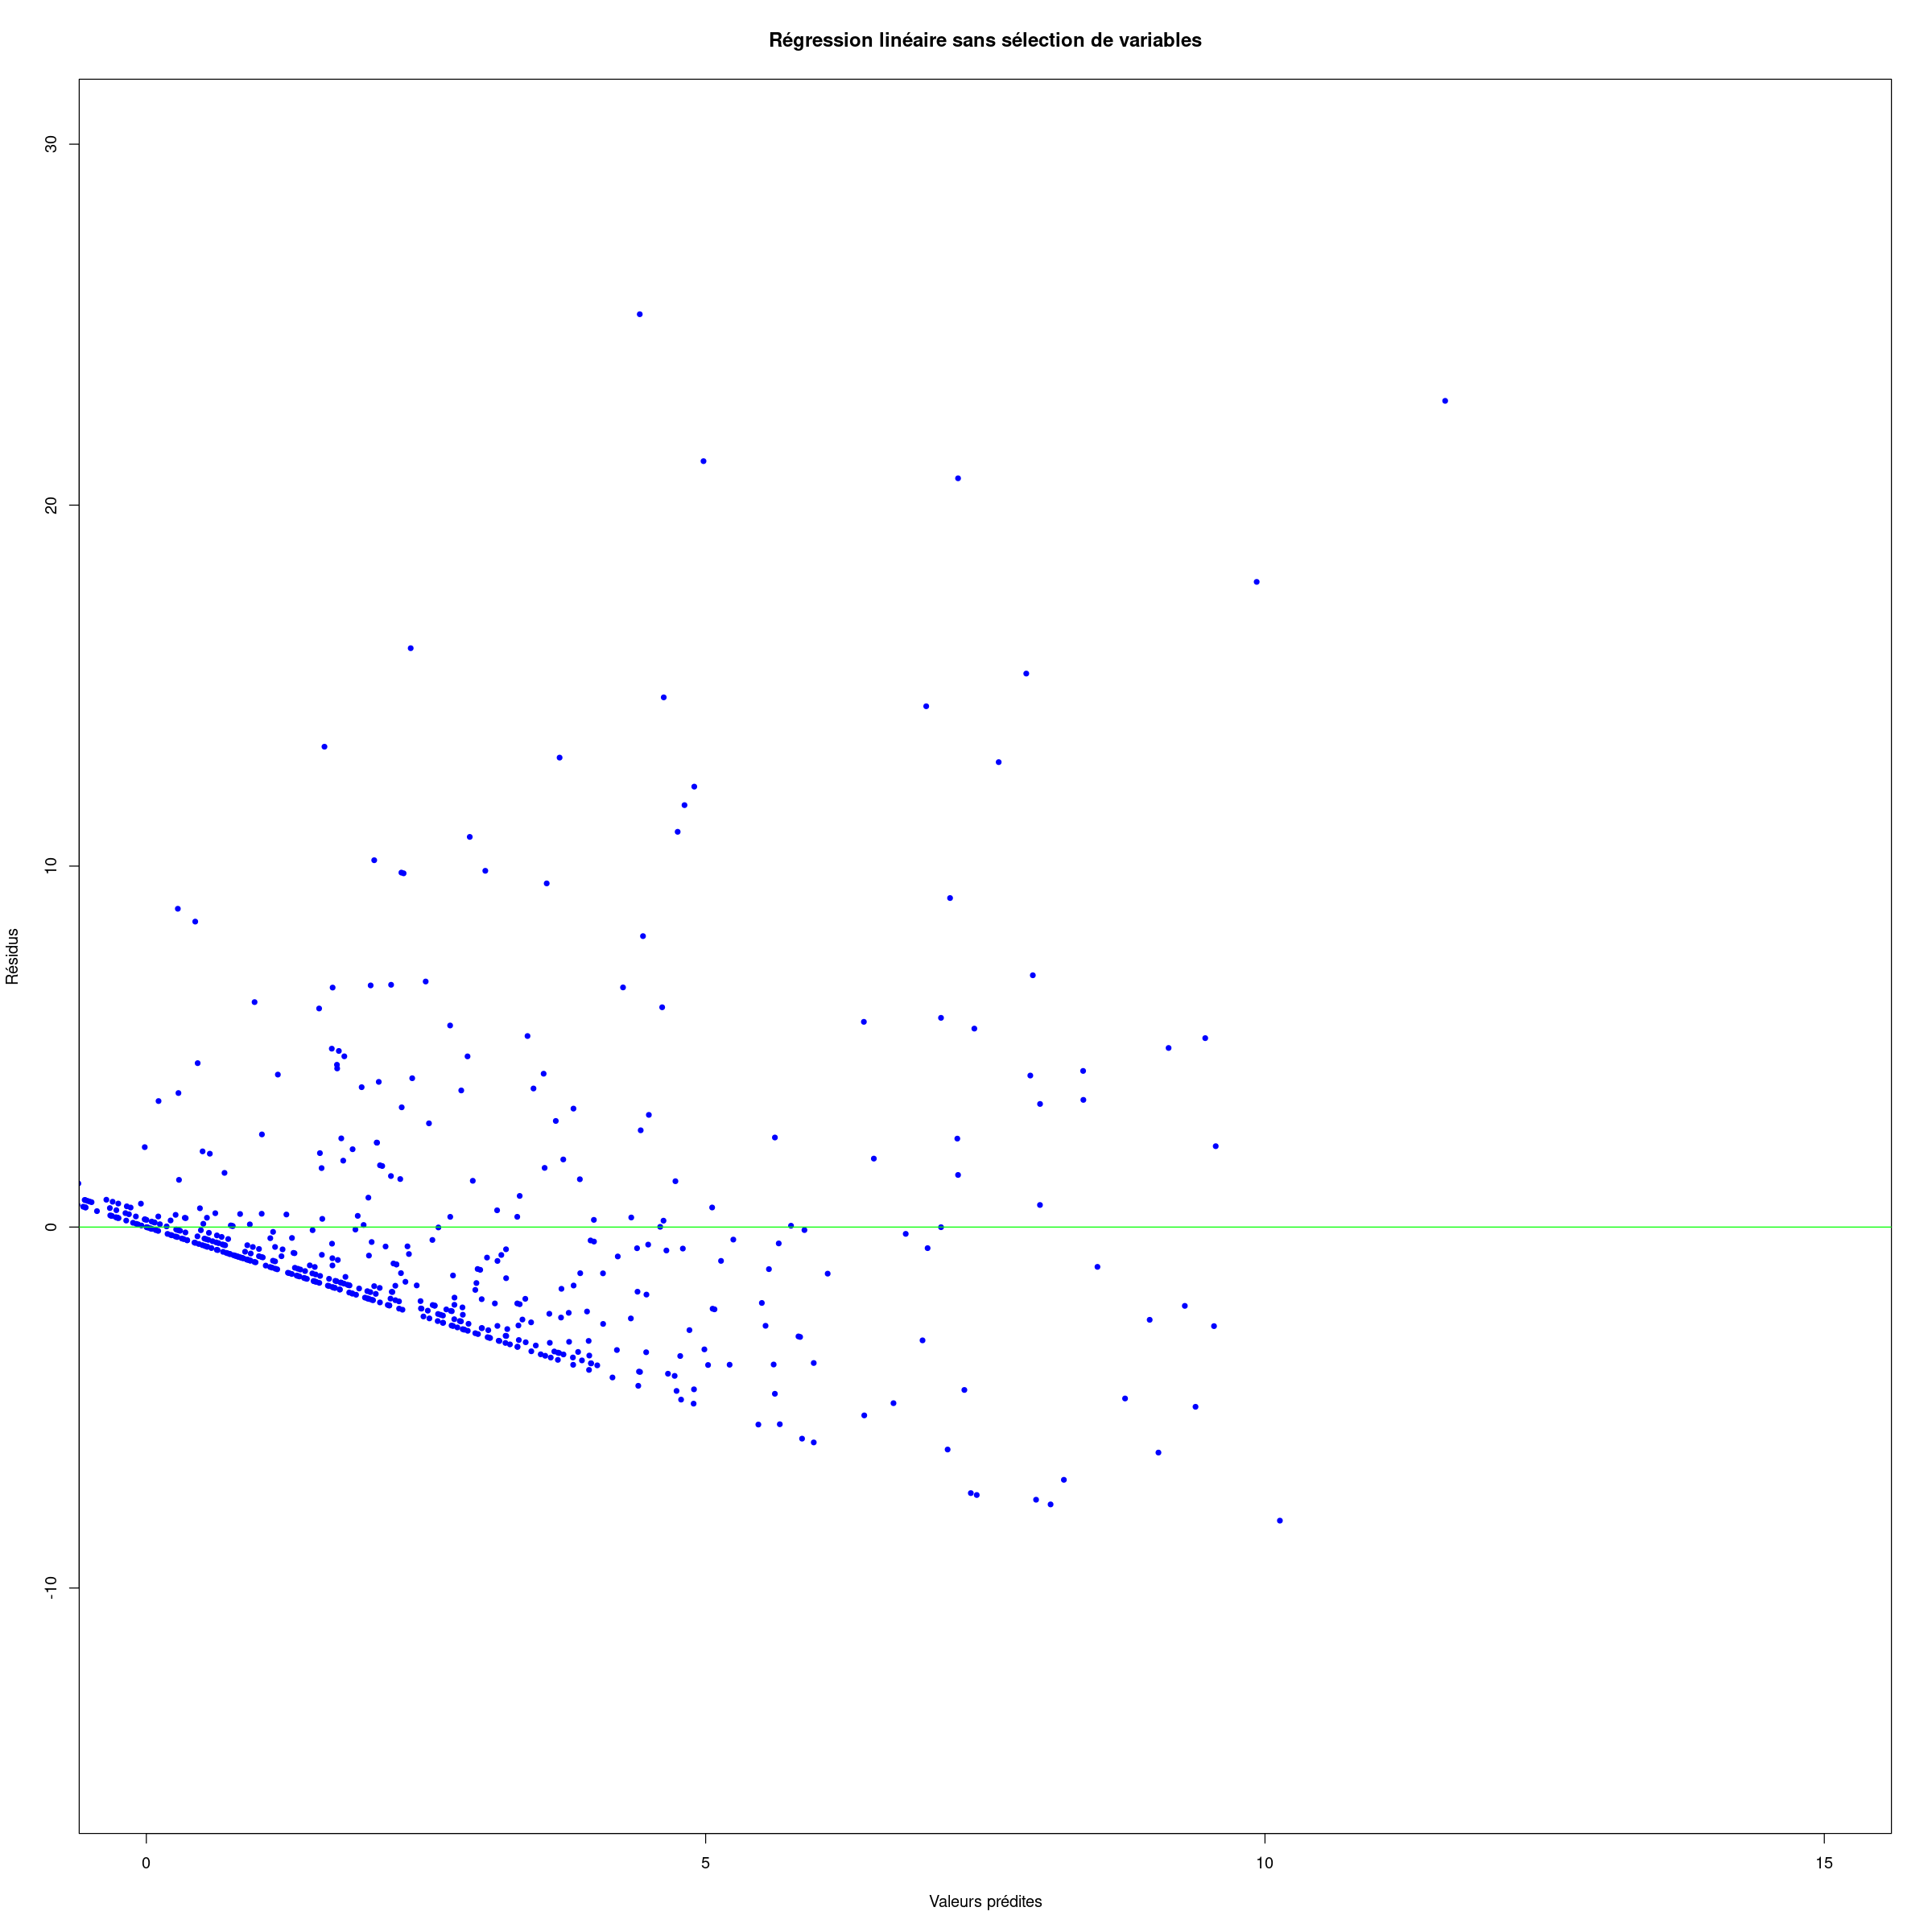

In [98]:
# estimation du modèle sans interaction
reg.lm <- aov(rain ~ . , data = datappr)

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus. 
plot.res(fit.lm,res.lm,"Régression linéaire sans sélection de variables")

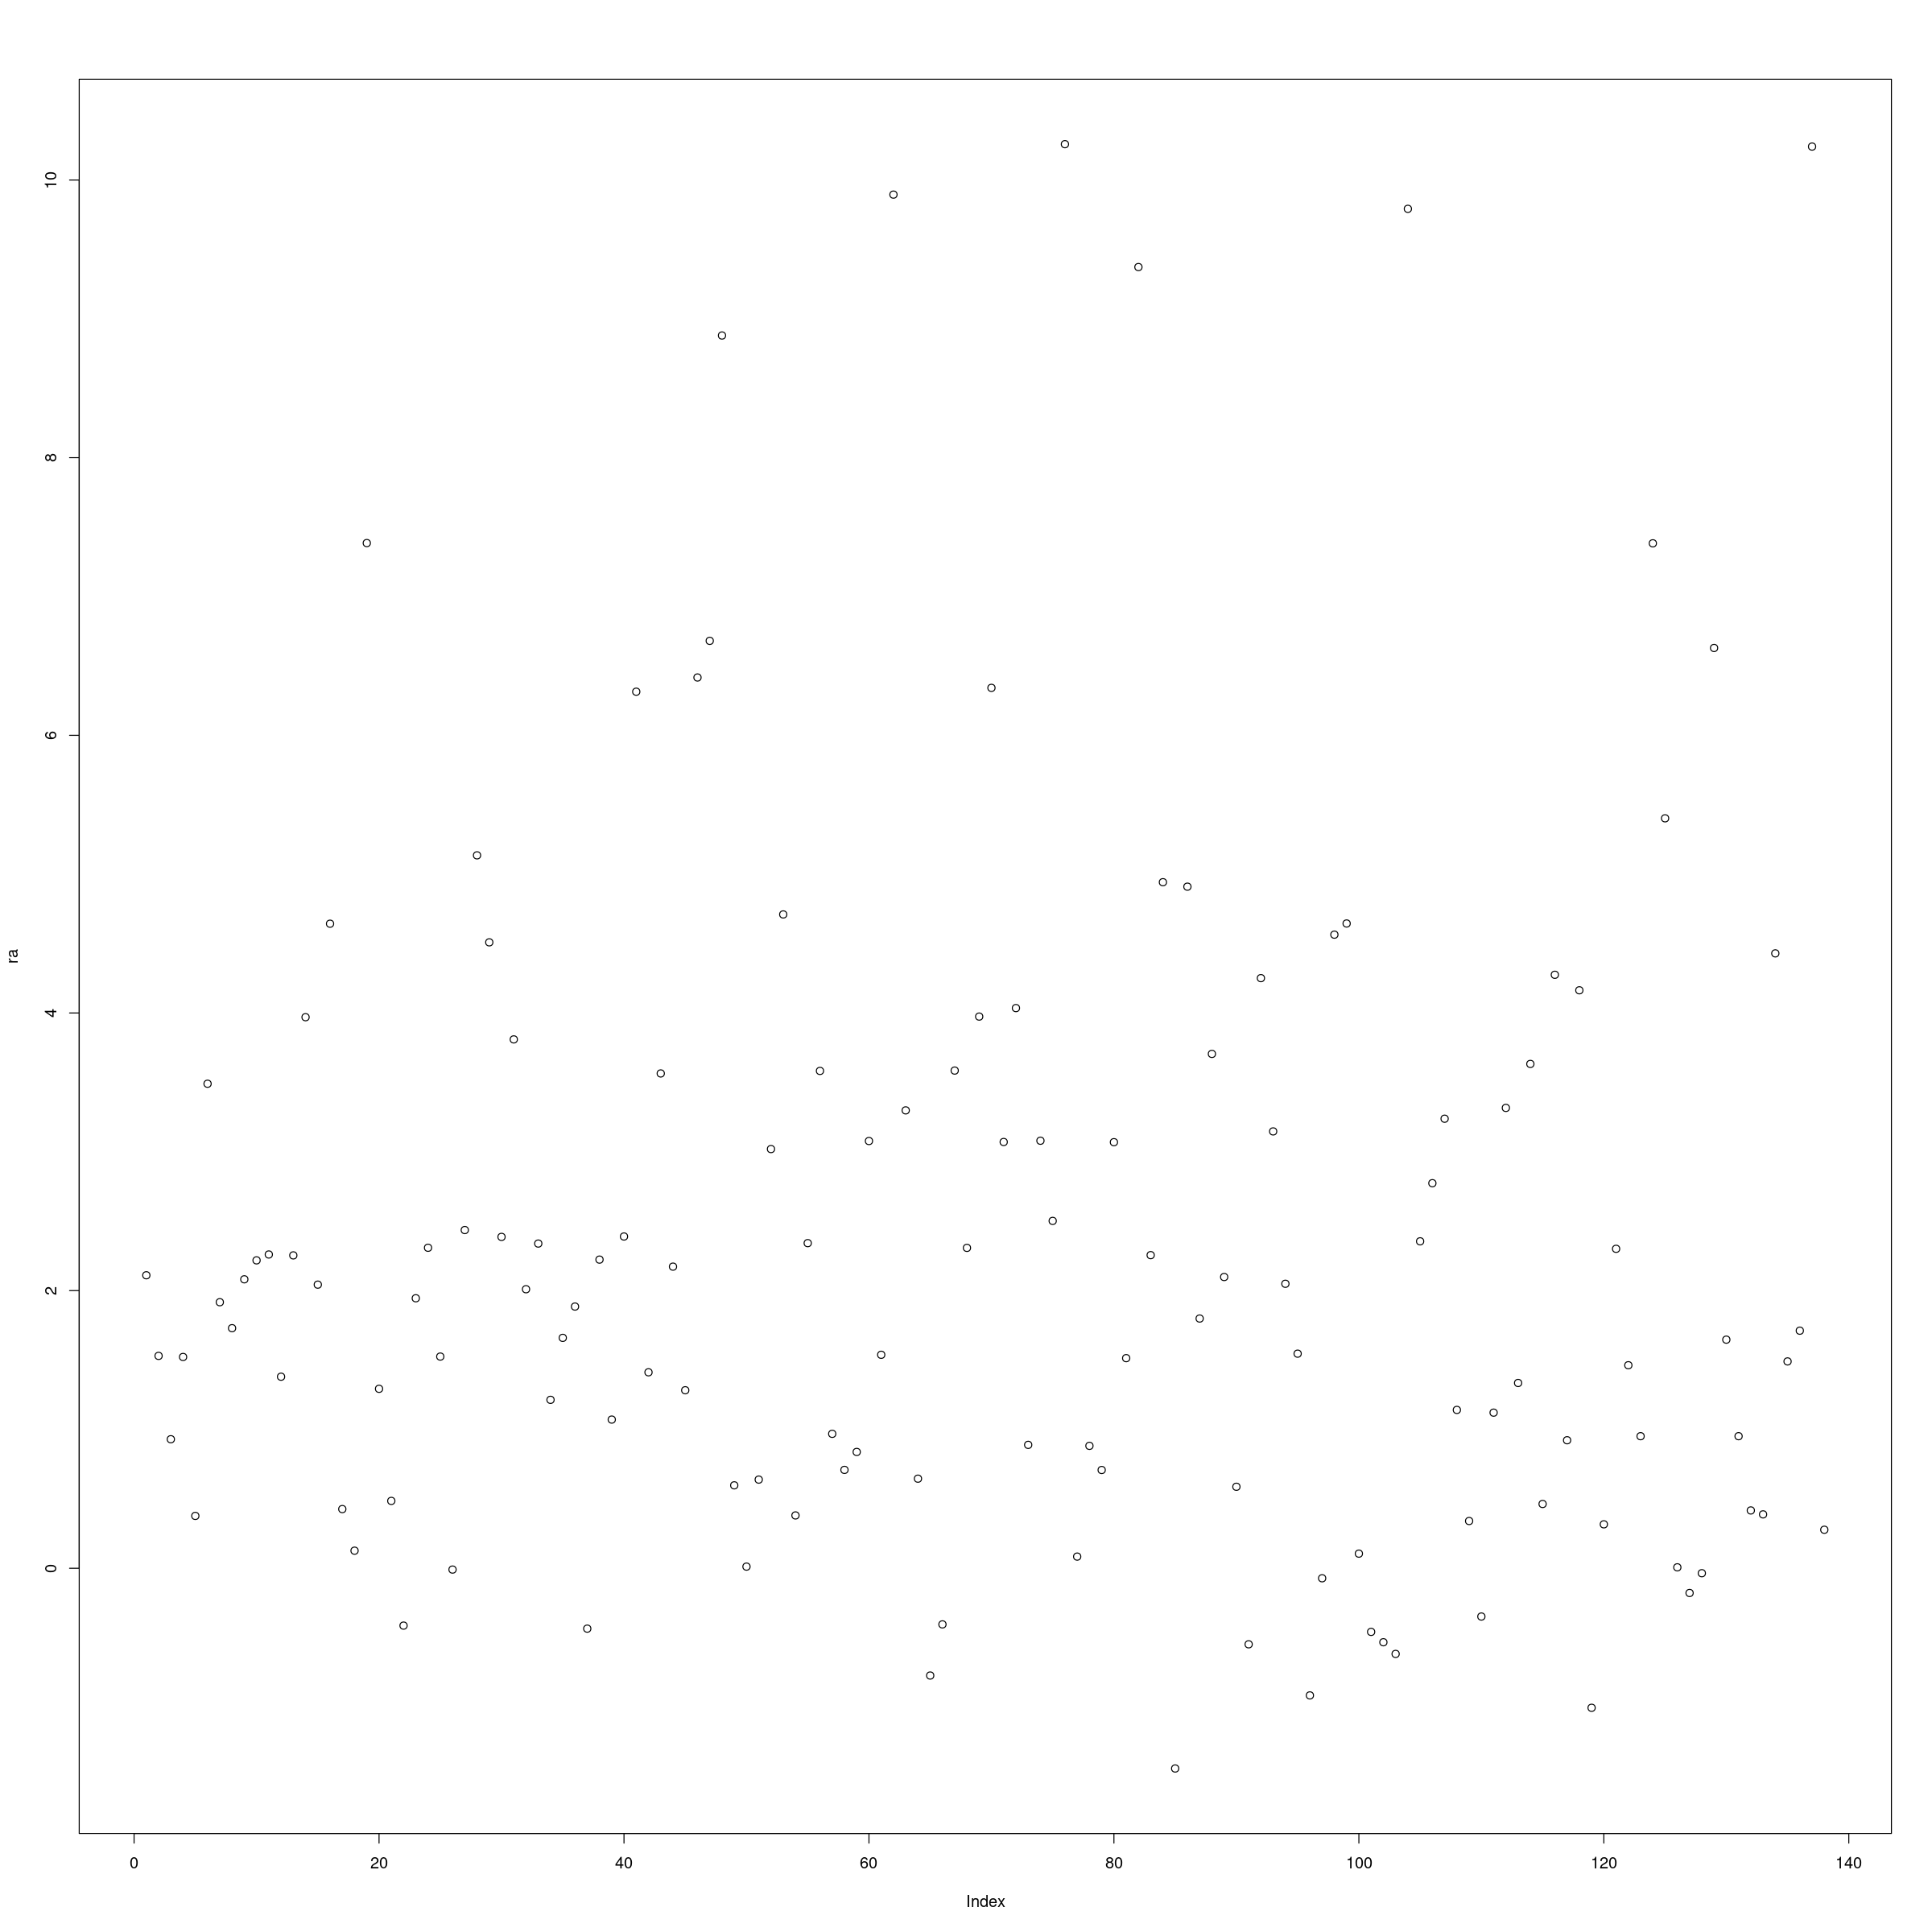

In [99]:
ypred<-predict(reg.lm,datestr)
ra=datestr$popularity
plot(ypred,ra, )

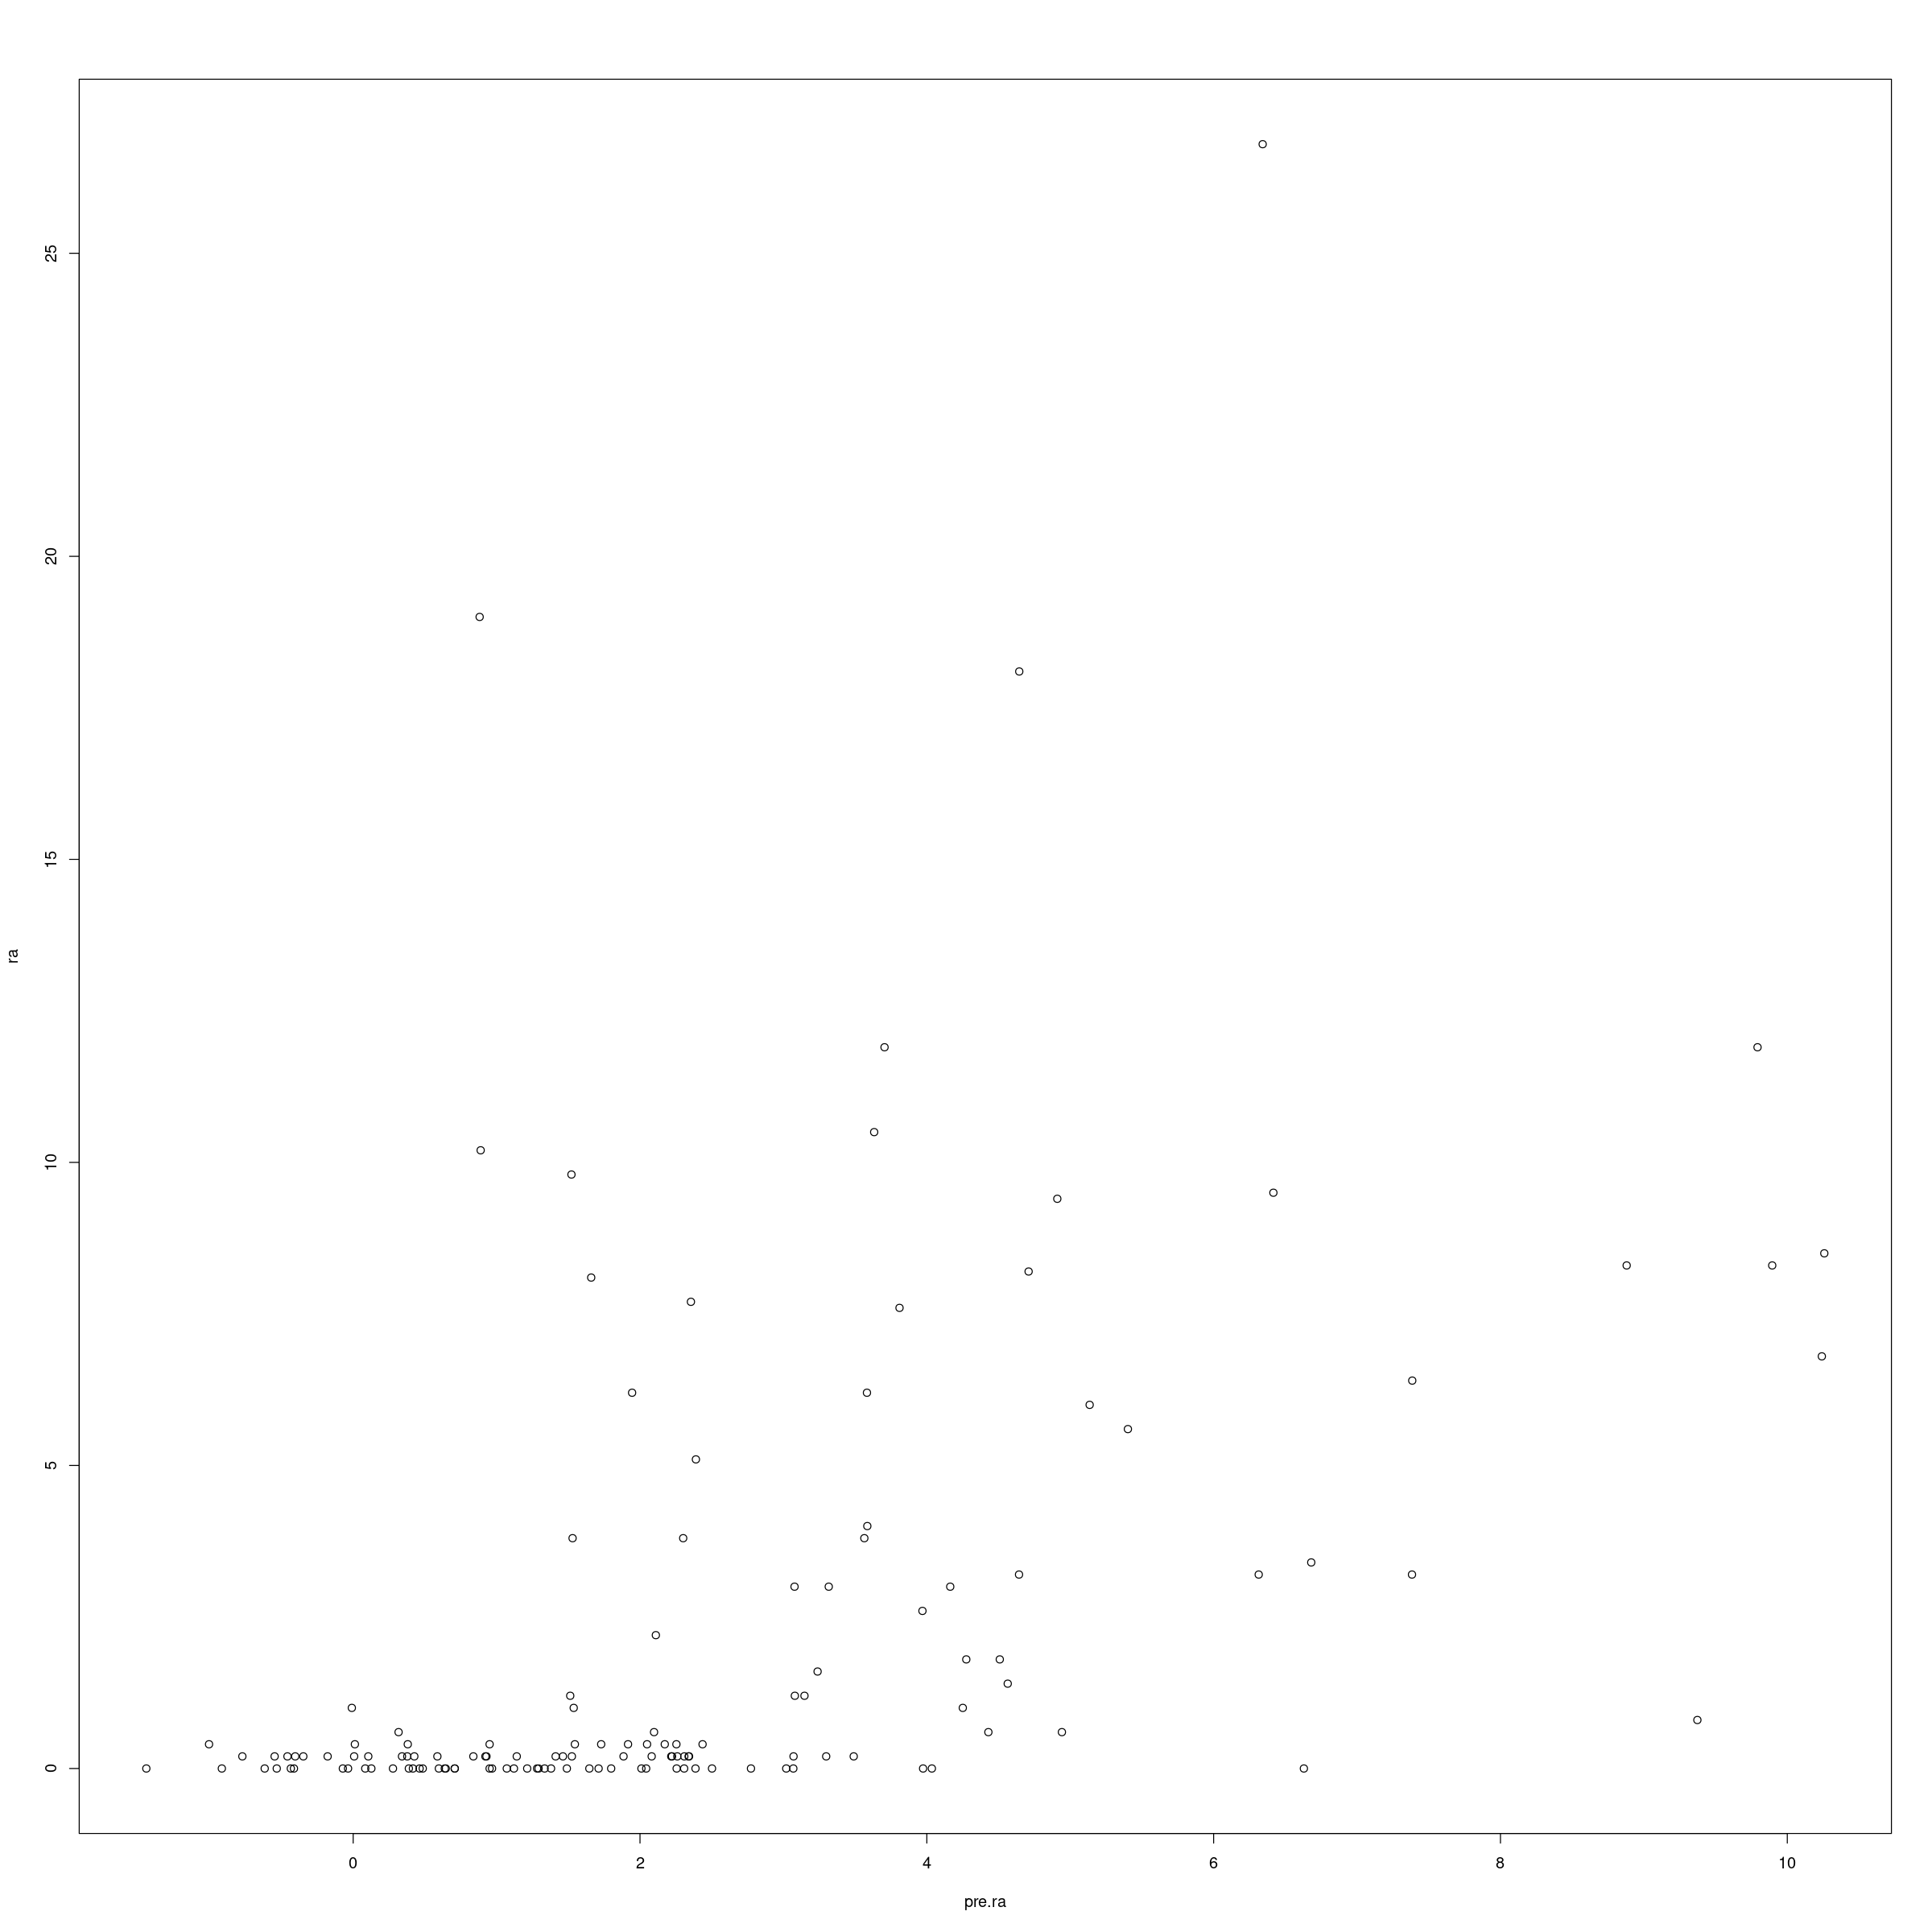

In [100]:
#Graphe prediction/réalité dans l'echantillon test
ra <- datestr$rain
pre.ra<- predict(reg.lm,datestr)
plot(pre.ra, ra)

In [101]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
date         11    824    74.9   4.351 3.00e-06 ***
ff            1    527   527.1  30.625 4.96e-08 ***
t             1      3     3.3   0.190 0.663394    
td            1     31    31.1   1.807 0.179431    
hu            1      2     1.9   0.108 0.742231    
dd            1     46    45.8   2.661 0.103447    
precip        1    377   377.4  21.924 3.62e-06 ***
ws_arome      1    308   307.5  17.867 2.80e-05 ***
p3031_arome   1     43    43.4   2.523 0.112806    
u10_arome     1    189   188.6  10.959 0.000996 ***
v10_arome     1    124   123.8   7.192 0.007556 ** 
t2m_arome     1     48    48.4   2.812 0.094130 .  
d2m_arome     1     11    11.5   0.667 0.414379    
r_arome       1     52    51.8   3.010 0.083355 .  
tp_arome      1      0     0.2   0.014 0.905886    
msl_arome     1    472   472.3  27.438 2.36e-07 ***
Residuals   523   9002    17.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

### *rég linéaire avec pénalisation*

- **Lasso**

In [102]:
library(glmnet)

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-3



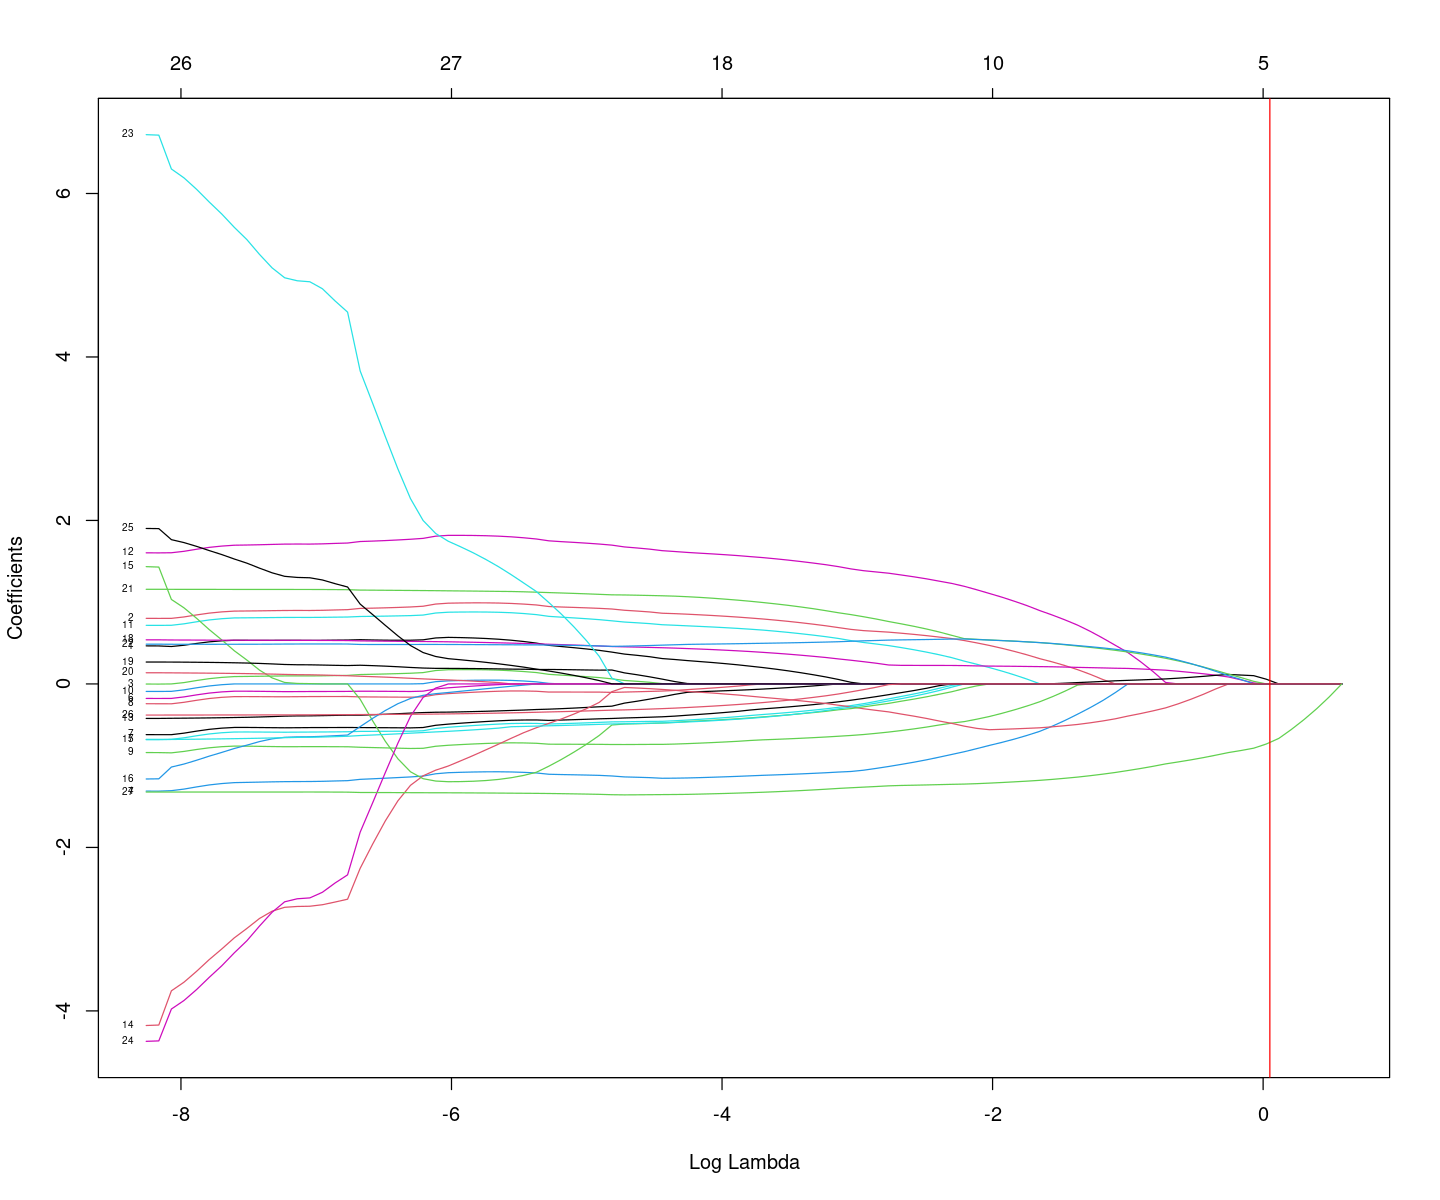

In [103]:
set.seed(123)
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(rain ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$rain, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
abline(v = log(1.051), col = "red")

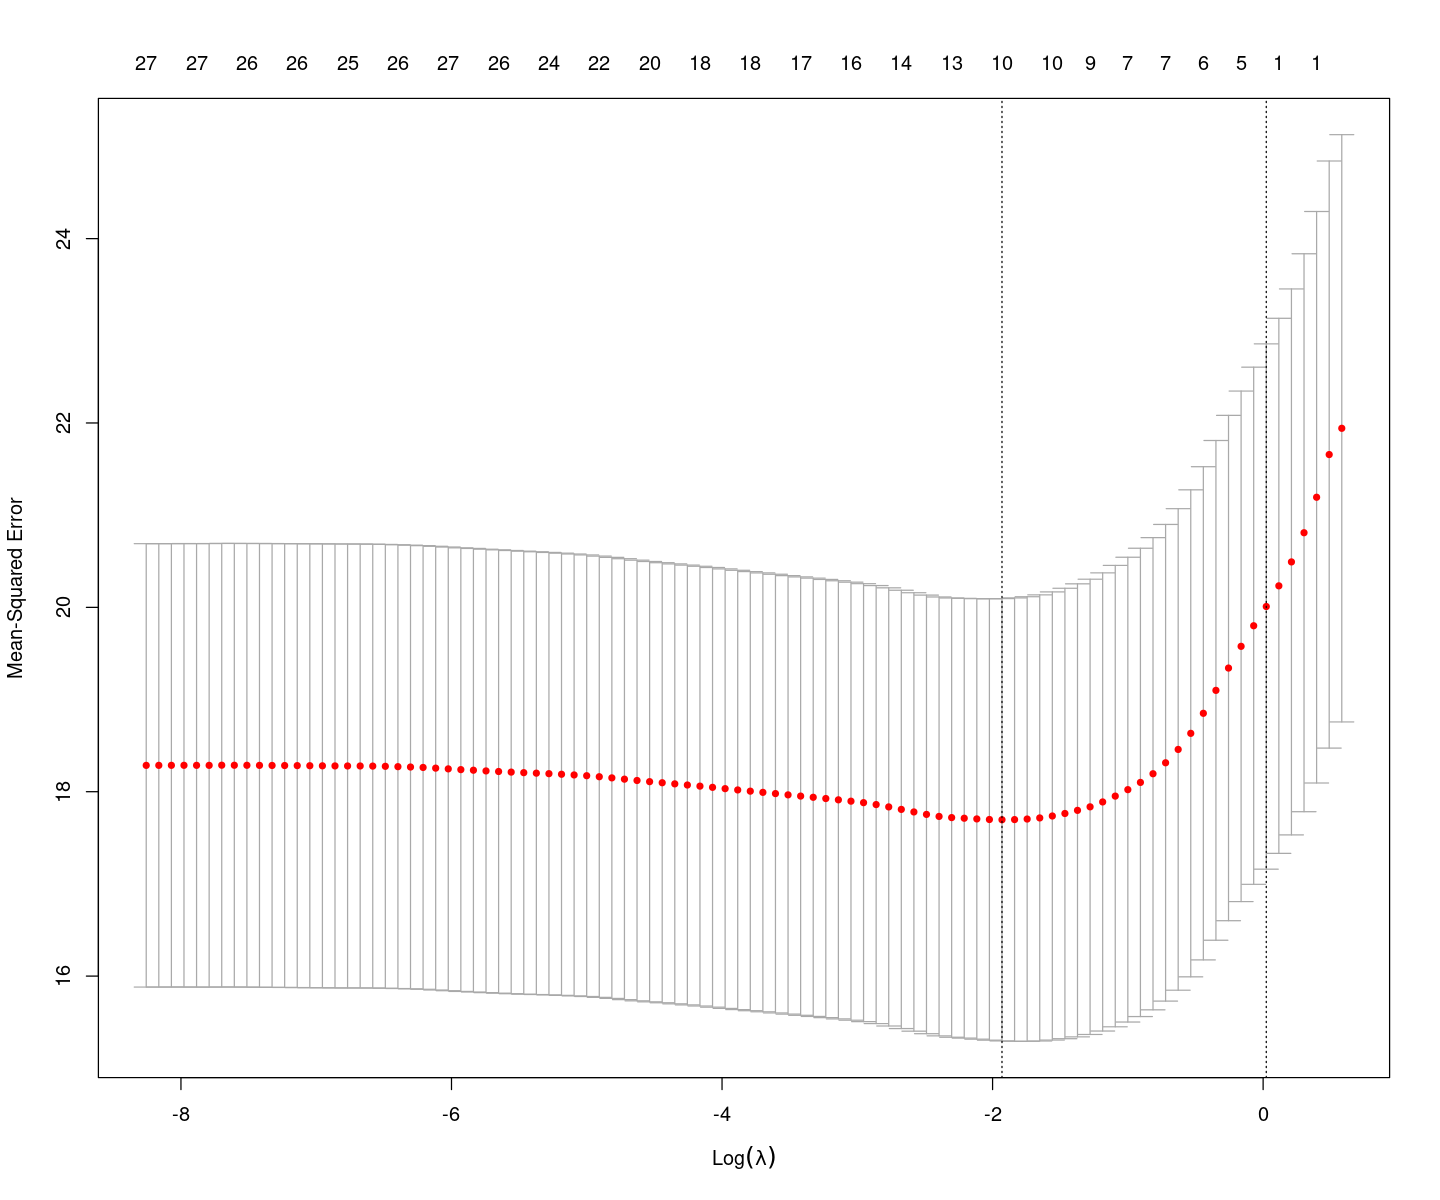

In [104]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, "rain"], x = x.mat)
plot(reg.lasso.cv)

In [105]:
reg.lasso.cv$lambda.min
reg.lasso.cv$lambda.1se

[1] 0.1450808

[1] 1.023516

[1] "CV estimate of lambda : 1.024"

28 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  2.4120000
date1        .        
date2        .        
date3        .        
date4        .        
date5        .        
date6        .        
date7        .        
date8        .        
date9        .        
date10       .        
date11       .        
date12       .        
ff           .        
t            .        
td           .        
hu           .        
dd           .        
precip       .        
ws_arome     0.0578899
p3031_arome  .        
u10_arome    .        
v10_arome    .        
t2m_arome    .        
d2m_arome    .        
r_arome      .        
tp_arome     .        
msl_arome   -0.7349817

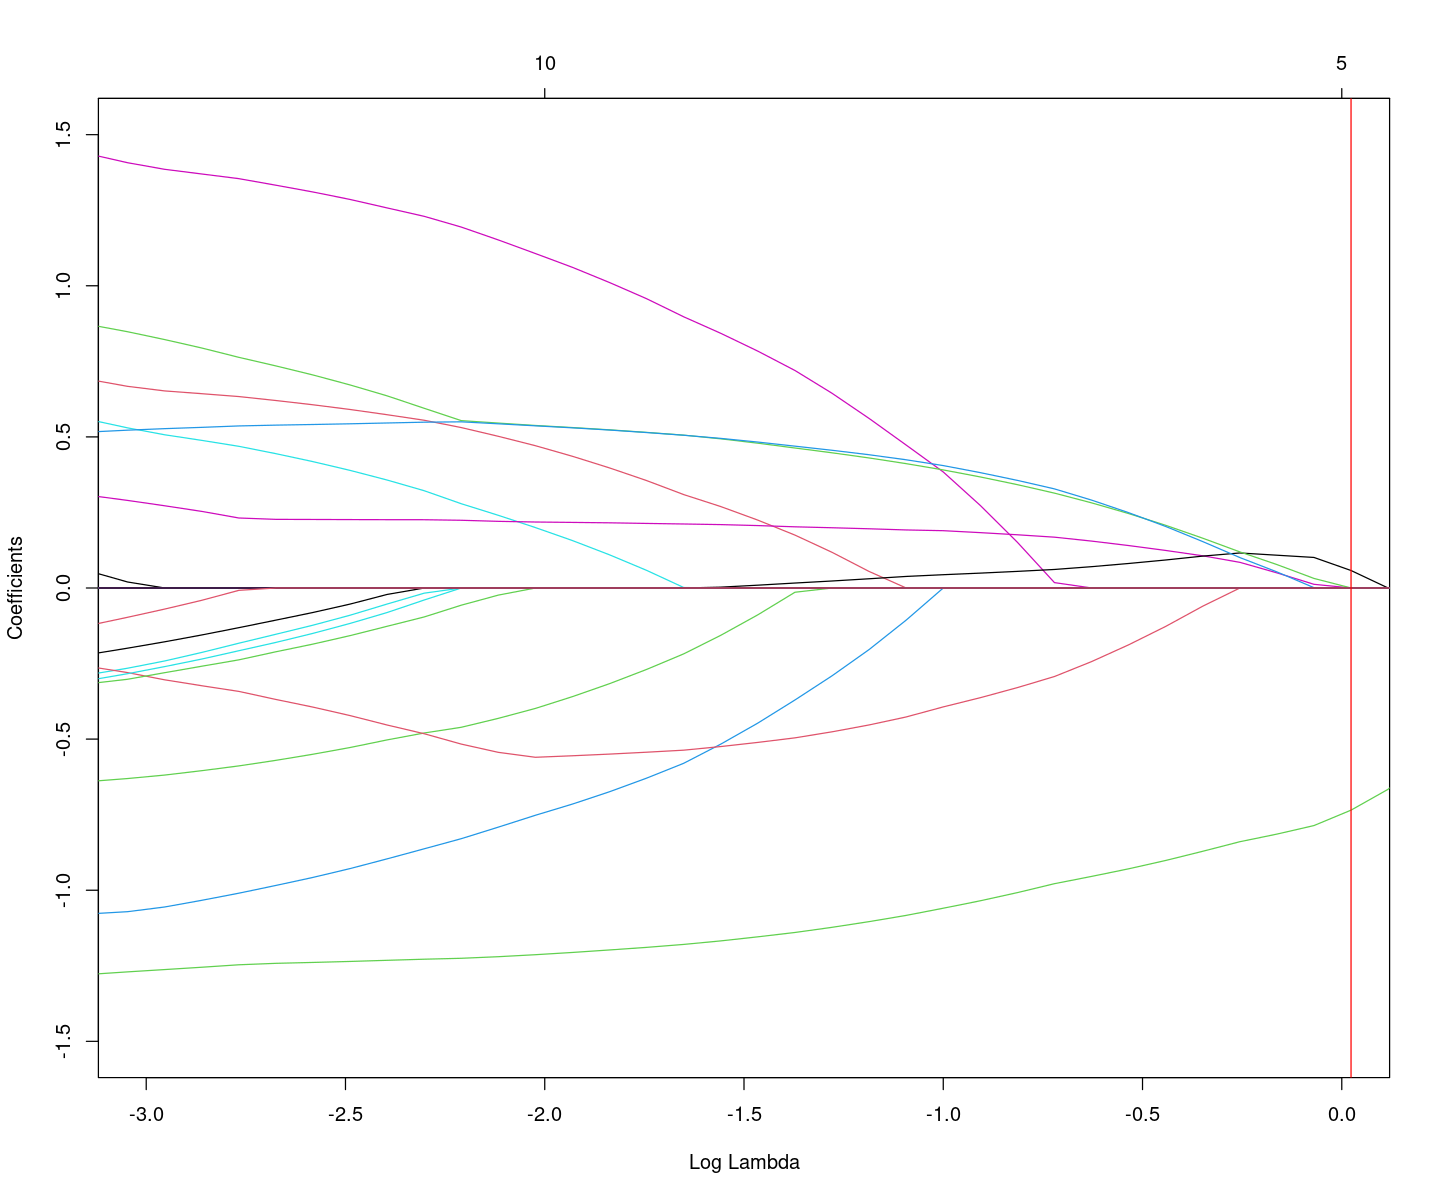

In [106]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-3,0),ylim=c(-1.5,1.5))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")


[1] "CV estimate of lambda : 0.145"

28 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  2.3764633
date1        .        
date2        0.4357465
date3        .        
date4       -0.7149060
date5        .        
date6        .        
date7        .        
date8        .        
date9       -0.3593940
date10       .        
date11       0.1569255
date12       1.0609622
ff           .        
t           -0.5551092
td           .        
hu           .        
dd           .        
precip       0.2170333
ws_arome     .        
p3031_arome  .        
u10_arome    0.5309070
v10_arome    0.5299635
t2m_arome    .        
d2m_arome    .        
r_arome      .        
tp_arome     .        
msl_arome   -1.2059062

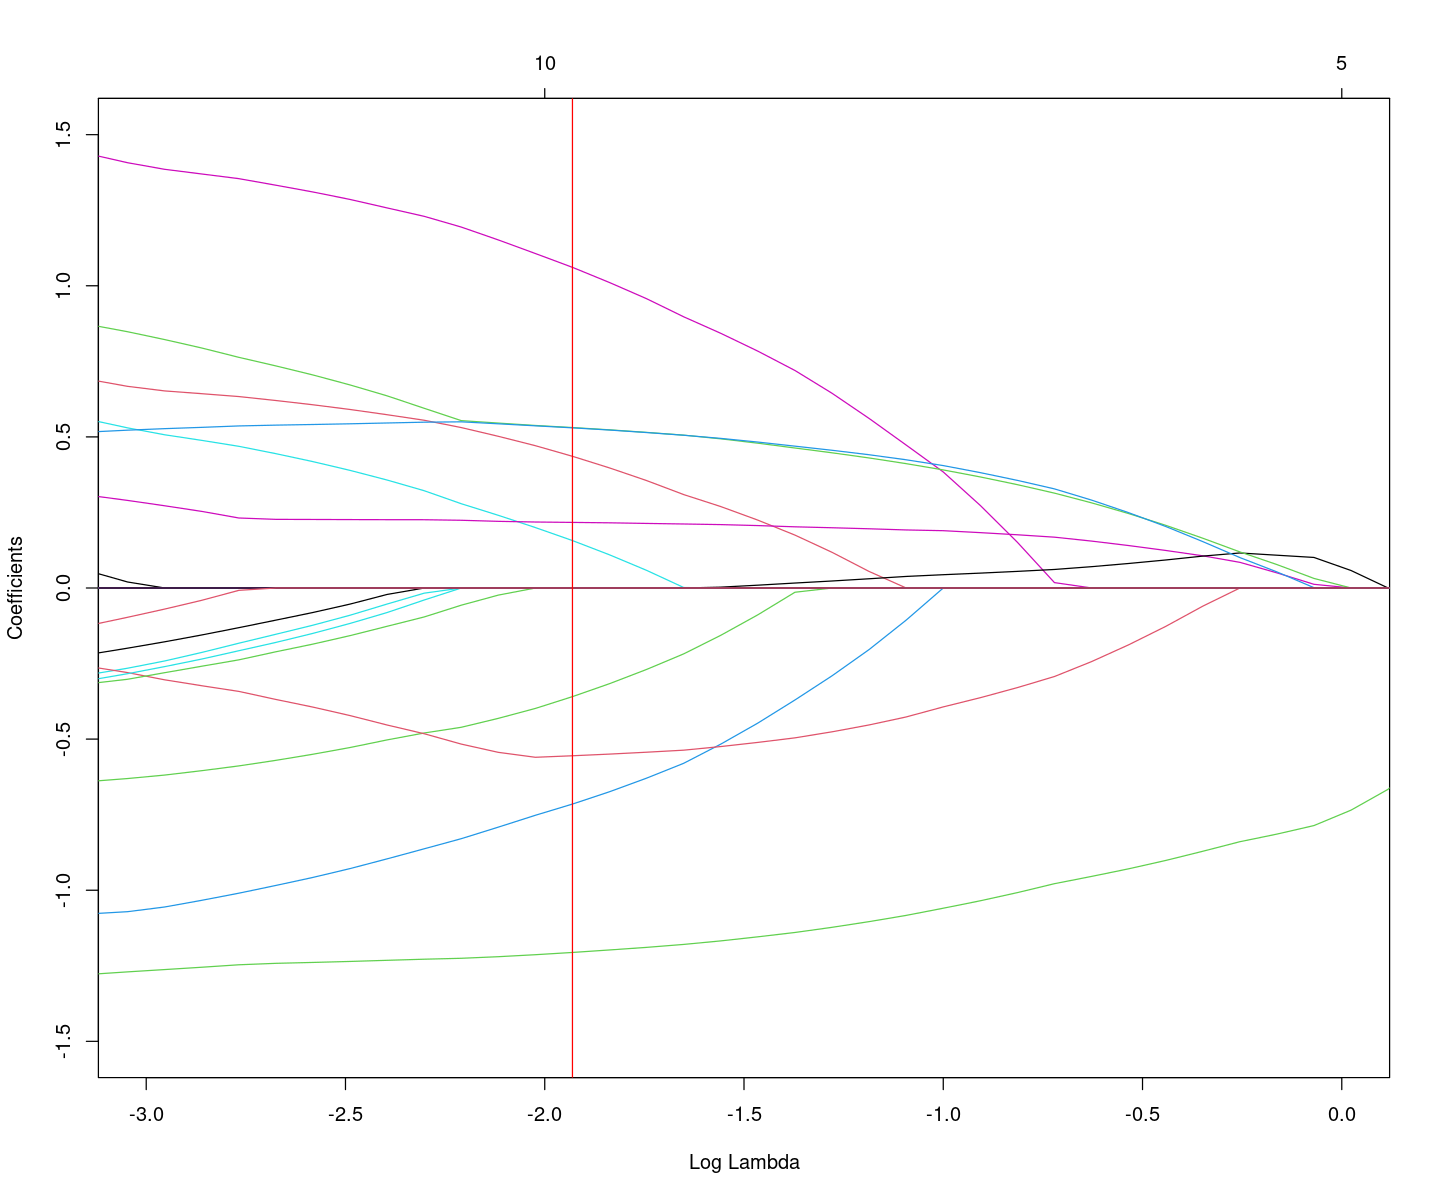

In [107]:
# NEW : 
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-3,0),ylim=c(-1.5,1.5))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

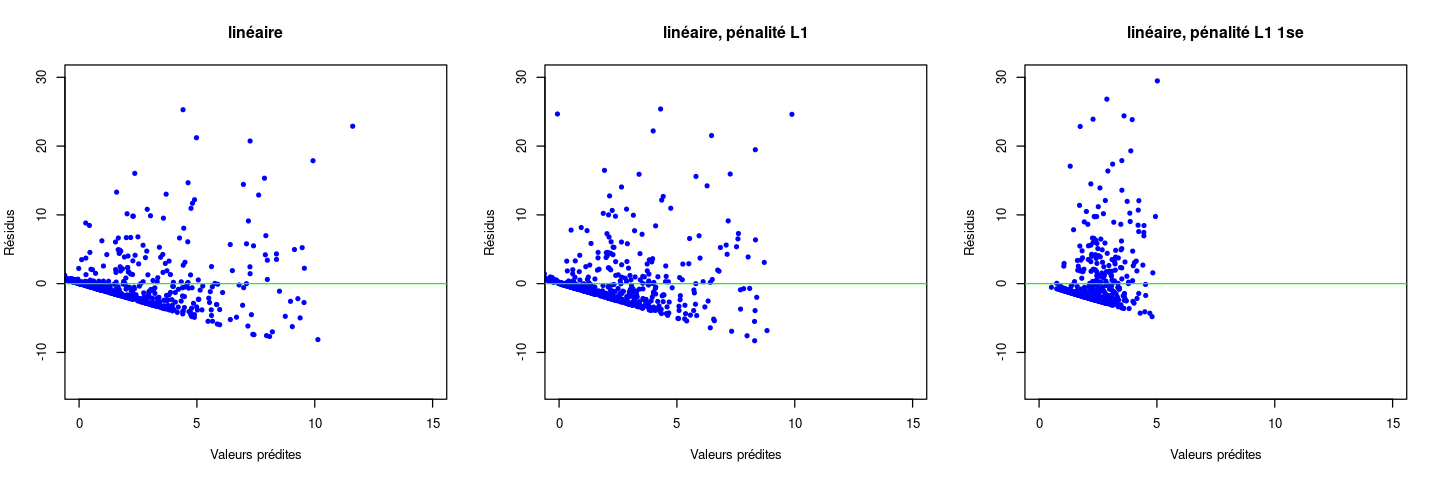

In [108]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$rain- fit.lasso

fit.lasso.lse <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.lse <- datappr$rain- fit.lasso.lse

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.lasso.lse, res.lasso.lse, "linéaire, pénalité L1 1se")

In [109]:
paste("Modèle linéaire sans sélection:", mean(res.lm^2))
paste("LASSO avec lambda.min", mean(res.lasso^2))
paste("LASSO avec lambda.lse", mean(res.lasso.lse^2))

[1] "Modèle linéaire sans sélection: 16.3677900225838"

[1] "LASSO avec lambda.min 16.8159189687021"

[1] "LASSO avec lambda.lse 19.7184305818349"

In [110]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm <- glm(rain ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=3095.45
rain ~ (date + ff + t + td + hu + dd + precip + ws_arome + p3031_arome + 
    u10_arome + v10_arome + t2m_arome + d2m_arome + r_arome + 
    tp_arome + msl_arome)^2

                        Df Deviance    AIC
- date:td               11   3101.0 3086.1
- date:hu               11   3106.6 3087.1
- date:t                11   3109.5 3087.6
- date:v10_arome        11   3132.1 3091.6
- u10_arome:r_arome      1   3030.6 3093.5
- hu:ws_arome            1   3030.6 3093.5
- td:dd                  1   3030.6 3093.5
- t:ws_arome             1   3030.6 3093.5
- u10_arome:msl_arome    1   3030.6 3093.5
- td:p3031_arome         1   3030.6 3093.5
- td:msl_arome           1   3030.6 3093.5
- hu:p3031_arome         1   3030.6 3093.5
- u10_arome:t2m_arome    1   3030.7 3093.5
- t:msl_arome            1   3030.7 3093.5
- ws_arome:d2m_arome     1   3030.8 3093.5
- precip:v10_arome       1   3030.9 3093.5
- u10_arome:d2m_arome    1   3030.9 3093.5
- hu:dd                  1   3030.9 3093

In [111]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,549,12060.281,NA,NA
date,11,823.8492939,538,11236.432,7.2949216,3.659447e-11
ff,1,527.1385019,537,10709.293,51.3440684,5.149395e-12
t,1,3.2642818,536,10706.029,0.3179459,5.732300e-01
td,1,31.1064042,535,10674.922,3.0298097,8.268537e-02
hu,1,1.8639817,534,10673.058,0.1815546,6.703201e-01
dd,1,45.8009130,533,10627.257,4.4610765,3.543127e-02
precip,1,377.3671745,532,10249.890,36.7561200,3.680028e-09
ws_arome,1,307.5321983,531,9942.358,29.9540902,8.802482e-08


In [112]:
#Sélection de variable par régularisation L1 (LASSO)
# Comparaiso, avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(rain ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, "rain"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

298 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)            2.19164652
date1                  .         
date2                  .         
date3                  .         
date4                  .         
date5                  .         
date6                  .         
date7                  .         
date8                  .         
date9                  .         
date10                 .         
date11                 .         
date12                 .         
ff                     .         
t                     -0.08147438
td                     .         
hu                     .         
dd                     .         
precip                 .         
ws_arome               .         
p3031_arome            .         
u10_arome              0.10509964
v10_arome              .         
t2m_arome              .         
d2m_arome              .         
r_arome                .         
tp_arome               .         
msl_a

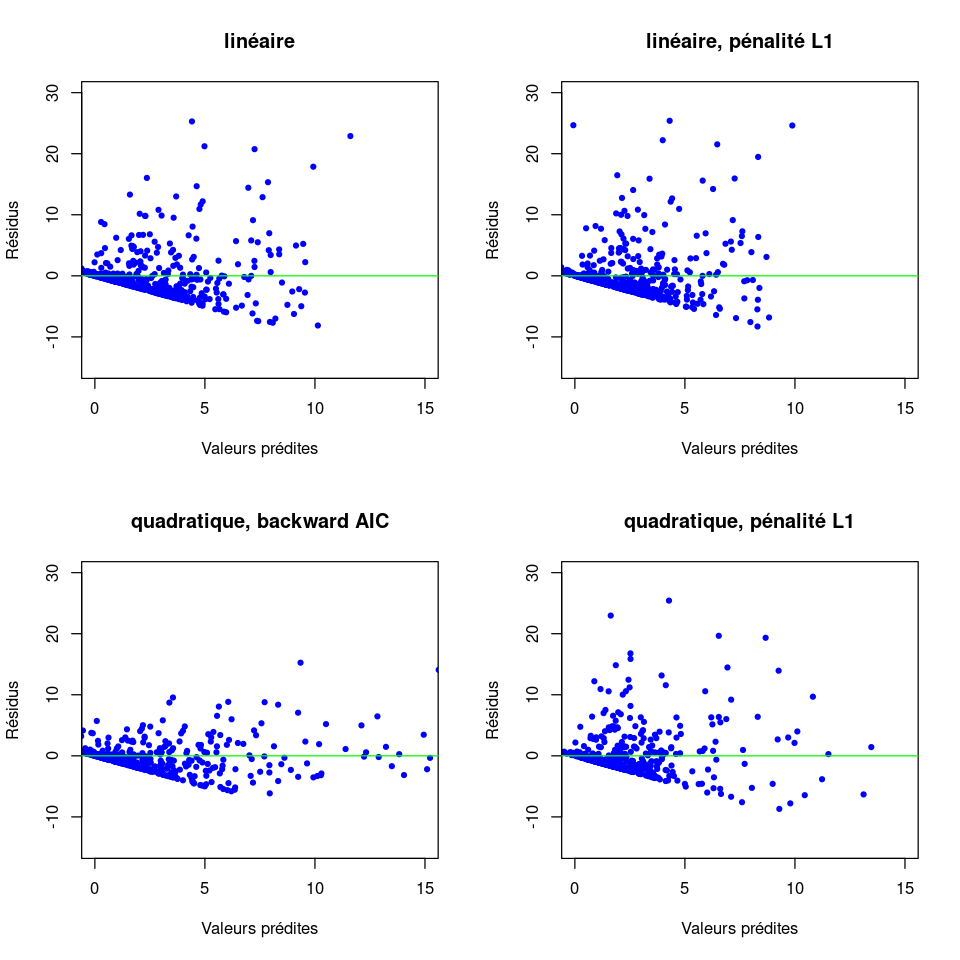

In [113]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$rain- fit.lasso2

# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.glm, res.glm, "quadratique, backward AIC")
plot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

In [114]:
"moyenne des résidus"
paste("Modèle linéaire sans sélection:", mean(res.lm^2))
paste("Lasso avec lambda lse:",mean(res.lasso.lse^2))

paste( "modèle quadratique, backward AIC :",mean(res.glm^2))
paste("modèle quadratique, pénalité L1 :", mean(res.lasso2^2))

[1] "moyenne des résidus"

[1] "Modèle linéaire sans sélection: 16.3677900225838"

[1] "Lasso avec lambda lse: 19.7184305818349"

[1] "modèle quadratique, backward AIC : 6.12273712954717"

[1] "modèle quadratique, pénalité L1 : 14.2503151393291"

In [115]:
#Le modèle obtenu par minimisaiton du critère AIC est conservé.
# Calcul des prévisions pour le nomdèle quadratique backward AIC
x.mattest <- model.matrix(rain ~ . - 1, data = datestr)
x.mattest2 <- model.matrix(rain ~ .^2 - 1,, data = datestr)
#AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
#lasso1
pred.lasso1 <- predict(reg.lasso.cv, s = "lambda.min",newx=x.mattest)
#lasso2
pred.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min",newx=x.mattest2)
#sans sélection
pred.regréssion <- predict(reg.lm, newdata = datestr)

paste("Erreur quadratique moyenne de prévision (MSE) sur l'échantillon test:")
paste("critère AIC :",sum((pred.glm - datestr[, "rain"])^2) / nrow(datestr))

paste("pénalité lasso",sum((pred.lasso1 - datestr[, "rain"])^2) / nrow(datestr))
paste("modèle quadratique avec pénalité lasso",sum((pred.lasso2 - datestr[, "rain"])^2) / nrow(datestr))
paste("sans sélection de variable",sum((pred.regréssion - datestr[, "rain"])^2) / nrow(datestr))



[1] "Erreur quadratique moyenne de prévision (MSE) sur l'échantillon test:"

[1] "critère AIC : 38.5218962133023"

[1] "pénalité lasso 12.8230964734974"

[1] "modèle quadratique avec pénalité lasso 16.2317378100205"

[1] "sans sélection de variable 13.3475467944165"

In [116]:
# Matrice de confusion pour la prévision de class avec les différents modèles
pred<-rep('',length(pred.glm))
pred[pred.glm <=0] <- 'no_rain'
pred[ 0 < pred.glm & pred.glm <= 2] <- 'low_rain'
pred[ 2 < pred.glm ] <- 'high_rain'
table( pred, raindata[testi,"rain_class"])


pred2<-rep('',length(pred.lasso1))
pred2[pred.lasso1 <=0] <- 'no_rain'
pred2[ 0 < pred.lasso1 & pred.lasso1 <= 2] <- 'low_rain'
pred2[ 2 < pred.lasso1 ] <- 'high_rain'
table( pred2, raindata[testi,"rain_class"])



pred3<-rep('',length(pred.lasso2))
pred3[pred.lasso2 <=0] <- 'no_rain'
pred3 [0 < pred.lasso2 & pred.lasso2 <= 2] <- 'low_rain'
pred3[ 2 < pred.lasso2 ] <- 'high_rain'
table( pred3, raindata[testi,"rain_class"])

pred4<-rep('',length(pred.regréssion))
pred4[pred.regréssion <=0] <- 'no_rain'
pred4 [ 0 < pred.regréssion & pred.regréssion<= 2] <- 'low_rain'
pred4[ 2 < pred.regréssion] <- 'high_rain'
table( pred4, raindata[testi,"rain_class"])


paste("taux d erreur AIC : ",1-mean(pred==raindata[testi,"rain_class"]) )
paste("taux d erreur pénalité lasso : ", 1-mean(pred2==raindata[testi,"rain_class"]))
paste("taux d erreur modèle quadratique pénalité lasso: ", 1-mean(pred3==raindata[testi,"rain_class"]))
paste("taux d erreur sans sélection de variable : ", 1-mean(pred4==raindata[testi,"rain_class"]))

errML<-1-mean(pred2==raindata[testi,"rain_class"])

           
pred        high_rain low_rain no_rain
  high_rain        23       21      11
  low_rain          7       17       9
  no_rain           7       18      25

           
pred2       high_rain low_rain no_rain
  high_rain        32       20       9
  low_rain          5       30      30
  no_rain           0        6       6

           
pred3       high_rain low_rain no_rain
  high_rain        31       15      12
  low_rain          6       41      32
  no_rain           0        0       1

           
pred4       high_rain low_rain no_rain
  high_rain        31       25      12
  low_rain          6       23      25
  no_rain           0        8       8

[1] "taux d erreur AIC :  0.528985507246377"

[1] "taux d erreur pénalité lasso :  0.507246376811594"

[1] "taux d erreur modèle quadratique pénalité lasso:  0.471014492753623"

[1] "taux d erreur sans sélection de variable :  0.550724637681159"

# 2) SVR

In [117]:
library(e1071)

#### SVR à noyau linéaire

In [118]:
#optimisation des paramètres
#svr.lin.tune = tune.svm(rain ~ ., data = datappr,kernel="linear", cost = c(1,2,4))
#svr.lin.tune$best.parameters #=> cost 4

In [119]:
svr.lin=svm(rain~.,data=datappr,cost =4,kernel="linear")


In [120]:
# Prédiction sur l'échantillon test
pred.svr.lin=predict(svr.lin,newdata=datestr)

In [121]:

predsvr<-rep('',length(pred.svr.lin))

predsvr[pred.svr.lin <=0] <- 'no_rain'
predsvr[ 0 < pred.svr.lin & pred.svr.lin <= 2] <- 'low_rain'
predsvr[ 2 < pred.svr.lin ] <- 'high_rain'



In [122]:
# Erreurs de prédiction
errSVMlin<-1-sum((predsvr==datestq[,"rain_class"]))/nrow(datestr) # risque empirique associée à la 0-1 
errSVMlin

[1] 0.4855072

In [123]:
# Matrice de confusion 
table(predsvr,datestq[,"rain_class"])

           
predsvr     high_rain low_rain no_rain
  high_rain        18        3       1
  low_rain         18       46      37
  no_rain           1        7       7

#### SVR à noyau polynomial

In [124]:
#svr.pol.tune = tune.svm(rain ~ ., data = datappr,kernel="polynomial", cost = c(2.5,3,3.5), coef0=c(0,1), 
 #   gamma = c(0.02, 0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1))

In [125]:
#svr.pol.tune$best.parameters

In [126]:
svr.pol=svm(rain~.,data=datappr,cost = 2.5,gamma=0.02,kernel="polynomial")

In [127]:
# Prédiction sur l'échantillon test
pred.svr.pol=predict(svr.pol,newdata=datestr)

In [128]:
predsvrP<-rep('',length(pred.svr.pol))

predsvrP[pred.svr.pol <=0] <- 'no_rain'
predsvrP[ 0 < pred.svr.pol & pred.svr.pol <= 2] <- 'low_rain'
predsvrP[ 2 < pred.svr.pol ] <- 'high_rain'


In [129]:
# Erreurs de prédiction
errSVMpol<-1-sum((predsvrP==datestq[,"rain_class"]))/nrow(datestr) # risque empirique associée à la 0-1 
errSVMpol

[1] 0.5289855

In [130]:
# Matrice de confusion 
table(predsvrP,datestq[,"rain_class"])

           
predsvrP    high_rain low_rain no_rain
  high_rain         6        1       0
  low_rain         29       52      38
  no_rain           2        3       7

#### SVR à noyau gaussien

In [131]:
#optimisation
#svr.gauss.tune = tune.svm(rain ~ ., data = datappr,kernel="radial", cost = c(2.5,3,3.5), coef0=c(0,1), 
                       # gamma = c(0.02, 0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1))

In [132]:
#svr.gauss.tune$best.parameters
# apprentissage
svr.gauss=svm(rain~.,data=datappr,cost = 2.5, 
    gamma = 0.009,kernel="radial")

In [133]:
# Prédiction sur l'échantillon test
pred.svr.gauss=predict(svr.gauss,newdata=datestr)

In [134]:
predsvrG<-rep('',length(pred.svr.gauss))

predsvrG[pred.svr.gauss <=0] <- 'no_rain'
predsvrG[ 0 < pred.svr.gauss & pred.svr.gauss <= 2] <- 'low_rain'
predsvrG[ 2 < pred.svr.gauss ] <- 'high_rain'

In [135]:
# Erreurs de prédiction
errSVMG<-1-sum((predsvrG==datestq[,"rain_class"]))/nrow(datestr) # risque empirique associée à la 0-1 
errSVMG

[1] 0.4855072

In [136]:
# Matrice de confusion 
table(predsvrG,datestq[,"rain_class"])

           
predsvrG    high_rain low_rain no_rain
  high_rain        22        5       1
  low_rain         14       46      41
  no_rain           1        5       3

#### SVR à noyau sigmoïde

In [137]:
#optimisation
svr.sigm.tune= tune.svm(rain ~ ., data = datappr,kernel="sigmoid", cost = c(4,5,6), 
    gamma = seq(1,12, by = 1)*0.001)

In [138]:
#svr.sigm.tune$best.parameters
# apprentissage
svr.sigm=svm(rain~.,data=datappr,cost = 6, 
    gamma = 0.004,kernel="sigmoid")

In [139]:
# Prédiction sur l'échantillon test
pred.svr.sigm=predict(svr.sigm,newdata=datestr)



In [140]:
predsvrSig<-rep('',length(pred.svr.sigm))

predsvrSig[pred.svr.sigm <=0] <- 'no_rain'
predsvrSig[ 0 < pred.svr.sigm & pred.svr.sigm <= 2] <- 'low_rain'
predsvrSig[ 2 < pred.svr.sigm ] <- 'high_rain'

In [141]:
# Erreurs de prédiction
errSVMsig<-1-sum((predsvrSig==datestq[,"rain_class"]))/nrow(datestr) # risque empirique associée à la 0-1
errSVMsig

[1] 0.4782609

In [142]:
# Table de contingence
table(predsvrSig,datestq[,"rain_class"])

           
predsvrSig  high_rain low_rain no_rain
  high_rain        18        3       1
  low_rain         19       47      37
  no_rain           0        6       7

# 3)Arbre Optimal (CART)

In [143]:
install.packages('rpart.plot')
install.packages('rattle')
library(rpart) # chargement de la librairie
library(e1071)
library(rpart.plot)
library(rattle)

Installation du package dans ‘/home/samih/R/libs’
(car ‘lib’ n'est pas spécifié)

Installation du package dans ‘/home/samih/R/libs’
(car ‘lib’ n'est pas spécifié)

Warning message in install.packages("rattle"):
“l'installation du package ‘rattle’ a eu un statut de sortie non nul”
Le chargement a nécessité le package : tibble

Le chargement a nécessité le package : bitops


Attachement du package : ‘bitops’


L'objet suivant est masqué depuis ‘package:Matrix’:

    %&%


Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Entrez 'rattle()' pour secouer, faire vibrer, et faire défiler vos données.


Attachement du package : ‘rattle’


L'objet suivant est masqué depuis ‘package:randomForest’:

    importance




In [144]:
tree.reg <- rpart(rain~.,data=datappr)

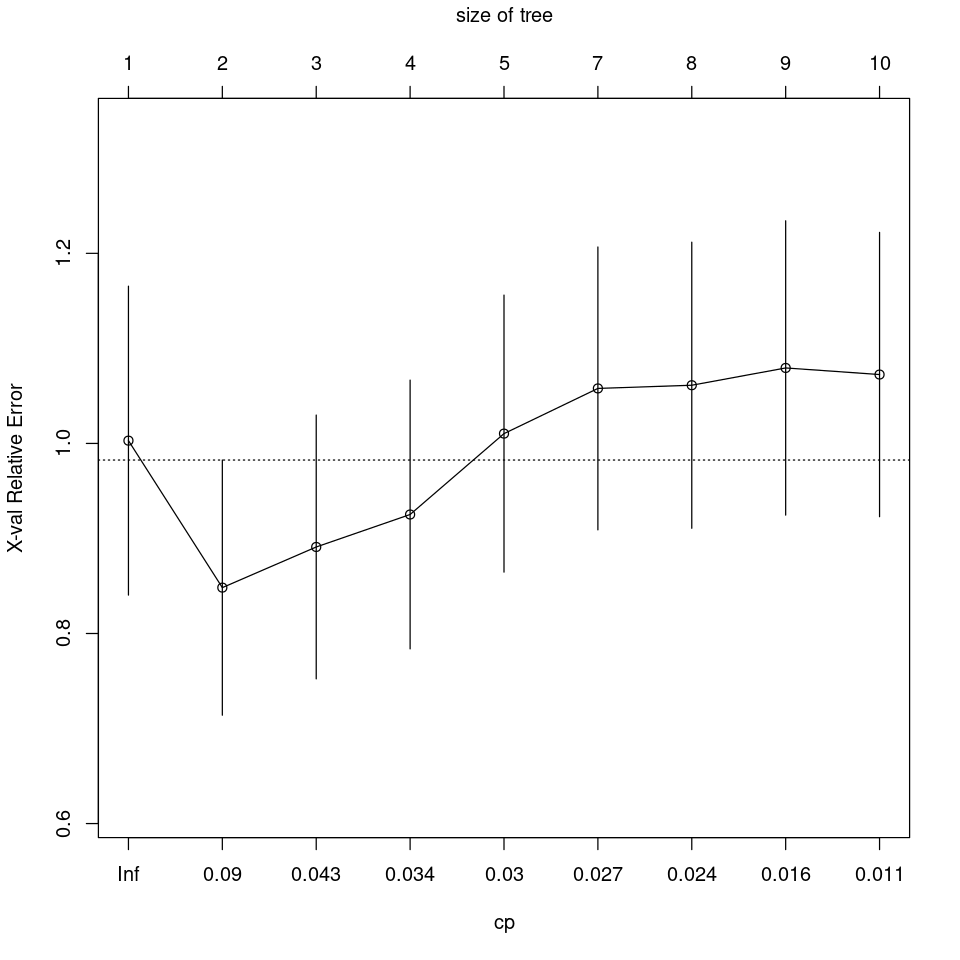

In [145]:
plotcp(tree.reg)

In [146]:
tree.reg$cptable[which.min(tree.reg$cptable[,4]),1]

[1] 0.04982539

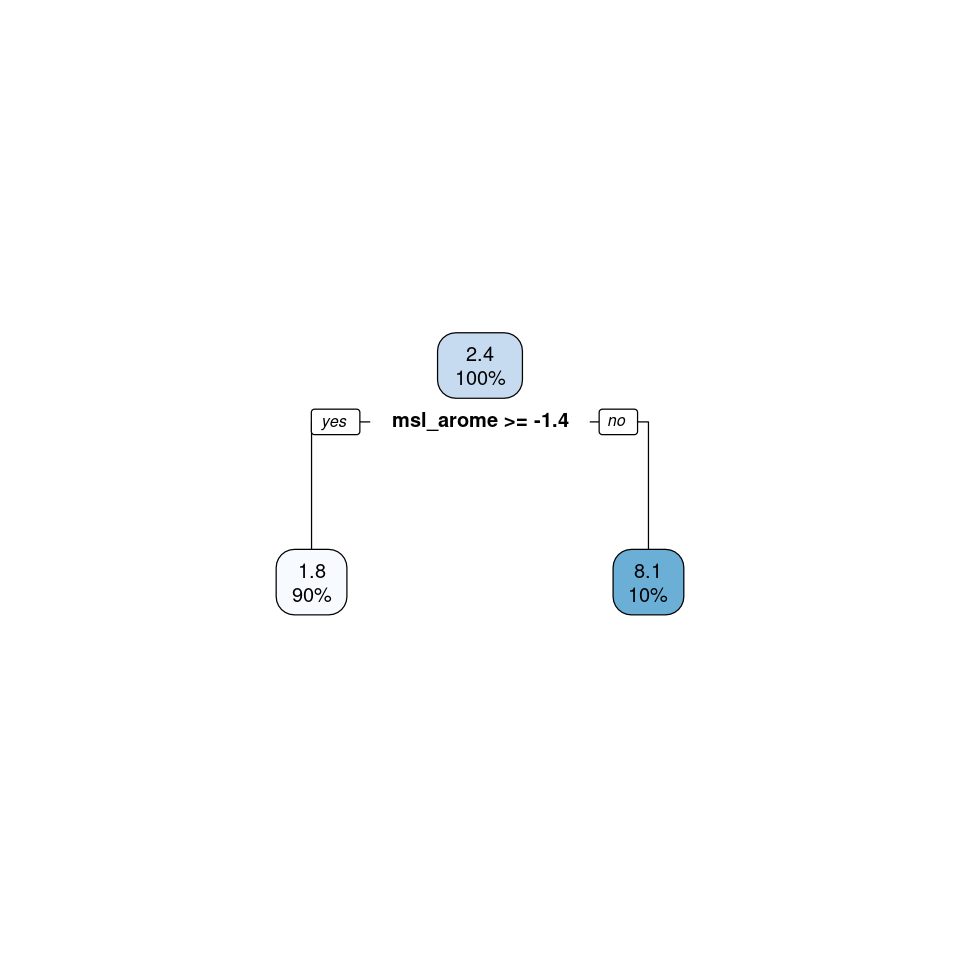

In [147]:
cOptimal <- prune(tree.reg,cp=tree.reg$cptable[which.min(tree.reg$cptable[,4]),1])
rpart.plot(cOptimal)

In [148]:
# Prédiction sur l'échantillon test
pred.treer=predict(tree.reg,newdata=datestr) 

In [149]:
pred.treer_class<-rep('',length(pred.treer))

pred.treer_class[pred.treer <= 0] <- 'no_rain'
pred.treer_class[ 0 < pred.treer & pred.treer <= 2] <- 'low_rain'
pred.treer_class[ 2 < pred.treer ] <- 'high_rain'

In [150]:
## Erreurs de prédiction
Rerrtree<- 1-sum(pred.treer_class==datestq[,"rain_class"])/nrow(datestr)
Rerrtree

[1] 0.5289855

In [151]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.treer_class,datestq[,"rain_class"])



                
pred.treer_class high_rain low_rain no_rain
       high_rain        31       22      12
       low_rain          6       34      33

# 4)  Forêt aléatoire

In [152]:
library(randomForest)

mtry = 5  OOB error = 17.902 
Searching left ...
mtry = 4 	OOB error = 17.81125 
0.00506962 0.002 
mtry = 3 	OOB error = 17.47779 
0.01872172 0.002 
mtry = 2 	OOB error = 17.57389 
-0.00549856 0.002 
Searching right ...
mtry = 7 	OOB error = 17.76247 
-0.01628815 0.002 


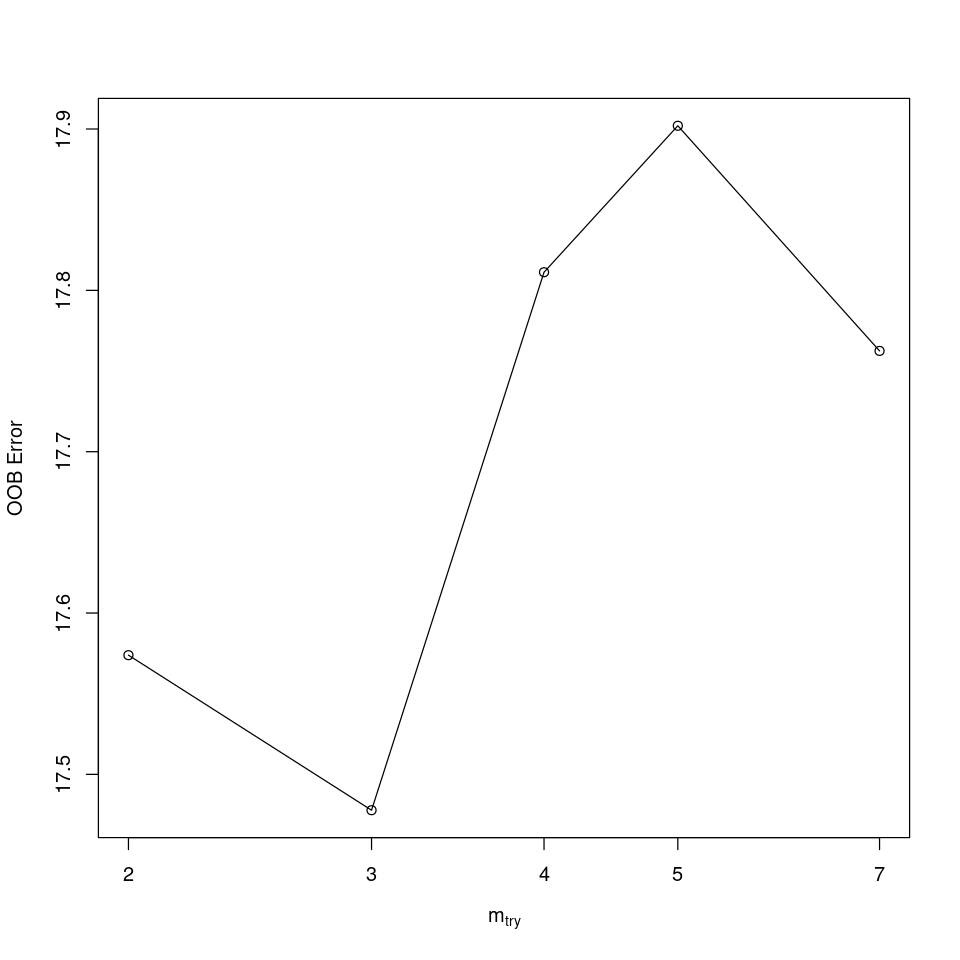

In [153]:
# Optimisation
set.seed(123)
bestmtry <- tuneRF(datappr[,-17], datappr$rain, stepFactor = 1.5, improve=0.002, ntree=500, trace = TRUE, plot = TRUE)


In [154]:
rf.reg=randomForest(rain~., data=datappr ,xtest=datestr[,-17],ytest=datestr[,"rain"], mtry = 3,
   ntree=500,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |    18.32    83.53 |    13.23    76.53 |
 100 |    17.67    80.58 |    13.55    78.38 |
 150 |    17.59    80.22 |    13.55    78.39 |
 200 |    17.45    79.57 |    13.63    78.83 |
 250 |    17.47    79.67 |    13.79    79.80 |
 300 |     17.5    79.78 |     13.6    78.67 |
 350 |    17.44    79.54 |    13.72    79.37 |
 400 |    17.47    79.68 |    13.62    78.78 |
 450 |    17.45    79.57 |    13.59    78.64 |
 500 |    17.43    79.48 |     13.5    78.08 |


In [155]:
rf.reg$importance
#Grande importance de la variable msl_arome

,%IncMSE,IncNodePurity
date,0.3857039,788.1309
ff,1.7782207,694.4946
t,2.6491587,529.8861
td,1.7991437,425.1198
hu,0.8649772,545.8153
dd,2.5232374,494.8316
precip,1.6078695,740.5831
ws_arome,1.9620526,982.8368
p3031_arome,2.5306630,513.0709
u10_arome,3.7924928,728.4396


In [156]:
# Prédiction sur l'échantillon test
pred.rfq <-rf.reg$test$predicted

In [157]:
pred<-rep('',length(pred.rfq))

pred[pred.rfq <= 0] <- 'no_rain'
pred[ 0 < pred.rfq & pred.rfq<= 2] <- 'low_rain'
pred[ 2 < pred.rfq ] <- 'high_rain'

In [158]:
# Erreurs de prédiction
errforest<- 1-sum(pred==datestq[,"rain_class"])/nrow(datestr)
errforest

[1] 0.5144928

In [159]:
# Table de contingence
table(pred, datestq[,"rain_class"])

           
pred        high_rain low_rain no_rain
  high_rain        30       19       9
  low_rain          7       37      36

# 5)  Réseau de neurones

In [160]:
library(MASS)
library(nnet)
# apprentissage
nnet.reg=nnet(rain~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  141
initial  value 13870.681447 
iter  10 value 9588.693566
iter  20 value 8740.437369
iter  30 value 8335.656081
iter  40 value 7984.582095
iter  50 value 7728.849358
iter  60 value 7479.905473
iter  70 value 7202.051119
iter  80 value 6872.760638
iter  90 value 6502.202289
iter 100 value 6213.066276
iter 110 value 6029.016085
iter 120 value 5927.913949
iter 130 value 5852.531042
iter 140 value 5786.945210
iter 150 value 5727.204210
iter 160 value 5696.014390
iter 170 value 5684.889351
iter 180 value 5678.361900
iter 190 value 5674.430245
iter 200 value 5669.688552
iter 210 value 5666.390752
iter 220 value 5665.901356
iter 230 value 5665.875449
final  value 5665.875172 
converged


a 26-5-1 network with 141 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -5.65    1.39    3.21    0.55    1.70   -3.30    0.03    1.09   -0.65   -0.72 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.32    3.35    1.59   -0.46   -0.32    2.85    3.77    4.52   -0.97    2.04 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
  -1.85    0.91   -0.96   -2.18   -0.98   -2.46   -0.80 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -6.33    0.12   -0.39   -1.84   -1.35   -2.45   -1.95    0.63   -0.67    0.43 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.35    0.37    0.64    0.20   -0.72   -0.22   -5.97   -0.46   -1.82    5.96 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
   2.02    3.01   -0.07   -0.36    1.86    0.30   -1.49 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h

In [161]:
library(e1071)
#tune.nnet(rain~.,data=datappr,size=c(4,5,6,7,8),decay=c(0.01,0.015,0.02),maxit=200,linout=TRUE)$best.parameters

In [162]:
nnet.reg=nnet(rain~.,data=datappr,size=4,decay=0.01,linout=TRUE,maxit=200) 
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"rain"]

# weights:  113
initial  value 15662.942712 
iter  10 value 9258.635064
iter  20 value 7822.682841
iter  30 value 7016.313204
iter  40 value 6559.714763
iter  50 value 6217.833681
iter  60 value 6053.395158
iter  70 value 5932.224582
iter  80 value 5880.259709
iter  90 value 5862.426169
iter 100 value 5833.500758
iter 110 value 5823.339532
iter 120 value 5819.390055
iter 130 value 5817.553833
iter 140 value 5815.824457
iter 150 value 5814.077737
iter 160 value 5811.951030
iter 170 value 5810.364940
iter 180 value 5809.867856
iter 190 value 5809.790191
iter 200 value 5809.690423
final  value 5809.690423 
stopped after 200 iterations


In [163]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"rain"])^2)/nrow(datestr)



[1] 18.42669

In [164]:
pred<-rep('',length(pred.nnetr))
pred[pred.nnetr <=0] <- 'no_rain'
pred[ 0 < pred.nnetr & pred.nnetr <= 2] <- 'low_rain'
pred[ 2 < pred.nnetr ] <- 'high_rain'
# Matrice de confusion pour la régression
table( pred, raindata[testi,"rain_class"])


           
pred        high_rain low_rain no_rain
  high_rain        24       19      12
  low_rain         13       35      31
  no_rain           0        2       2

In [165]:
errNN<-1-mean(pred==raindata[testi,"rain_class"])
paste("taux d erreur en regréssion puis seuillage : ",errNN)

[1] "taux d erreur en regréssion puis seuillage :  0.557971014492754"

# 6)Boosting

In [166]:
install.packages('gbm')

Installation du package dans ‘/home/samih/R/libs’
(car ‘lib’ n'est pas spécifié)

Warning message in install.packages("gbm"):
“l'installation du package ‘gbm’ a eu un statut de sortie non nul”


Loaded gbm 2.1.8



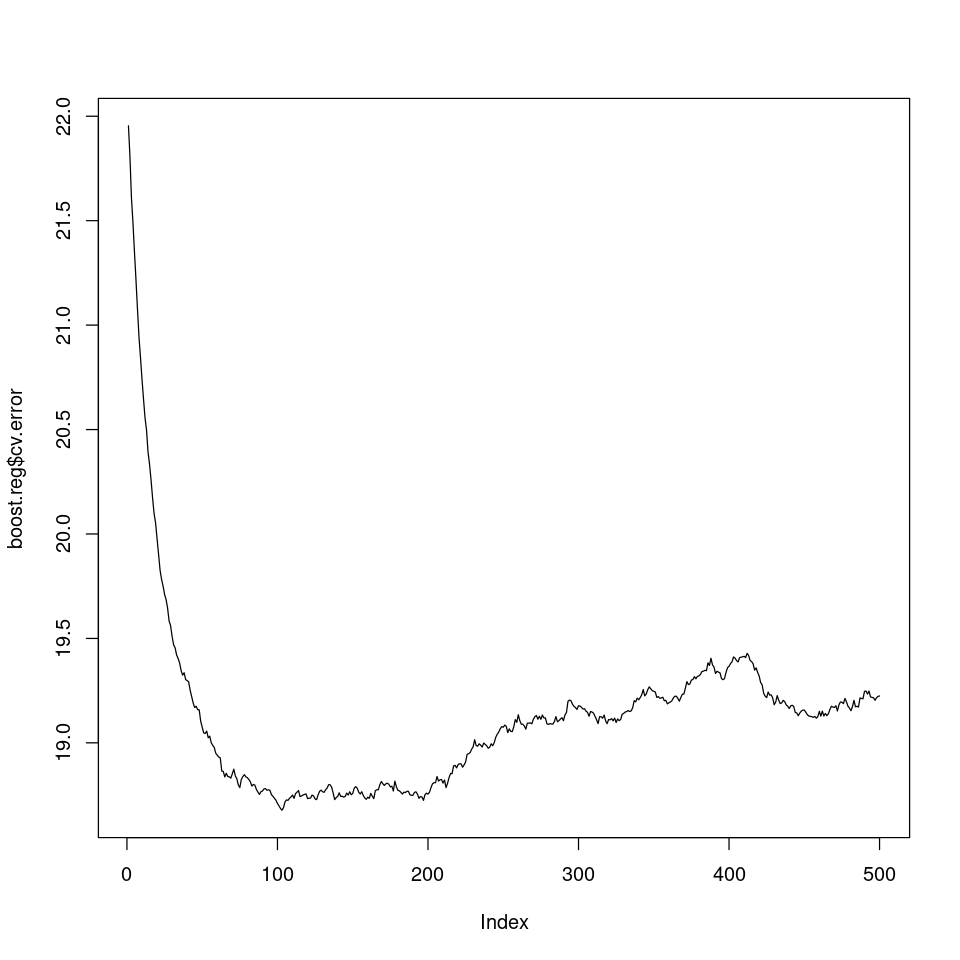

In [167]:
library(gbm)
boost.reg = gbm(rain ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

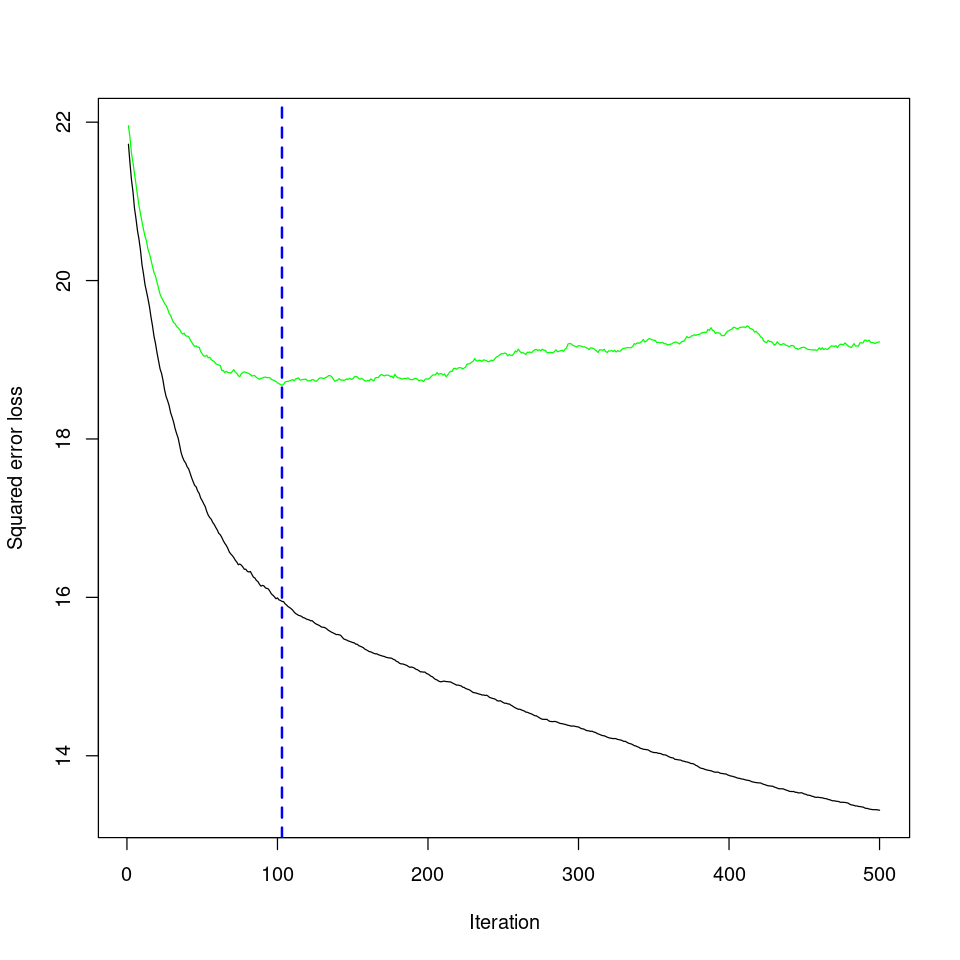

In [168]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")

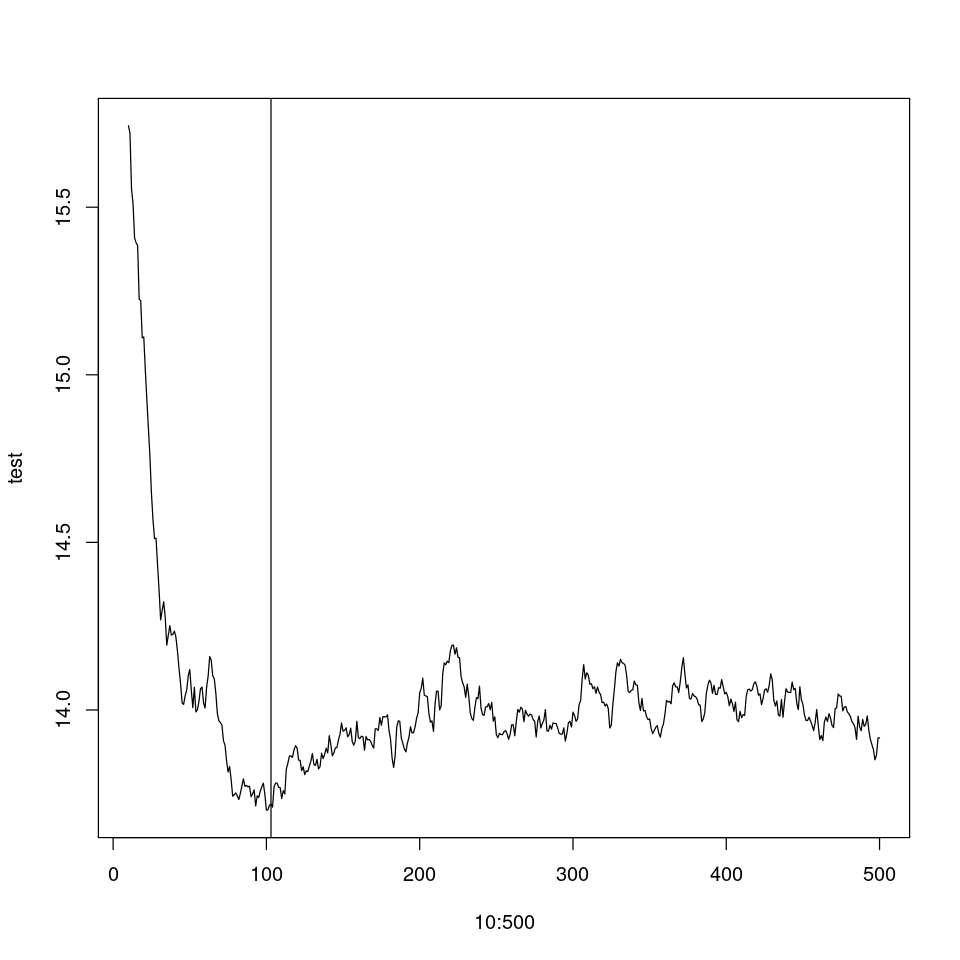

In [169]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"rain"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:500,test,type="l")
abline(v=best.iter)


In [170]:
best.iter

[1] 103

In [171]:
# Boosting 
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=220)
# Erreur quadratique moyenne de prévision
sum((pred.boostr-datestr[,"rain"])^2)/nrow(datestr)

[1] 14.17665

In [172]:
# Boosting 
# Matrice de confusion pour la prévision 
# du dépassement de seuil (régression)

predB<-rep('',length(pred.boostr))
predB[pred.boostr <=0] <- 'no_rain'
predB[ 0 < pred.boostr & pred.boostr <= 2] <- 'low_rain'
predB[ 2 < pred.boostr ] <- 'high_rain'


In [173]:
# Matrice de confusion pour la régression
table( predB, raindata[testi,"rain_class"])

errB<-1-mean(predB==raindata[testi,"rain_class"])
errB

           
predB       high_rain low_rain no_rain
  high_rain        27       19       8
  low_rain         10       37      37

[1] 0.5362319

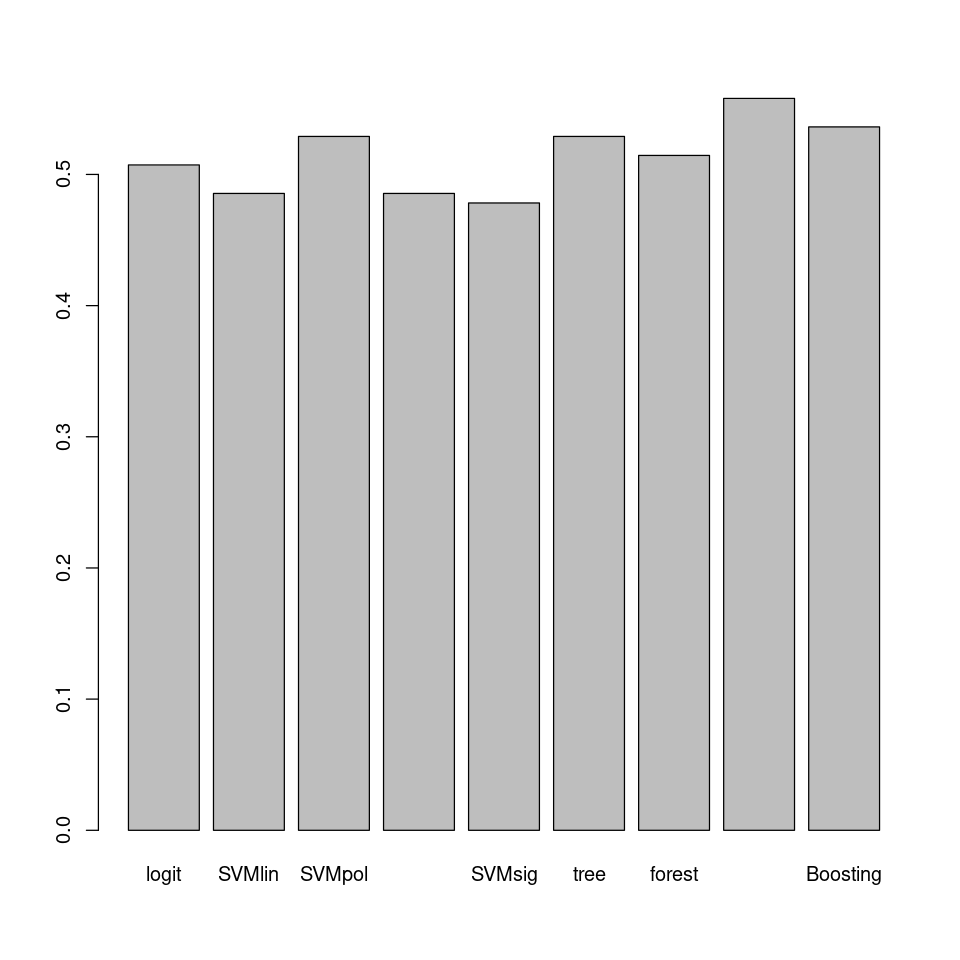

In [174]:
errors<-c(errML,errSVMlin,errSVMpol,errSVMG,errSVMsig,Rerrtree,errforest,errNN,errB)
index<-c("logit","SVMlin","SVMpol","SVMgauss","SVMsig","tree","forest","NeuralNet","Boosting")

barplot(errors,names.arg=index) 